<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Assignment 01: Draw a pair plot using seaborn library

*The comments/sections provided are your cues to perform the assignment. You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.*

*If at any point in time you need help on solving this assignment, view our demo video to understand the different steps of the code.*

**Happy coding!**

* * *

#### 1: View and add the dataset

---



In [ ]:
#Import the necessary library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import seaborn library
import seaborn as sns
import numbers

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm

In [ ]:
#google import file
from google.colab import files
#Import the advertising dataset
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IBM Attrition Data.csv to IBM Attrition Data.csv
User uploaded file "IBM Attrition Data.csv" with length 94178 bytes


#Data Manipulation

###Read and analyse data

In [ ]:
#read auto data
pd_df_ibm_attrition_data = pd.read_csv(fn)

In [ ]:
pd_df_ibm_attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [ ]:
pd_df_ibm_attrition_data.head()

Age Attrition  ... MonthlyIncomeGX  MaritalStatusBin
0   41       Yes  ...            6000         Unmarried
1   49        No  ...            5000           Married
2   37       Yes  ...            2000         Unmarried
3   33        No  ...            3000           Married
4   27        No  ...            3000           Married

[5 rows x 15 columns]

###Add new features

In [ ]:
pd_df_ibm_attrition_data['MonthlyIncomeGX'] = pd_df_ibm_attrition_data['MonthlyIncome'].apply(np.around, decimals=-3).astype('int32')

In [ ]:
pd_df_ibm_attrition_data['MonthlyIncomeGX'].unique()

array([ 6000,  5000,  2000,  3000, 10000,  4000, 15000, 12000,  1000,
       19000,  7000,  9000, 20000, 13000,  8000, 14000, 11000, 18000,
       17000, 16000], dtype=int32)

In [ ]:
#view firs 5 observations data
pd_df_ibm_attrition_data.head()

Age Attrition  ... YearsAtCompany  MonthlyIncomeGX
0   41       Yes  ...              6             6000
1   49        No  ...             10             5000
2   37       Yes  ...              0             2000
3   33        No  ...              8             3000
4   27        No  ...              2             3000

[5 rows x 14 columns]

In [ ]:
#view data info
pd_df_ibm_attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
 13  MonthlyIncomeGX          1470 non-null   int32 
dtypes: int32(1), int64(9), object(4)
memory 

###Decode status from features

In [ ]:
#update Education field
def decEducationField(data):
  if (data == 1):
    return 'Below College'
  elif (data == 2):
    return 'College'
  elif (data == 3):
    return 'Bachelor'
  elif (data == 4):
    return 'Master'
  elif (data == 5):
    return 'Doctor'
pd_df_ibm_attrition_data['Education'] = pd_df_ibm_attrition_data['Education'].apply(decEducationField)

In [ ]:
#update EnvironmentSatisfaction field
def decEnvironmentSatisfactionField(data):
  if (data == 1):
    return 'Low'
  elif (data == 2):
    return 'Medium'
  elif (data == 3):
    return 'High'
  elif (data == 4):
    return 'Very High'
pd_df_ibm_attrition_data['EnvironmentSatisfaction'] = pd_df_ibm_attrition_data['EnvironmentSatisfaction'].apply(decEnvironmentSatisfactionField)

In [ ]:
#update JobSatisfaction field
def decJobSatisfactionField(data):
  if (data == 1):
    return 'Low'
  elif (data == 2):
    return 'Medium'
  elif (data == 3):
    return 'High'
  elif (data == 4):
    return 'Very High'
pd_df_ibm_attrition_data['JobSatisfaction'] = pd_df_ibm_attrition_data['JobSatisfaction'].apply(decJobSatisfactionField)

In [ ]:
#update WorkLifeBalance field
def decWorkLifeBalanceField(data):
  if (data == 1):
    return 'Bad'
  elif (data == 2):
    return 'Good'
  elif (data == 3):
    return 'Better'
  elif (data == 4):
    return 'Best'
pd_df_ibm_attrition_data['WorkLifeBalance'] = pd_df_ibm_attrition_data['WorkLifeBalance'].apply(decWorkLifeBalanceField)

In [ ]:
pd_df_ibm_attrition_data.head()

Age Attrition  ... YearsAtCompany  MonthlyIncomeGX
0   41       Yes  ...              6             6000
1   49        No  ...             10             5000
2   37       Yes  ...              0             2000
3   33        No  ...              8             3000
4   27        No  ...              2             3000

[5 rows x 14 columns]

In [ ]:
pd_df_ibm_attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   object
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   object
 7   JobSatisfaction          1470 non-null   object
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   object
 12  YearsAtCompany           1470 non-null   int64 
 13  MonthlyIncomeGX          1470 non-null   int32 
dtypes: int32(1), int64(5), object(8)
memory 

In [ ]:
#function to clasify marital status in married and unmarried
def filter_marital_status(data):
  if (data == 'Married'):
    return 'Married'
  else:
    return 'Unmarried'
#clasify marital status in married and unmarried
pd_df_ibm_attrition_data['MaritalStatusBin'] = pd_df_ibm_attrition_data['MaritalStatus'].apply(filter_marital_status)
#count the number of marriend and unmarried employees
pd_s_group_marital_count_status = pd_df_ibm_attrition_data['MaritalStatusBin'].value_counts()

###Function slice data by leave, stay and total number of employees

In [ ]:
#create group by Attrition
pd_df_grouped = pd_df_ibm_attrition_data.groupby('Attrition')
#create group by Attrition, yes
pd_df_attrition_yes = pd_df_grouped.get_group('Yes')
#create group by Attrition, no
pd_df_attrition_no = pd_df_grouped.get_group('No')

In [ ]:
#count attrition status of the features
def sliceDataByFeatures(name_features):
  pd_s_count_features_yes = pd_df_attrition_yes[name_features].value_counts()
  #count remain status of the features
  pd_s_count_features_no = pd_df_attrition_no[name_features].value_counts()
  #count total number of every status for features
  pd_s_count_features = pd_df_ibm_attrition_data[name_features].value_counts()
  total_nbr_employe = pd_s_count_features.values

  c = pd.merge(pd_s_count_features, pd_s_count_features_no, left_index=True, right_index=True, how='outer').fillna(0)
  e = pd.merge(c, pd_s_count_features_yes, left_index=True, right_index=True, how='outer').fillna(0)
  #create dataframe by number of status
  e.sort_index()
  e.columns = ['total', 'no', 'yes']
  pd_df_count_status_value = pd.DataFrame([e['yes'], e['no'], e['total']], columns=e.index, index=['Leave the company', 'Stay in company', 'Total status employee'])
  return pd_df_count_status_value

###Test slice data

In [ ]:
a = pd_df_ibm_attrition_data['Age'].value_counts()
b = pd_df_attrition_yes["Age"].value_counts()
d = pd_df_attrition_no["Age"].value_counts()
c = pd.merge(a, b, left_index=True, right_index=True, how='outer').fillna(0)
e = pd.merge(c, d, left_index=True, right_index=True, how='outer').fillna(0)
e.columns = ['total', 'yes', 'no']
print(e)

    total   yes  no
18      8   4.0   4
19      9   6.0   3
20     11   6.0   5
21     13   6.0   7
22     16   5.0  11
23     14   4.0  10
24     26   7.0  19
25     26   6.0  20
26     39  12.0  27
27     48   3.0  45
28     48  14.0  34
29     68  18.0  50
30     60   9.0  51
31     69  18.0  51
32     61  11.0  50
33     58  12.0  46
34     77   9.0  68
35     78  10.0  68
36     69   6.0  63
37     50   6.0  44
38     58   2.0  56
39     42   6.0  36
40     57   5.0  52
41     40   6.0  34
42     46   2.0  44
43     32   2.0  30
44     33   6.0  27
45     41   2.0  39
46     33   4.0  29
47     24   3.0  21
48     19   2.0  17
49     24   2.0  22
50     30   5.0  25
51     19   2.0  17
52     18   3.0  15
53     19   2.0  17
54     18   0.0  18
55     22   3.0  19
56     14   3.0  11
57      4   0.0   4
58     14   5.0   9
59     10   0.0  10
60      5   0.0   5


In [ ]:
pd_df_count = sliceDataByFeatures("Age")
pd_df_count

18   19    20    21    22  ...    56   57    58    59   60
Leave the company      4.0  6.0   6.0   6.0   5.0  ...   3.0  0.0   5.0   0.0  0.0
Stay in company        4.0  3.0   5.0   7.0  11.0  ...  11.0  4.0   9.0  10.0  5.0
Total status employee  8.0  9.0  11.0  13.0  16.0  ...  14.0  4.0  14.0  10.0  5.0

[3 rows x 43 columns]

###Heat map function

In [ ]:
def pd_df_frequencyFeaturePivot_2x(pd_df_data, feature_1, feature_2):
  #Group by education field
  pd_s_count_eF_total = pd_df_data[[feature_1, feature_2]].value_counts().sort_index()
  #get the row and column name
  eF, e = zip(*np.array(pd_s_count_eF_total.index))
  pd_df_count_eF_total = pd.DataFrame({feature_1:e,feature_2:eF,'Total values':pd_s_count_eF_total.values})
  pd_df_count_pivot_eF_total = pd_df_count_eF_total.pivot(index=[feature_1], columns=[feature_2], values='Total values').fillna(0)
  return pd_df_count_pivot_eF_total

In [ ]:
def heatmap_RGB_2D(pd_df_data, title):
  #When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
  top = cm.get_cmap('Reds_r', 256)
  miedle = cm.get_cmap('Greens_r', 256)
  bottom = cm.get_cmap('Blues', 256)

  newcolors = np.vstack((bottom(np.linspace(0, 1, 90)),
                        miedle(np.linspace(0, 1, 90)),
                        top(np.linspace(1, 0, 90))))
  newcmp = ListedColormap(newcolors, name='heatmap_RGB')

  width, height = 40, 7
  plt.rcParams['figure.figsize'] = [width, height]
  sns.heatmap(pd_df_data, annot=True, cmap=newcmp)
  plt.title(title, fontsize = 20) # title with fontsize 20
  plt.show()

###PieChart

In [ ]:
def pieChart(data, labels, title):
  fig1, ax = plt.subplots()
  ax.pie(data, labels=labels, autopct='%1.1f%%',
          shadow=False, startangle=0)
  ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  ax.set_title(title)
  plt.show()

#Age distribution of employees in IBM

##Find the age distribution of employees in IBM

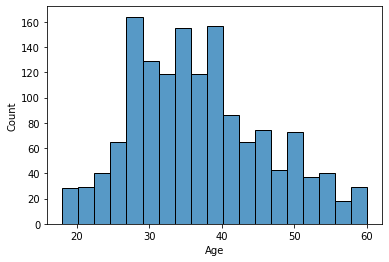

In [ ]:
#the age distribution of employees in IBM
sns.histplot(data=pd_df_ibm_attrition_data, x="Age")

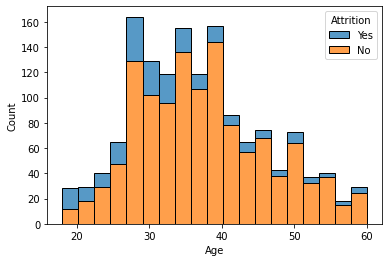

In [ ]:
#The default approach to plotting multiple distributions is to “layer” them, but you can also “stack” them:
sns.histplot(data=pd_df_ibm_attrition_data, x="Age", hue="Attrition", multiple="stack")

##Explore attrition by age

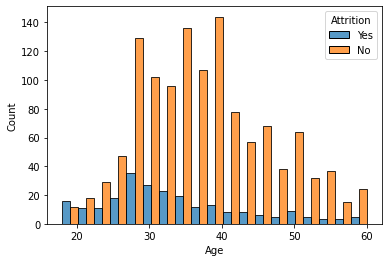

In [ ]:
#The default approach to plotting multiple distributions is to “layer” them, but you can also “stack” them:
sns.histplot(data=pd_df_ibm_attrition_data, x="Age", hue="Attrition", multiple="dodge")

##Age distribution, attrition by percent

In [ ]:
# groupe data by attrition and slice by Age
pd_df_count = sliceDataByFeatures("Age")
# transpose data frame
pd_df_count_Transpose = pd_df_count.T

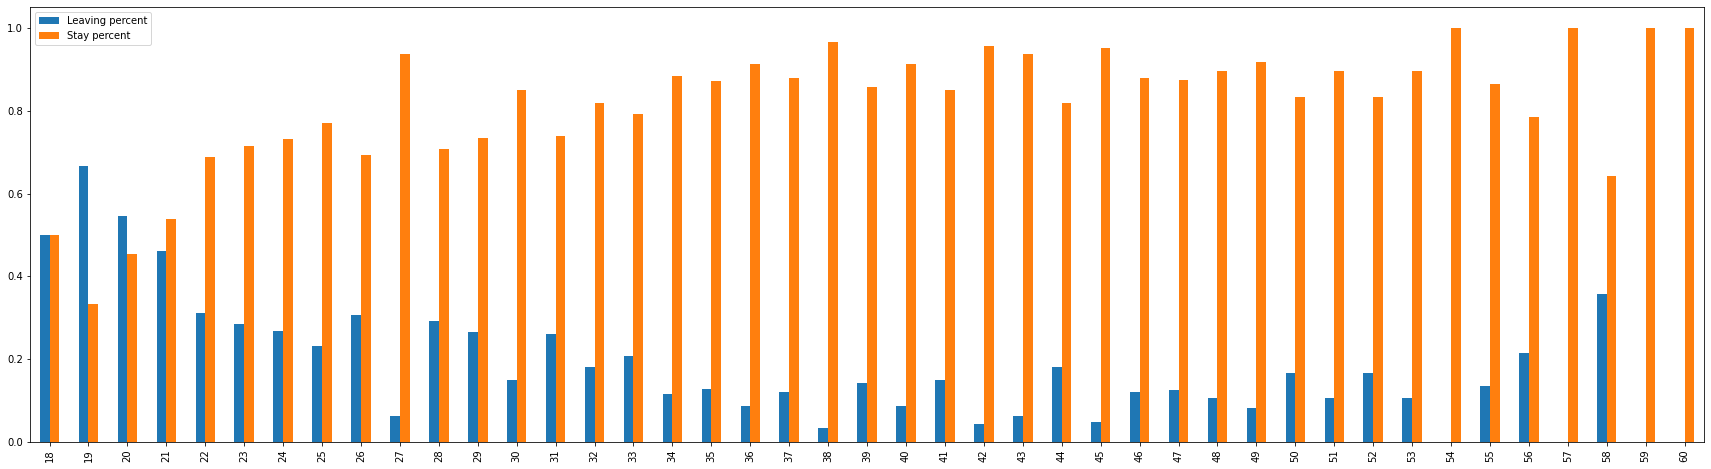

In [ ]:
# calculate the percent of leave employee
p0 = pd_df_count_Transpose['Leave the company'] / pd_df_count_Transpose['Total status employee']
# calculate the percent of stay employee
p1 = pd_df_count_Transpose['Stay in company'] / pd_df_count_Transpose['Total status employee']
# create a data frame
p = pd.DataFrame({'Leaving percent':np.array(p0), 'Stay percent':np.array(p1)}, index=pd_df_count_Transpose.index)
# plot the percent of leave and stay employee
p.plot.bar(figsize=(30, 8))

##Age distribution, attrition by number

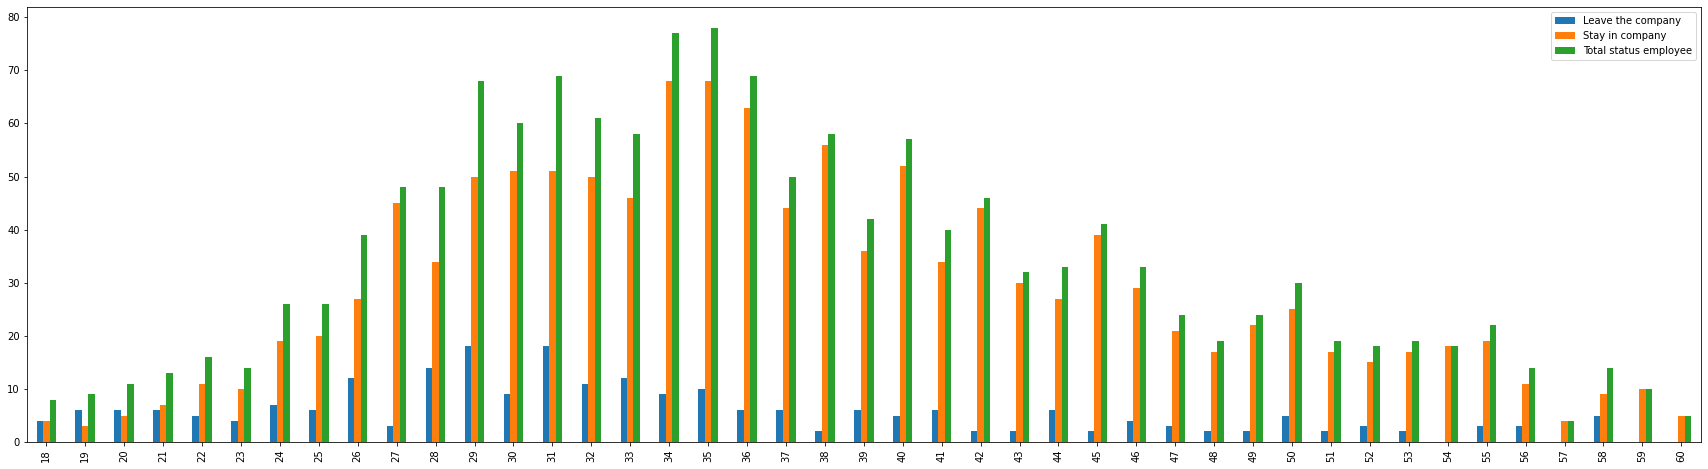

In [ ]:
# plot number of employee by age
pd_df_count_Transpose.plot.bar(figsize=(30, 8))

##Age distribution, attrition by marital status

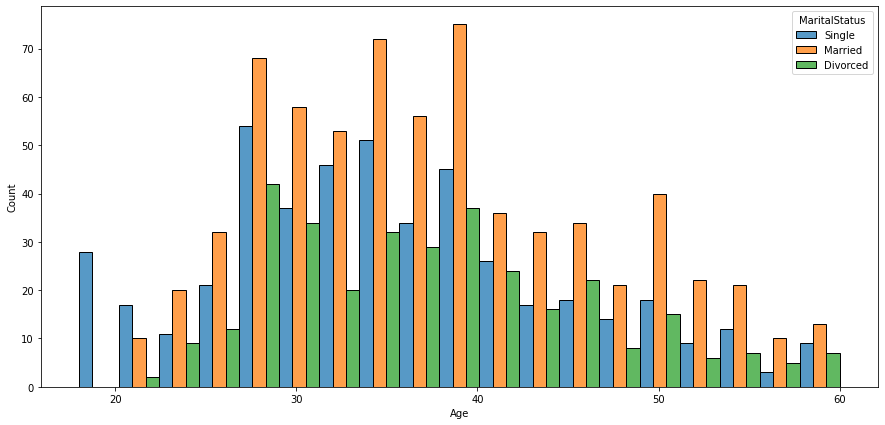

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
width, height = 15, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.histplot(data=pd_df_ibm_attrition_data, x="Age", hue="MaritalStatus", multiple="dodge")

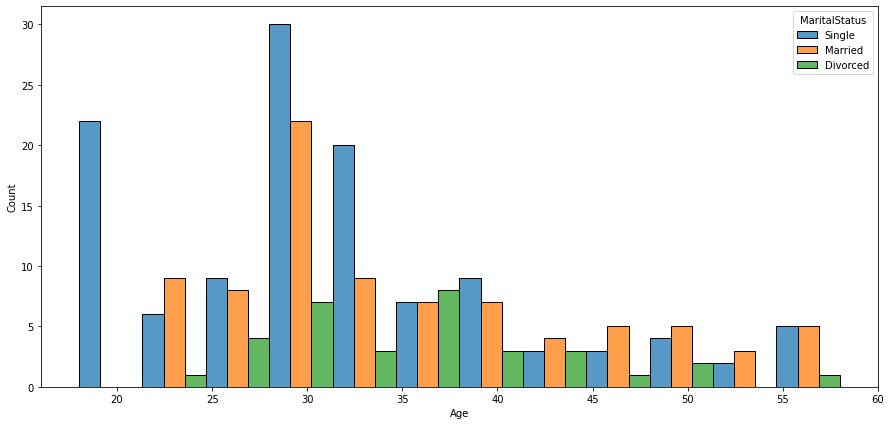

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
width, height = 15, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.histplot(data=pd_df_attrition_yes, x="Age", hue="MaritalStatus", multiple="dodge")

##Statistical calculation

In [ ]:
pd_df_ibm_attrition_data['Age'].agg(['max', 'min', 'std', 'mean', 'median'])

max       60.000000
min       18.000000
std        9.135373
mean      36.923810
median    36.000000
Name: Age, dtype: float64

In [ ]:
pd_df_attrition_yes['Age'].agg(['max', 'min', 'std', 'mean', 'median'])

max       58.000000
min       18.000000
std        9.689350
mean      33.607595
median    32.000000
Name: Age, dtype: float64

In [ ]:
pd_df_attrition_no['Age'].agg(['max', 'min', 'std', 'mean', 'median'])

max       60.000000
min       18.000000
std        8.888360
mean      37.561233
median    36.000000
Name: Age, dtype: float64

In [ ]:
# Calculate standard deviation, mean and median between the ages of 34 and 55 for employee that leave the company
sort_data = pd_df_attrition_yes['Age'].sort_values()
np_array_data_yes = np.array(sort_data)
index_34 = np.argwhere(np_array_data_yes == 34).flatten()[0]
index_55 = np.argwhere(np_array_data_yes == 56).flatten()[0]
print("Calculate standard deviation, mean and median between the ages of 34 and 55 for employee that leave the company")
print('Standard deviation {}'.format(np.std(np_array_data_yes[index_34:index_55])))
print('Mean               {}'.format(np.mean(np_array_data_yes[index_34:index_55])))
print('Median             {}'.format(np.median(np_array_data_yes[index_34:index_55])))

Calculate standard deviation, mean and median between the ages of 34 and 55 for employee that leave the company
Standard deviation 6.235396161372282
Mean               41.72727272727273
Median             40.5


In [ ]:
# Calculate standard deviation, mean and median between the ages of 34 and 55 for employee that remain in the company
sort_data = pd_df_attrition_no['Age'].sort_values()
np_array_data_no = np.array(sort_data)
index_34 = np.argwhere(np_array_data_no == 34).flatten()[0]
index_55 = np.argwhere(np_array_data_no == 55).flatten()[0]
print('Calculate standard deviation, mean and median between the ages of 34 and 55 for employee that remain in the company')
print('Standard deviation {}'.format(np.std(np_array_data_no[index_34:index_55])))
print('Mean               {}'.format(np.mean(np_array_data_no[index_34:index_55])))
print('Median             {}'.format(np.median(np_array_data_no[index_34:index_55])))

Calculate standard deviation, mean and median between the ages of 34 and 55 for employee that remain in the company
Standard deviation 5.742176252053532
Mean               41.320754716981135
Median             40.0


##Conclusion

After that analyze the age distribution of employees in IBM, see that the data is right skewed by age. The distribution is positively skewed. The highest rate of leaving the company is between the ages of 18 and 33. We can see that the rate of leaving the company is more stabil between 34 and 55 years, see the grafic and standard deviation.

#Explore attrition by department

##Distribution by department

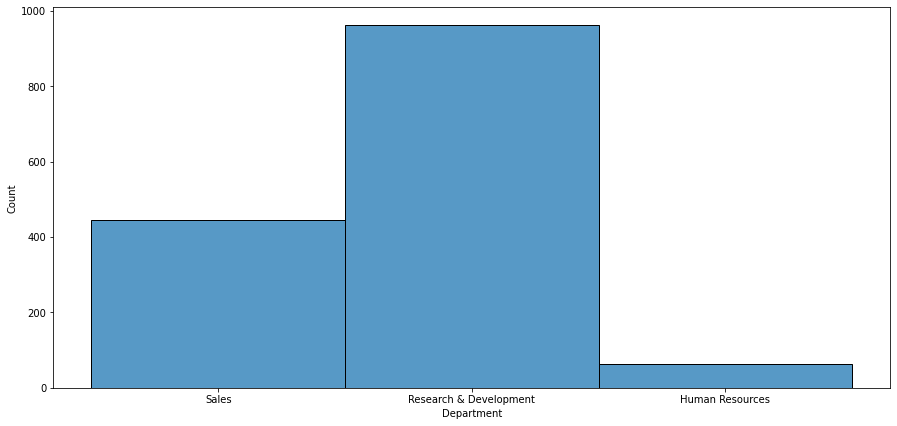

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
sns.histplot(data=pd_df_ibm_attrition_data, x="Department")

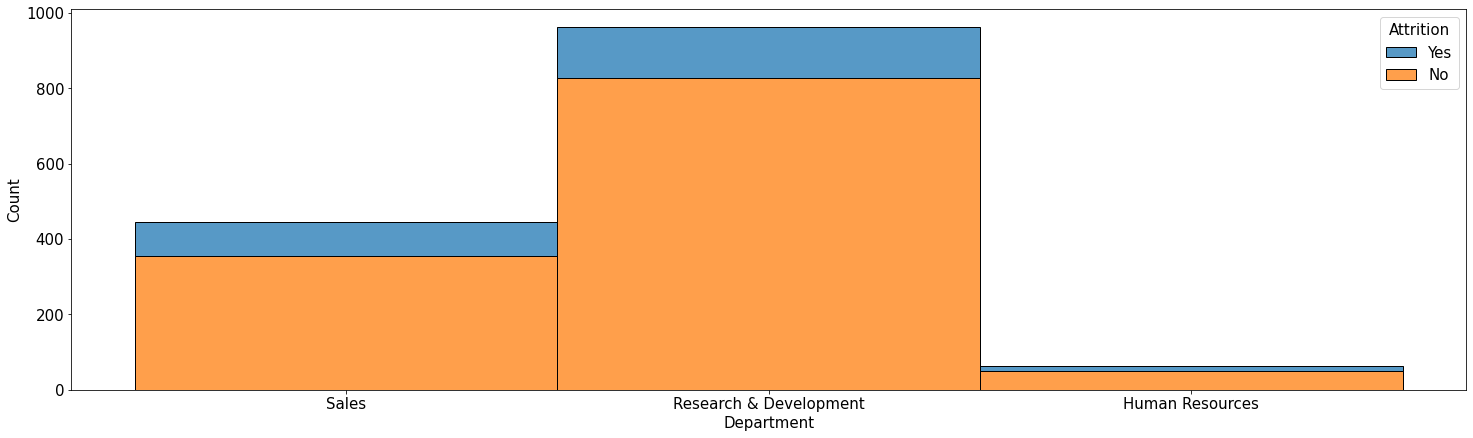

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
width, height = 25, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.histplot(data=pd_df_ibm_attrition_data, x="Department", hue="Attrition", multiple="stack")

##Leaving percent by department

In [ ]:
# groupe data by attrition and slice by Age
pd_df_count = sliceDataByFeatures("Department")
# transpose data frame
pd_df_count_Transpose = pd_df_count.T

Leave the company  ...  Total status employee
Research & Development                133  ...                    961
Sales                                  92  ...                    446
Human Resources                        12  ...                     63

[3 rows x 3 columns]

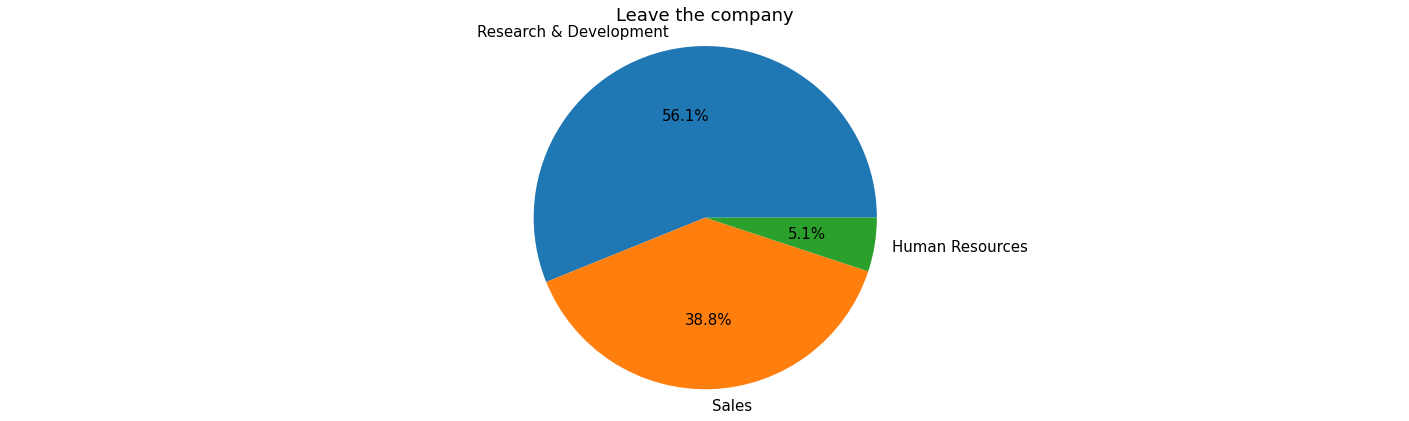

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
pieChart(pd_df_count_Transpose['Leave the company'].values, pd_df_count_Transpose['Leave the company'].index, 'Leave the company')

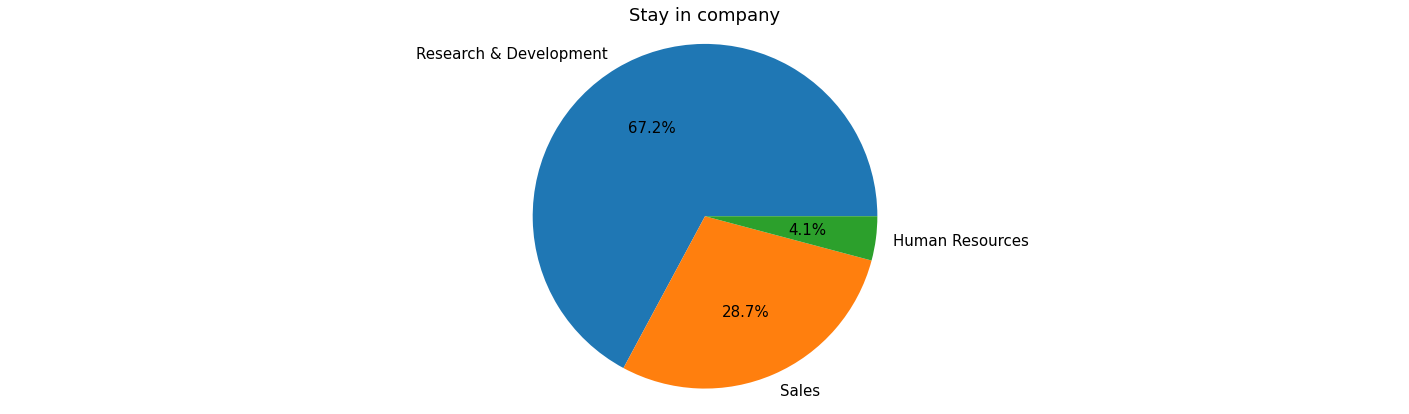

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
pieChart(pd_df_count_Transpose['Stay in company'].values, pd_df_count_Transpose['Stay in company'].index, 'Stay in company')

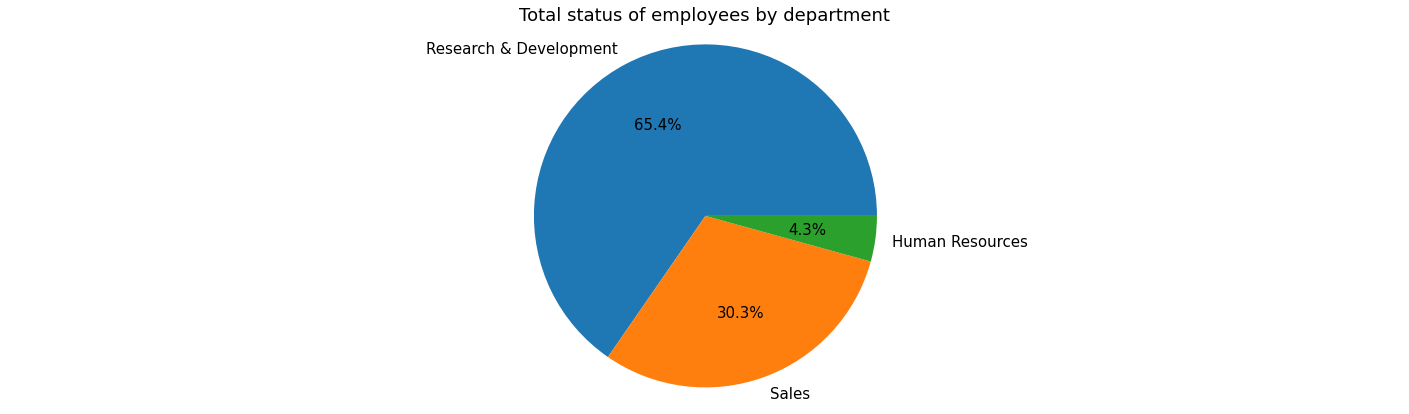

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
pieChart(pd_df_count_Transpose['Total status employee'].values, pd_df_count_Transpose['Total status employee'].index, 'Total status of employees by department')

##Conclusion

Research and Development department have the bigest number of employee from company. By the percent of leaving the company the Sales department have the biggest rate.

#Find out the distribution of employees by the education field

##Distribution by Education field from all data

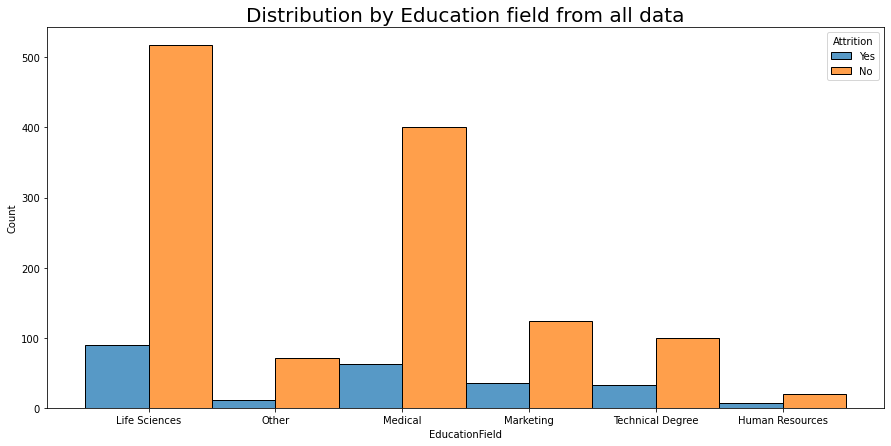

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
width, height = 15, 7
plt.rcParams['figure.figsize'] = [width, height]
ax = sns.histplot(data=pd_df_ibm_attrition_data, x="EducationField", hue="Attrition", multiple="dodge")
plt.title('Distribution by Education field from all data', fontsize = 20) # title with fontsize 20
plt.show()

##Percent of leaving employee by EducationField

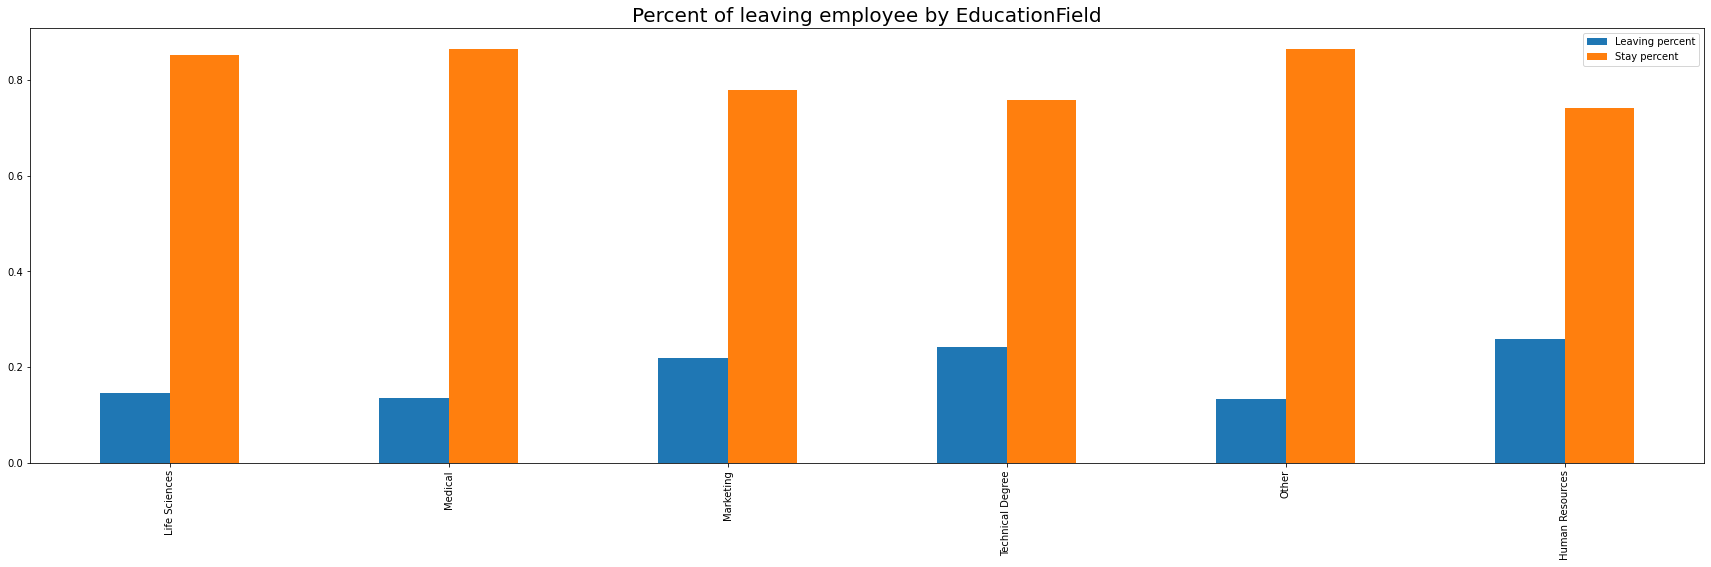

In [ ]:
pd_df_count_Transpose = sliceDataByFeatures('EducationField').T

# calculate the percent of leave employee
p0 = pd_df_count_Transpose['Leave the company'] / pd_df_count_Transpose['Total status employee']
# calculate the percent of stay employee
p1 = pd_df_count_Transpose['Stay in company'] / pd_df_count_Transpose['Total status employee']
# create a data frame
p = pd.DataFrame({'Leaving percent':np.array(p0), 'Stay percent':np.array(p1)}, index=pd_df_count_Transpose.index)
# plot the percent of leave and stay employee
p.plot.bar(figsize=(30, 8))
plt.title('Percent of leaving employee by EducationField', fontsize = 20) # title with fontsize 20
plt.show()

##Distribution by Education from all data

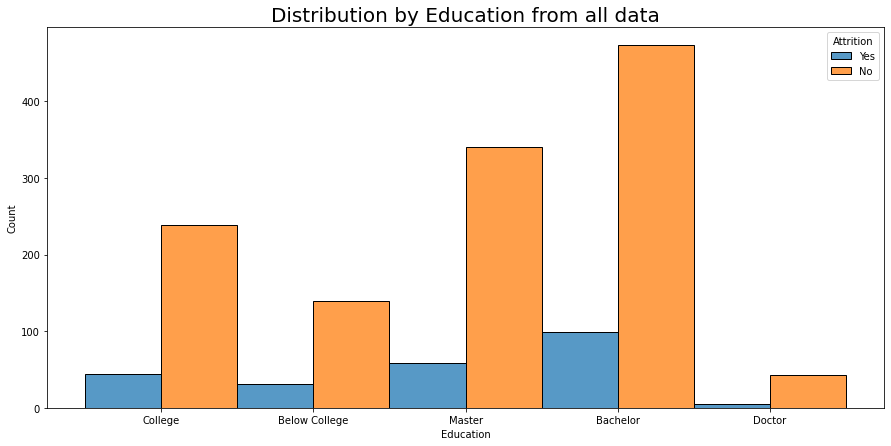

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
width, height = 15, 7
plt.rcParams['figure.figsize'] = [width, height]
ax = sns.histplot(data=pd_df_ibm_attrition_data, x="Education", hue="Attrition", multiple="dodge")
plt.title('Distribution by Education from all data', fontsize = 20) # title with fontsize 20
plt.show()

##Percent of leaving employee by Education

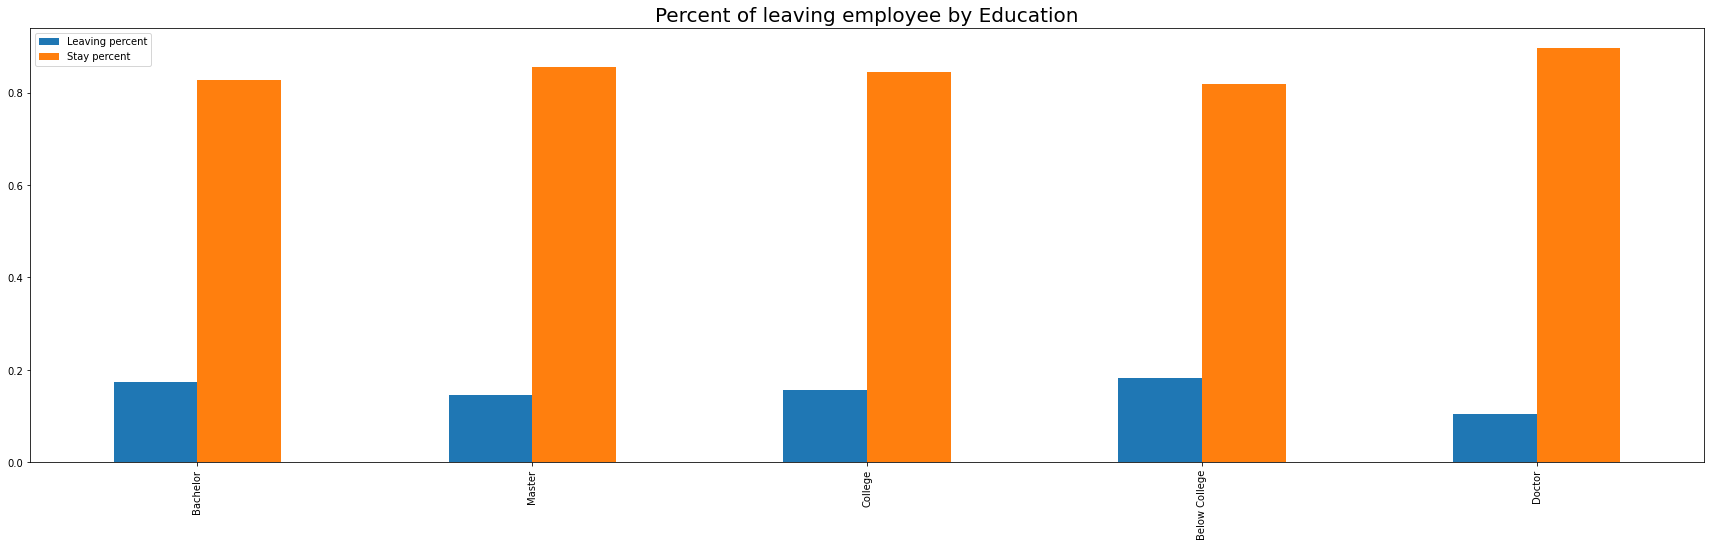

In [ ]:
pd_df_count_Transpose = sliceDataByFeatures('Education').T

# calculate the percent of leave employee
p0 = pd_df_count_Transpose['Leave the company'] / pd_df_count_Transpose['Total status employee']
# calculate the percent of stay employee
p1 = pd_df_count_Transpose['Stay in company'] / pd_df_count_Transpose['Total status employee']
# create a data frame
p = pd.DataFrame({'Leaving percent':np.array(p0), 'Stay percent':np.array(p1)}, index=pd_df_count_Transpose.index)
# plot the percent of leave and stay employee
p.plot.bar(figsize=(30, 8))
plt.title('Percent of leaving employee by Education', fontsize = 20) # title with fontsize 20
plt.show()

##Distribution by group of Education field

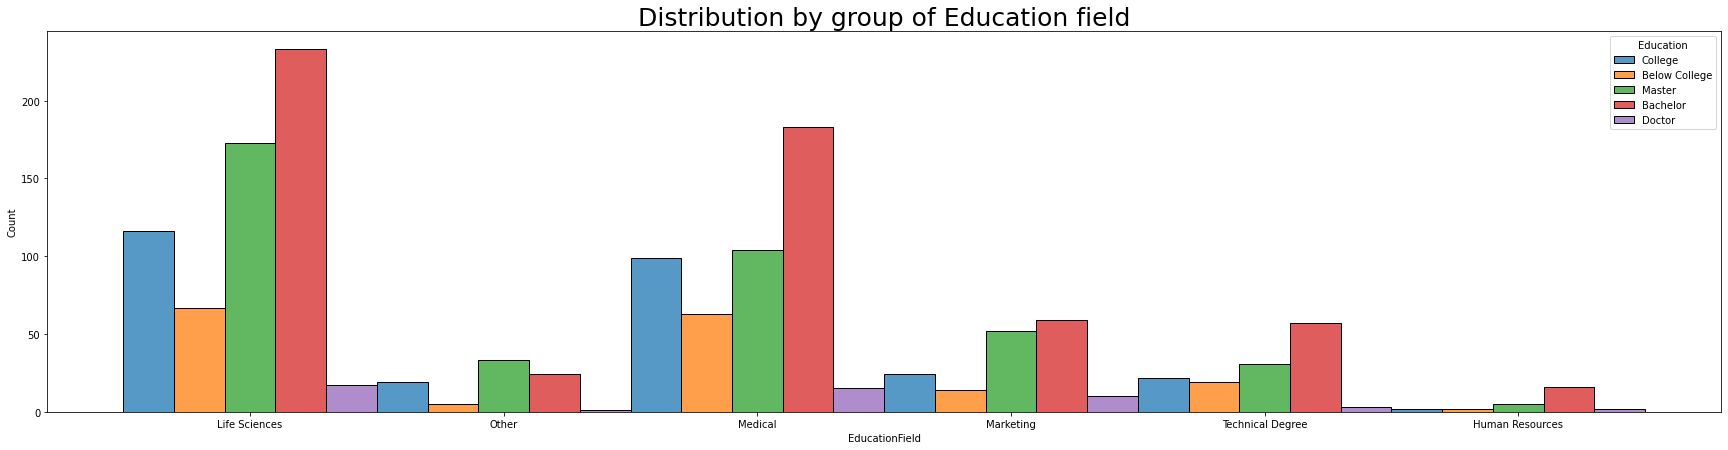

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
width, height = 30, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.histplot(data=pd_df_ibm_attrition_data, x="EducationField", hue="Education", multiple="dodge")
plt.title('Distribution by group of Education field', fontsize = 25) # title with fontsize 25
plt.show()

##Frequency by group of Education field from all datam

In [ ]:
#Group by education field
pd_s_count_eF_total = pd_df_ibm_attrition_data[["EducationField", "Education"]].value_counts().sort_index()
#get the row and column name
eF, e = zip(*np.array(pd_s_count_eF_total.index))
pd_df_count_eF_total = pd.DataFrame({'Education':e,"EducationField":eF,'Total values':pd_s_count_eF_total.values})
pd_df_count_pivot_eF_total = pd_df_count_eF_total.pivot(index=["Education"], columns=["EducationField"], values='Total values').fillna(0)

In [ ]:
pd_s_count_eF_total.describe()

count     30.000000
mean      49.000000
std       59.650707
min        1.000000
25%       11.000000
50%       23.000000
75%       62.000000
max      233.000000
dtype: float64

In [ ]:
pd_df_count_pivot_eF_total.describe()

EducationField  Human Resources  Life Sciences  ...      Other  Technical Degree
count                    5.0000       5.000000  ...   5.000000          5.000000
mean                     5.4000     121.200000  ...  16.400000         26.400000
std                      6.0663      85.153978  ...  13.296616         19.869575
min                      2.0000      17.000000  ...   1.000000          3.000000
25%                      2.0000      67.000000  ...   5.000000         19.000000
50%                      2.0000     116.000000  ...  19.000000         22.000000
75%                      5.0000     173.000000  ...  24.000000         31.000000
max                     16.0000     233.000000  ...  33.000000         57.000000

[8 rows x 6 columns]

In [ ]:
pd_df_count_pivot_eF_total.T.describe()

Education    Bachelor  Below College     College   Doctor      Master
count        6.000000       6.000000    6.000000   6.0000    6.000000
mean        95.333333      28.333333   47.000000   8.0000   66.333333
std         90.343050      29.076910   47.807949   6.9857   61.843889
min         16.000000       2.000000    2.000000   1.0000    5.000000
25%         32.250000       7.250000   19.750000   2.2500   31.500000
50%         58.000000      16.500000   23.000000   6.5000   42.500000
75%        152.000000      52.000000   80.250000  13.7500   91.000000
max        233.000000      67.000000  116.000000  17.0000  173.000000

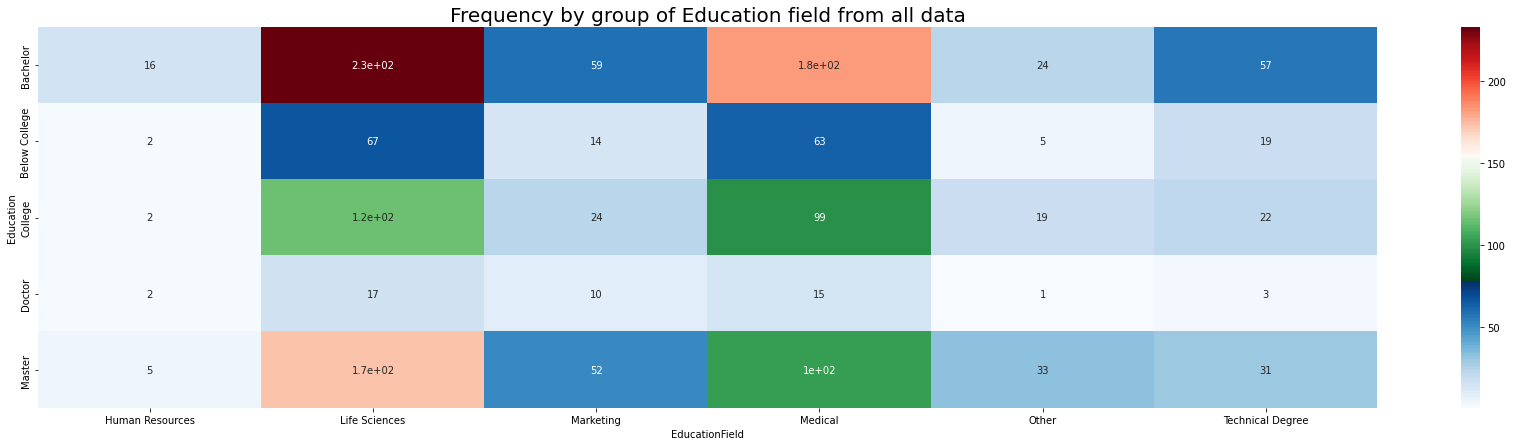

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
top = cm.get_cmap('Reds_r', 256)
miedle = cm.get_cmap('Greens_r', 256)
bottom = cm.get_cmap('Blues', 256)

newcolors = np.vstack((bottom(np.linspace(0, 1, 90)),
                       miedle(np.linspace(0, 1, 90)),
                       top(np.linspace(1, 0, 90))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

width, height = 30, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.heatmap(pd_df_count_pivot_eF_total, annot=True, cmap=newcmp)
plt.title('Frequency by group of Education field from all data', fontsize = 20) # title with fontsize 20
plt.show()

##Frequency by group of Education field only leaving company

In [ ]:
#Groupig by education field only leaving company
pd_s_count_leav_com = pd_df_attrition_yes[["EducationField", "Education"]].value_counts().sort_index()
#get the row and column name
eF, e = zip(*np.array(pd_s_count_leav_com.index))
pd_df_count_leav_com = pd.DataFrame({'Education':e,"EducationField":eF,'Values':(pd_s_count_leav_com.values)})
pd_df_pivot_count_leav_com = pd_df_count_leav_com.pivot(index=["Education"], columns=["EducationField"],values="Values").fillna(0)

In [ ]:
pd_df_count_leav_com.describe()

Values
count  27.000000
mean    8.777778
std     9.141340
min     1.000000
25%     2.000000
50%     6.000000
75%    14.000000
max    37.000000

In [ ]:
pd_df_pivot_count_leav_com.describe()

EducationField  Human Resources  Life Sciences  ...     Other  Technical Degree
count                  5.000000       5.000000  ...  5.000000          5.000000
mean                   1.400000      17.800000  ...  2.200000          6.400000
std                    1.516575      14.131525  ...  2.280351          5.549775
min                    0.000000       1.000000  ...  0.000000          2.000000
25%                    1.000000       8.000000  ...  1.000000          4.000000
50%                    1.000000      18.000000  ...  2.000000          4.000000
75%                    1.000000      25.000000  ...  2.000000          6.000000
max                    4.000000      37.000000  ...  6.000000         16.000000

[8 rows x 6 columns]

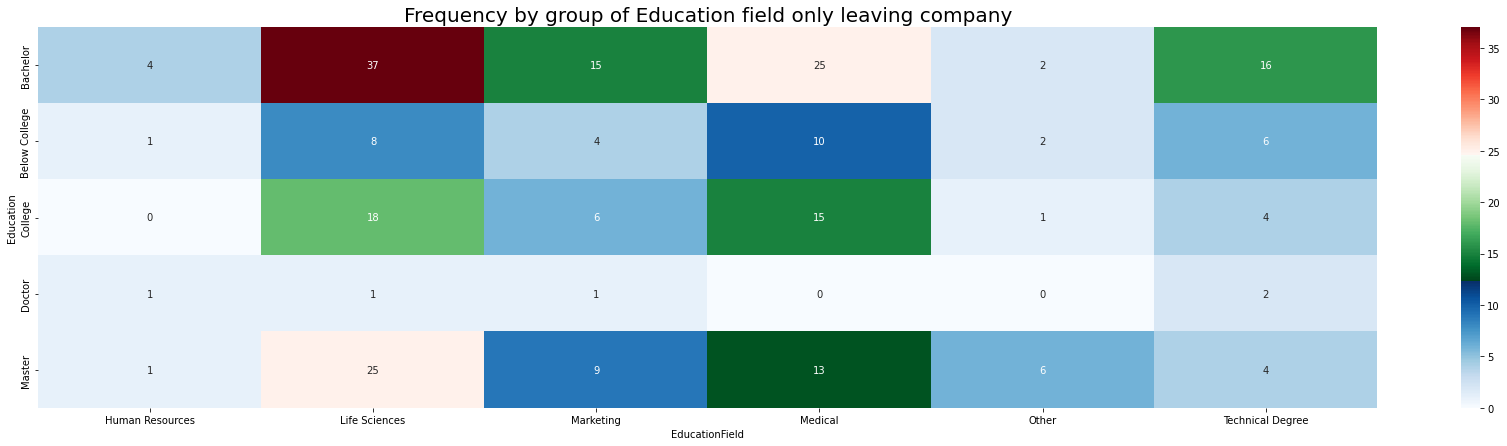

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
top = cm.get_cmap('Reds_r', 90)
miedle = cm.get_cmap('Greens_r', 90)
bottom = cm.get_cmap('Blues', 90)

newcolors = np.vstack((bottom(np.linspace(0, 1, 90)),
                       miedle(np.linspace(0, 1, 90)),
                       top(np.linspace(1, 0, 90))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

width, height = 30, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.heatmap(pd_df_pivot_count_leav_com, annot=True, cmap=newcmp)
plt.title('Frequency by group of Education field only leaving company', fontsize = 20) # title with fontsize 20
plt.show()

##Percent by group of Education field only leaving company

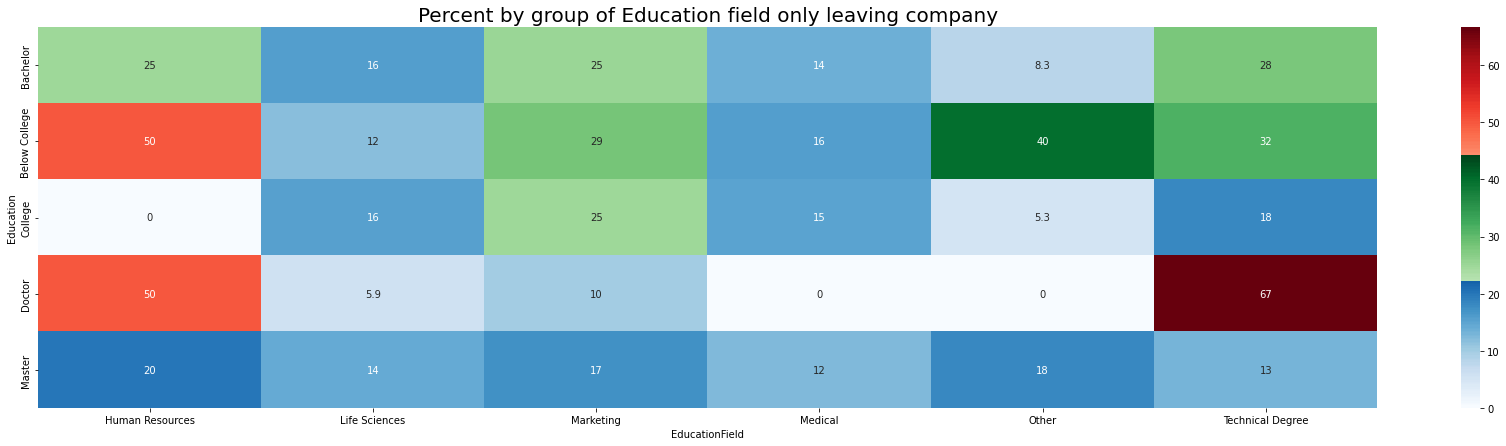

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
top = cm.get_cmap('Reds_r', 90)
miedle = cm.get_cmap('Greens_r', 90)
bottom = cm.get_cmap('Blues', 90)
plt.title('Percent by group of Education field only leaving company', fontsize = 20) # title with fontsize 20
newcolors = np.vstack((bottom(np.linspace(0, 0.8, 90)),
                       miedle(np.linspace(0.7, 0, 90)),
                       top(np.linspace(0.6, 0, 90))))
newcmp = ListedColormap(newcolors, name='heatmap_RGB')

width, height = 30, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.heatmap((pd_df_pivot_count_leav_com / pd_df_count_pivot_eF_total) * 100., annot=True, cmap=newcmp)
plt.show()

##Frequence by group of Education field

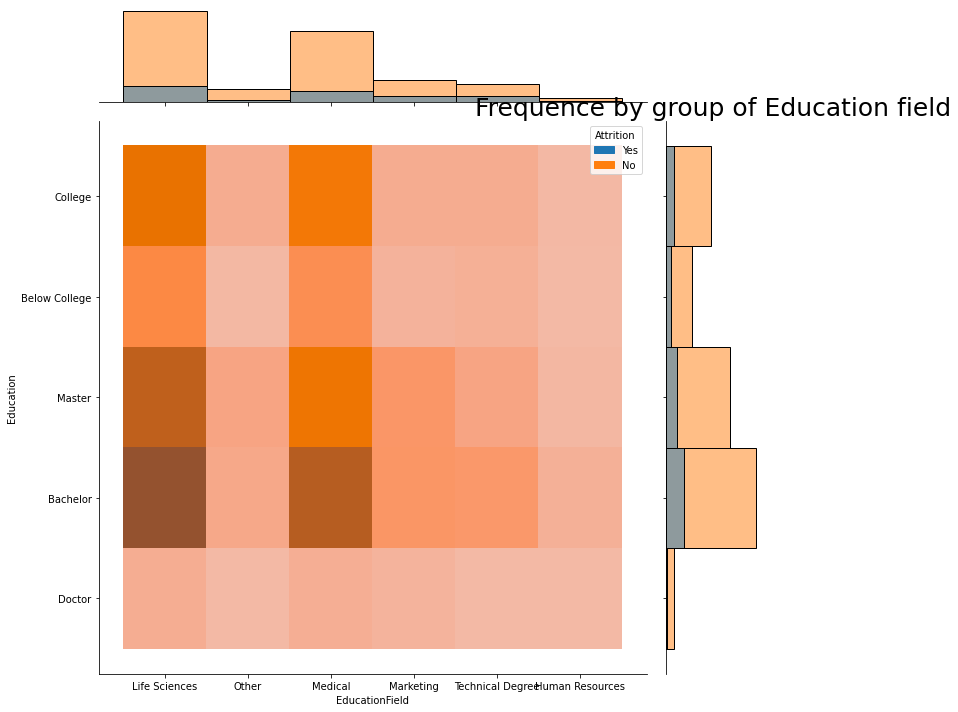

In [ ]:
#Frequency by group of education field
width, height = 25, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.jointplot(data=pd_df_ibm_attrition_data, x="EducationField", y="Education", hue='Attrition', kind="hist", height=10)
plt.title('Frequence by group of Education field', fontsize = 25) # title with fontsize 25
plt.show()

##Conclusion:

    The domain Life Science from EducationField features have the bigest number of employee from company, but by the percent of leaving the domain Human Resources have the biggest rate and the smal number of employee.
    The Bachelor academic degree from Education features have the bigest number of employee from company, but by the percent of leaving the academic degree Below College have the biggest rate.
    The Doctor academic degree from Education features have the bigest pecent of stay employee in company, but for domain Technical Degree have the biggest rate of leaving employee is critical case.

#Education field campare by marital status

##Education field frequence by marital status

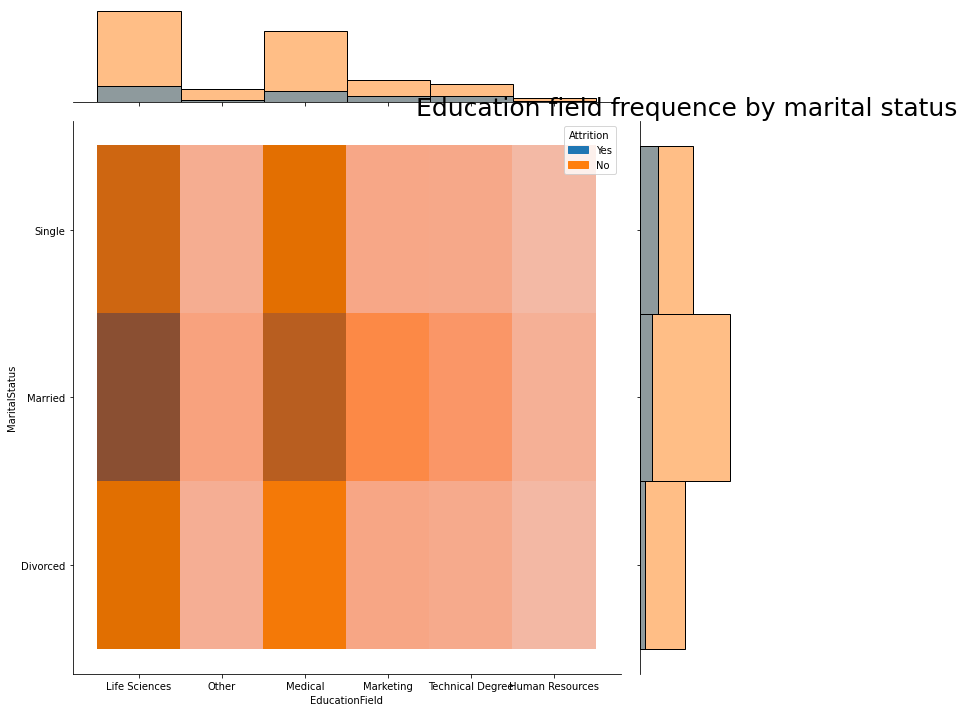

In [ ]:
#Frequency by group of education field
width, height = 25, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.jointplot(data=pd_df_ibm_attrition_data, x="EducationField", y="MaritalStatus", hue='Attrition', kind="hist", height=10)
plt.title('Education field frequence by marital status', fontsize = 25) # title with fontsize 25
plt.show()

##Education field frequency by marital status

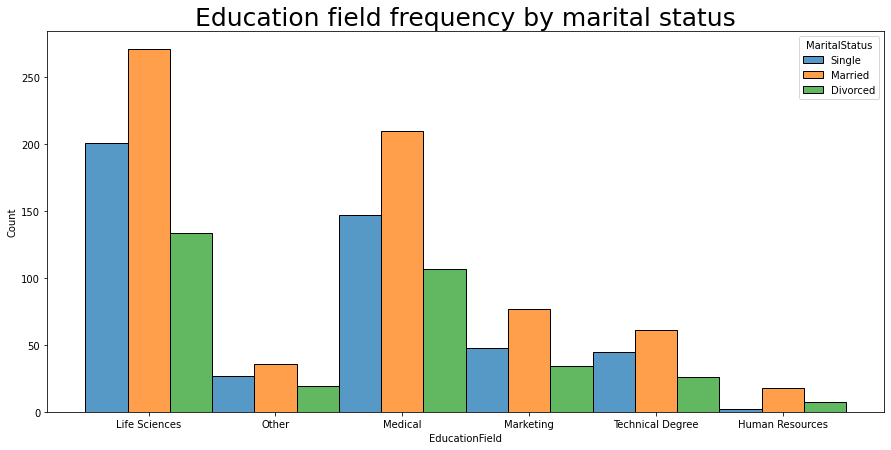

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
width, height = 15, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.histplot(data=pd_df_ibm_attrition_data, x="EducationField", hue="MaritalStatus", multiple="dodge")
plt.title('Education field frequency by marital status', fontsize = 25) # title with fontsize 25
plt.show()

##Education field frequency by marital status only leaving company

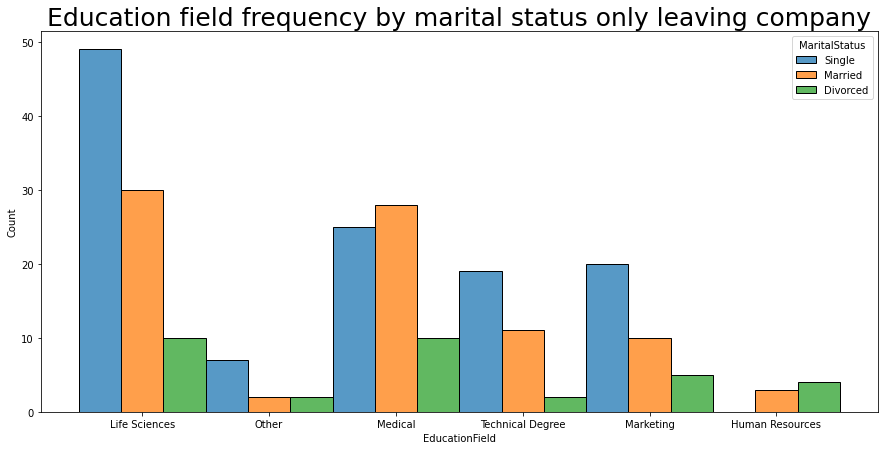

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
width, height = 15, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.histplot(data=pd_df_attrition_yes, x="EducationField", hue="MaritalStatus", multiple="dodge")
plt.title('Education field frequency by marital status only leaving company', fontsize = 25) # title with fontsize 25
plt.show()

##Conclusion:
   Unmaried employee have the biggest leaving for all science domain.

#Give a bar chart for the number of married and unmarried employees

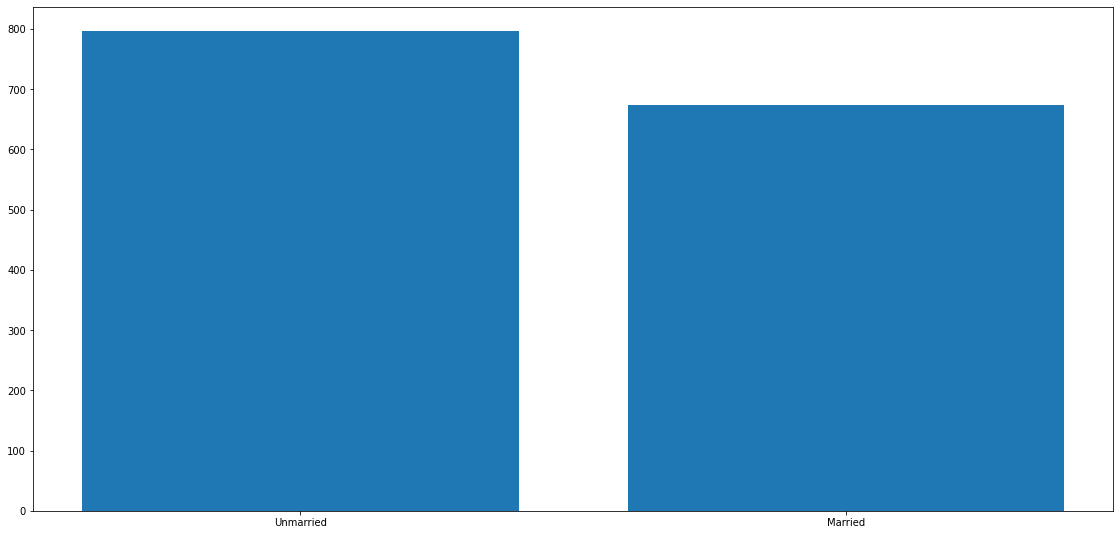

In [ ]:
#show bar char of married and unmarried employees
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
sequence_name = pd_s_group_marital_count_status.index
number_sequence_name = pd_s_group_marital_count_status.values
ax.bar(sequence_name, number_sequence_name)
plt.show()

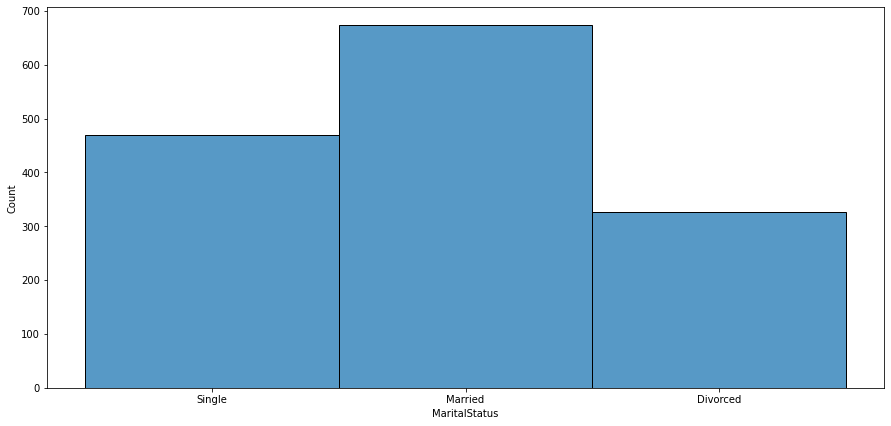

In [ ]:
#the distribution of employees by the marital status field
width, height = 15, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.histplot(data=pd_df_ibm_attrition_data, x="MaritalStatus")

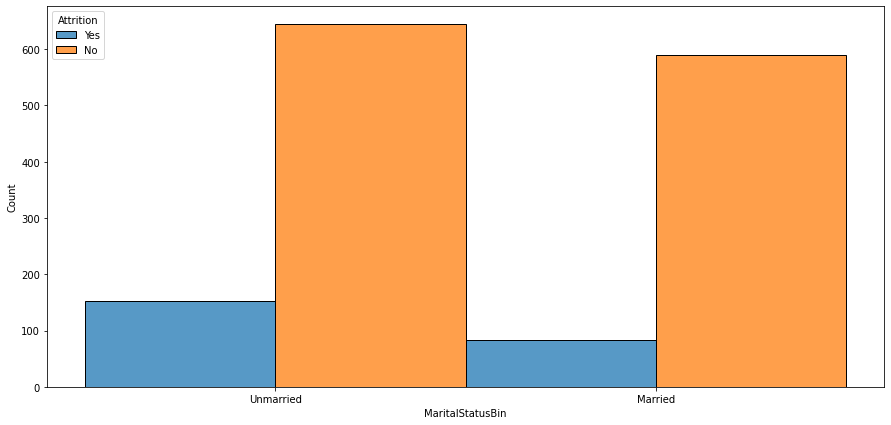

In [ ]:
#the distribution of employees by the marital status field
width, height = 15, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.histplot(data=pd_df_ibm_attrition_data, x="MaritalStatusBin", hue="Attrition", multiple="dodge")

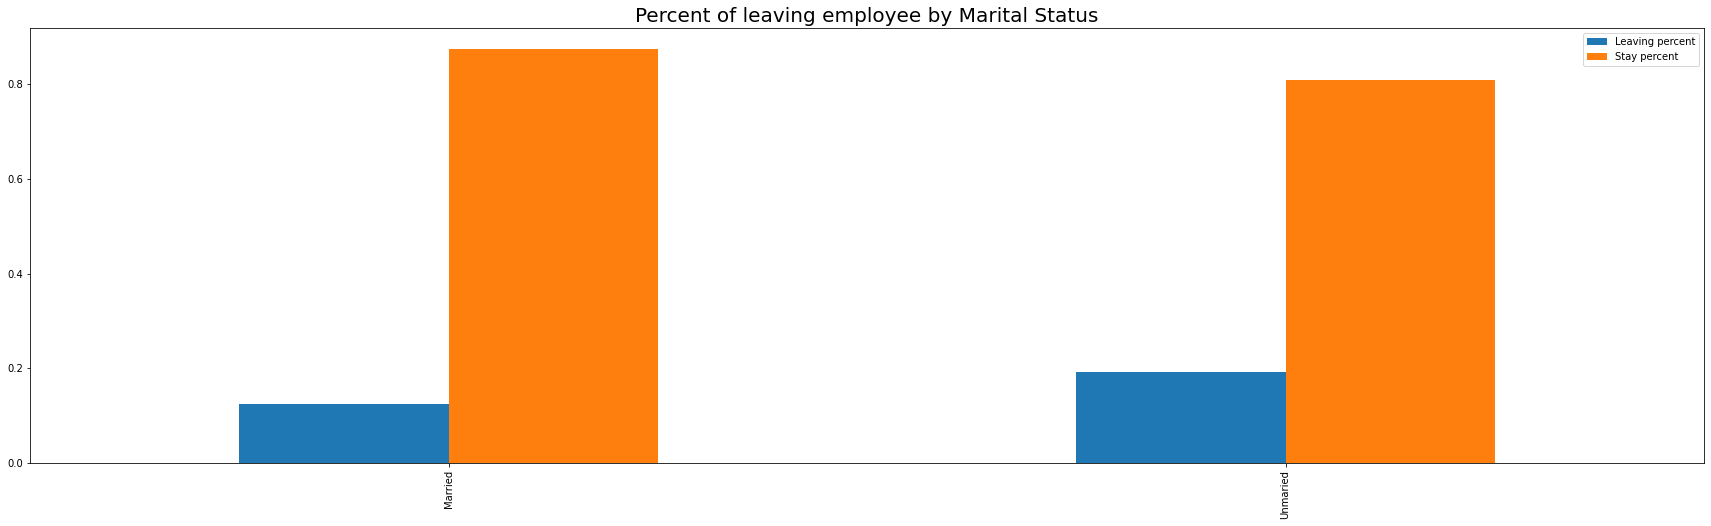

In [ ]:
pd_df_count = sliceDataByFeatures('MaritalStatus')
pd_df_count['Unmaried'] = pd_df_count['Divorced'] + pd_df_count['Single']
pd_df_count.drop(columns=['Divorced', 'Single'], axis=1, inplace=True)
pd_df_count_Transpose = pd_df_count.T
# calculate the percent of leave employee
p0 = pd_df_count_Transpose['Leave the company'] / pd_df_count_Transpose['Total status employee']
# calculate the percent of stay employee
p1 = pd_df_count_Transpose['Stay in company'] / pd_df_count_Transpose['Total status employee']
# create a data frame
p = pd.DataFrame({'Leaving percent':np.array(p0), 'Stay percent':np.array(p1)}, index=pd_df_count_Transpose.index)
# plot the percent of leave and stay employee
p.plot.bar(figsize=(30, 8))
plt.title('Percent of leaving employee by Marital Status', fontsize = 20) # title with fontsize 20
plt.show()

##Conclusion:
  The unmaried employee have the biggest number of employee and the biggest percent of leaving employee.


#Explore data for Left employees

##Data visualisation

In [ ]:
# create a pie chart subplots
def nestePieChartAx(ax, radius_pie_size, pd_df_count_status_value, legend_title):
  # calculate size of shank of the ring
  shank_size = radius_pie_size / pd_df_count_status_value.shape[1]
  # init number of ring shank
  nbr_ring_slice = 0
  # init data show legend
  legend_name_sequence = []
  # create slice shank of the ring
  for name_status in pd_df_count_status_value.columns:
    # read number of every status
    leave_status_nbr, stay_status_nbr, total_status_nbr = pd_df_count_status_value[name_status]
    # calculate percent of leave company sliced status
    percent_leave = leave_status_nbr / total_status_nbr
    # calculate radius for every slice
    tmp_radius = (radius_pie_size - shank_size * nbr_ring_slice)
    # create a slice
    ax.pie([percent_leave, 1. - percent_leave], radius=tmp_radius, startangle=0, wedgeprops=dict(width=shank_size, edgecolor='w'), textprops=dict(color="w"))
    # calculate percent to put in legend
    tmp_val = round(percent_leave * 100, 2)
    # get data for legend of leave eemployee
    tmp_name = 'Left "' + name_status + '" ' + str(tmp_val) + '%, nr. ' + str(leave_status_nbr) + '/' + str(total_status_nbr)  + ' emp.'
    legend_name_sequence.append(tmp_name)
    # get data for legend of stay eemployee
    tmp_name = 'Stay "' + name_status + '" ' + str(100. - tmp_val) + '%, nr. ' + str(stay_status_nbr) + '/' + str(total_status_nbr) + ' emp.'
    legend_name_sequence.append(tmp_name)
    # increment number of slice
    nbr_ring_slice = nbr_ring_slice + 1

  # set legend data
  ax.legend(legend_name_sequence,
          title=legend_title,
          loc="lower left")
  pass


def showSubplot1X3NestedPieChart(pd_df_count_status_value, legend_title):
  # Make figure and axes
  fig, ((ax00, ax01, ax02, ax03), (ax10, ax11, ax12, ax13)) = plt.subplots(2, 4)
  plt.rcParams.update({'font.size': 25})
  #set radius of the pie
  radius_pie_size = 1
  #calculate size of shank of the ring
  shank_size = radius_pie_size / pd_df_count_status_value.shape[1]

  # Plot the percent of attrition by number of leave employes status
  ax00.pie(pd_df_count_status_value.loc['Leave the company'], labels=pd_df_count_status_value.columns, autopct='%1.1f%%', shadow=True, radius=radius_pie_size, startangle=0)

  # Calculate the percent of attrition by percent of leave from total status employes
  tmp_percent_name_sequence = pd_df_count_status_value.loc['Leave the company'] * 100 / pd_df_count_status_value.loc['Total status employee']
  # Plot percent of attrition by percent of leave from total status employes
  ax01.pie(tmp_percent_name_sequence, labels=pd_df_count_status_value.columns, autopct='%1.1f%%', shadow=True, radius=radius_pie_size, startangle=0)
  # Plot percent of leave company sliced status
  nestePieChartAx(ax02, radius_pie_size, pd_df_count_status_value, legend_title)
  # Plot percent of every status from features
  ax03.pie(pd_df_count_status_value.loc['Total status employee'], labels=pd_df_count_status_value.columns, autopct='%1.1f%%', shadow=True, radius=radius_pie_size, startangle=0)

  # Plot percent of remain by number of stay employes status
  ax10.pie(pd_df_count_status_value.loc['Stay in company'], labels=pd_df_count_status_value.columns, autopct='%1.1f%%', shadow=True, radius=radius_pie_size, startangle=0, wedgeprops=dict(width=shank_size, edgecolor='w'))

  # Calculate percent of remain by percent of stay from total status employes
  tmp_percent_name_sequence = pd_df_count_status_value.loc['Stay in company'] * 100 / pd_df_count_status_value.loc['Total status employee']
  # Plot percent of remain by percent of stay from total status employes
  ax11.pie(tmp_percent_name_sequence * 100, labels=pd_df_count_status_value.columns, autopct='%1.1f%%', shadow=True, radius=radius_pie_size, startangle=0, wedgeprops=dict(width=shank_size, edgecolor='w'))
  # Deactivate subplot with index [1, 2]
  ax12.set_axis_off()
  # Create a legend for features
  ax12.table(cellText=[['Percent of attrition by number of leave employes status'],             # describe axe 00
                       ['Percent of attrition by percent of leave from total status employes'], # describe axe 01
                       ['Percent of leave company sliced status'],                              # describe axe 02
                       ['Percent of every status from features'],                               # describe axe 03
                       ['Percent of remain by number of stay employes status'],                 # describe axe 10
                       ['Percent of remain by percent of stay from total status employes']],    # describe axe 11
                      cellLoc='left',                                                           # set location of the description
                      rowLabels=['axe 00', 'axe 01', 'axe 02', 'axe 03', 'axe 10', 'axe 11'],   # set the row name
                      colLabels=['Legend of features ' + legend_title],                         # set name of the legend
                      loc='center')                                                             # set location of the table
  # set the spacing between subplots
  plt.subplots_adjust(left=0.1,
                      bottom=0.1,
                      right=4.,
                      top=2.5,
                      wspace=0.1,
                      hspace=0.1)

  # Deactivate subplot with index [1, 3]
  ax13.set_axis_off()

  ax00.set_title("axe 00")
  ax01.set_title("axe 01")
  ax02.set_title("axe 02")
  ax03.set_title("axe 03")
  ax10.set_title("axe 10")
  ax11.set_title("axe 11")
  plt.show()


In [ ]:
#view pie chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
def printPieChartAttritionTest(name_features):
  #show pie chart of all status of features
  pd_df_count_status_value = sliceDataByFeatures(name_features)
  showSubplot1X3NestedPieChart(pd_df_count_status_value, name_features)


##Attrition of employees

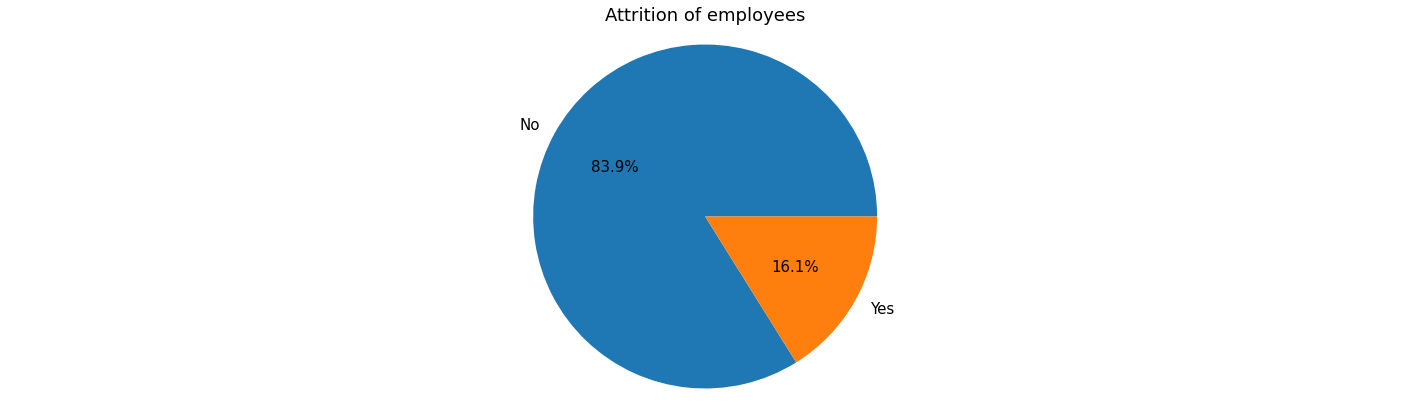

In [ ]:
#view pie chart
pd_s_count_attrition = pd_df_ibm_attrition_data['Attrition'].value_counts()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
pieChart(pd_s_count_attrition.values, pd_s_count_attrition.index, "Attrition of employees")

##Atrition of employees by department

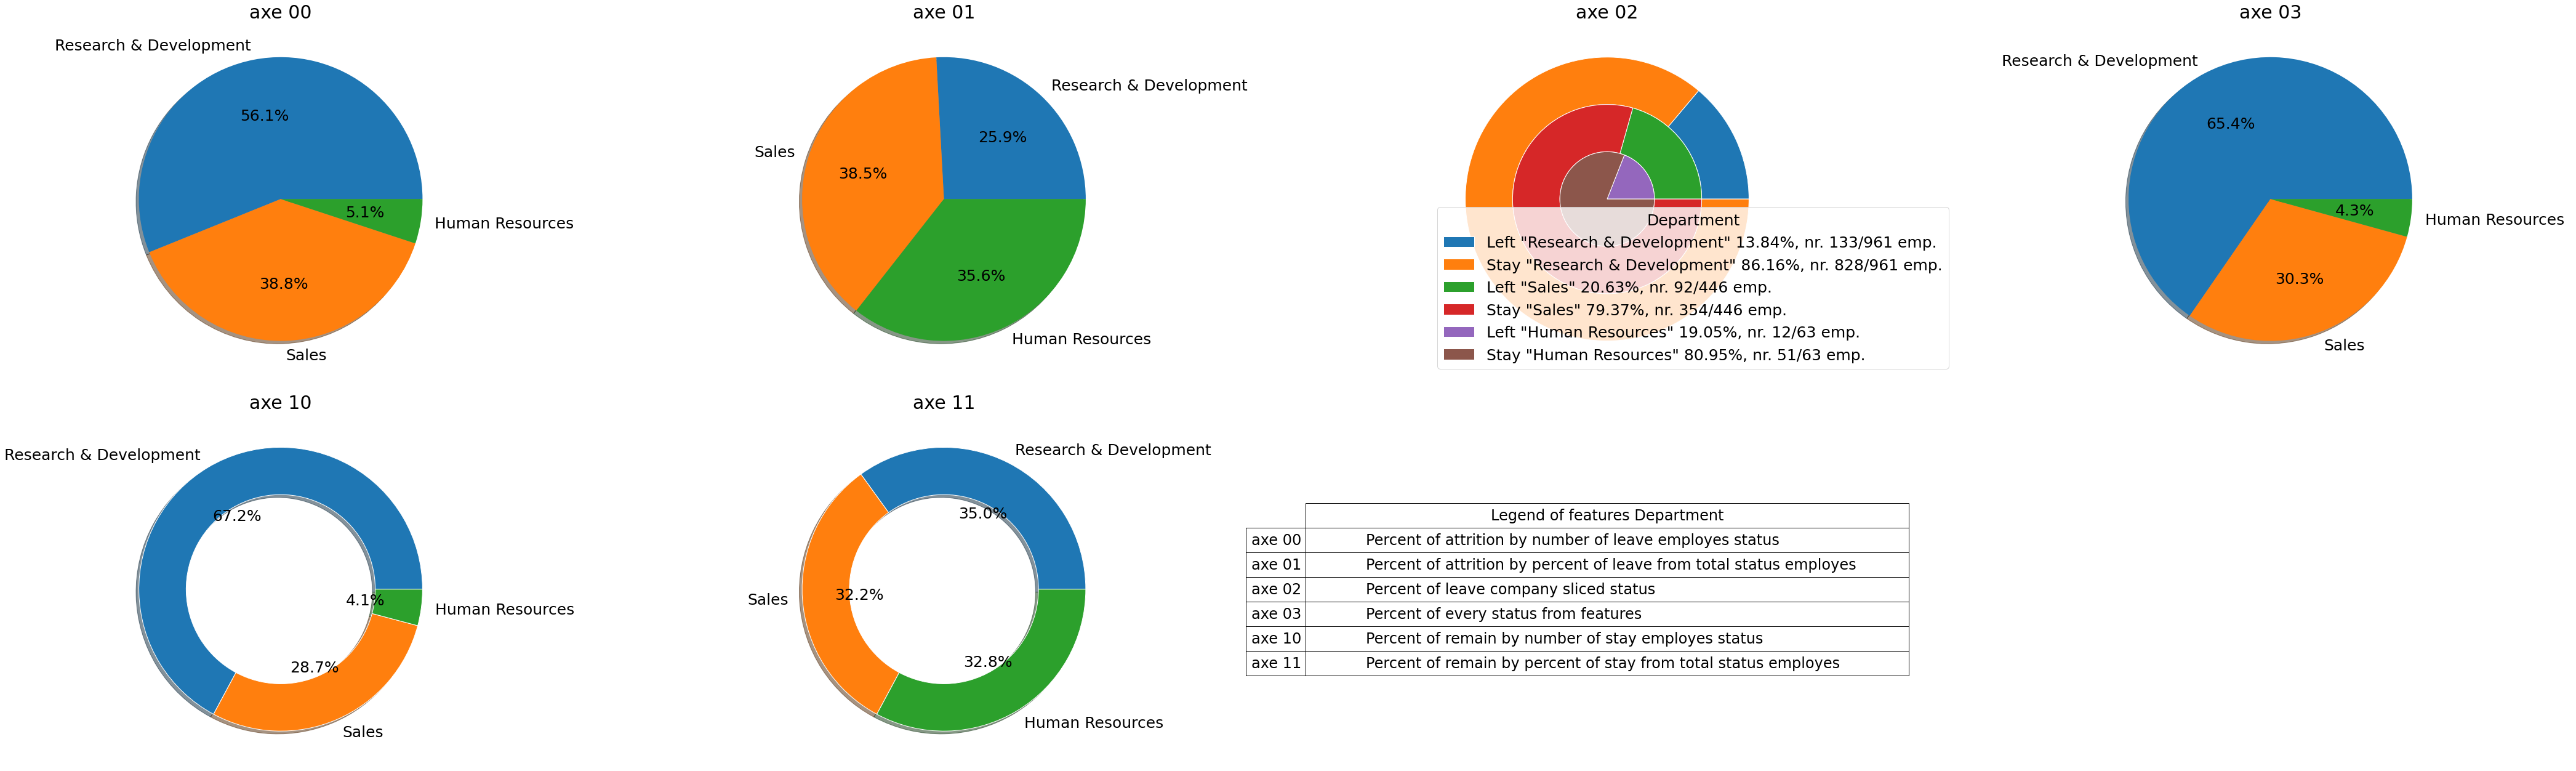

In [ ]:
printPieChartAttritionTest('Department')

###Conclusion:
- Research & Development departement have the biggest rate of leaving employees 56.1% by total number of leaving employees.
- Sales department have the biggest rate of leaving employees 20.63% by percent of status.

##Atrition of employees by education

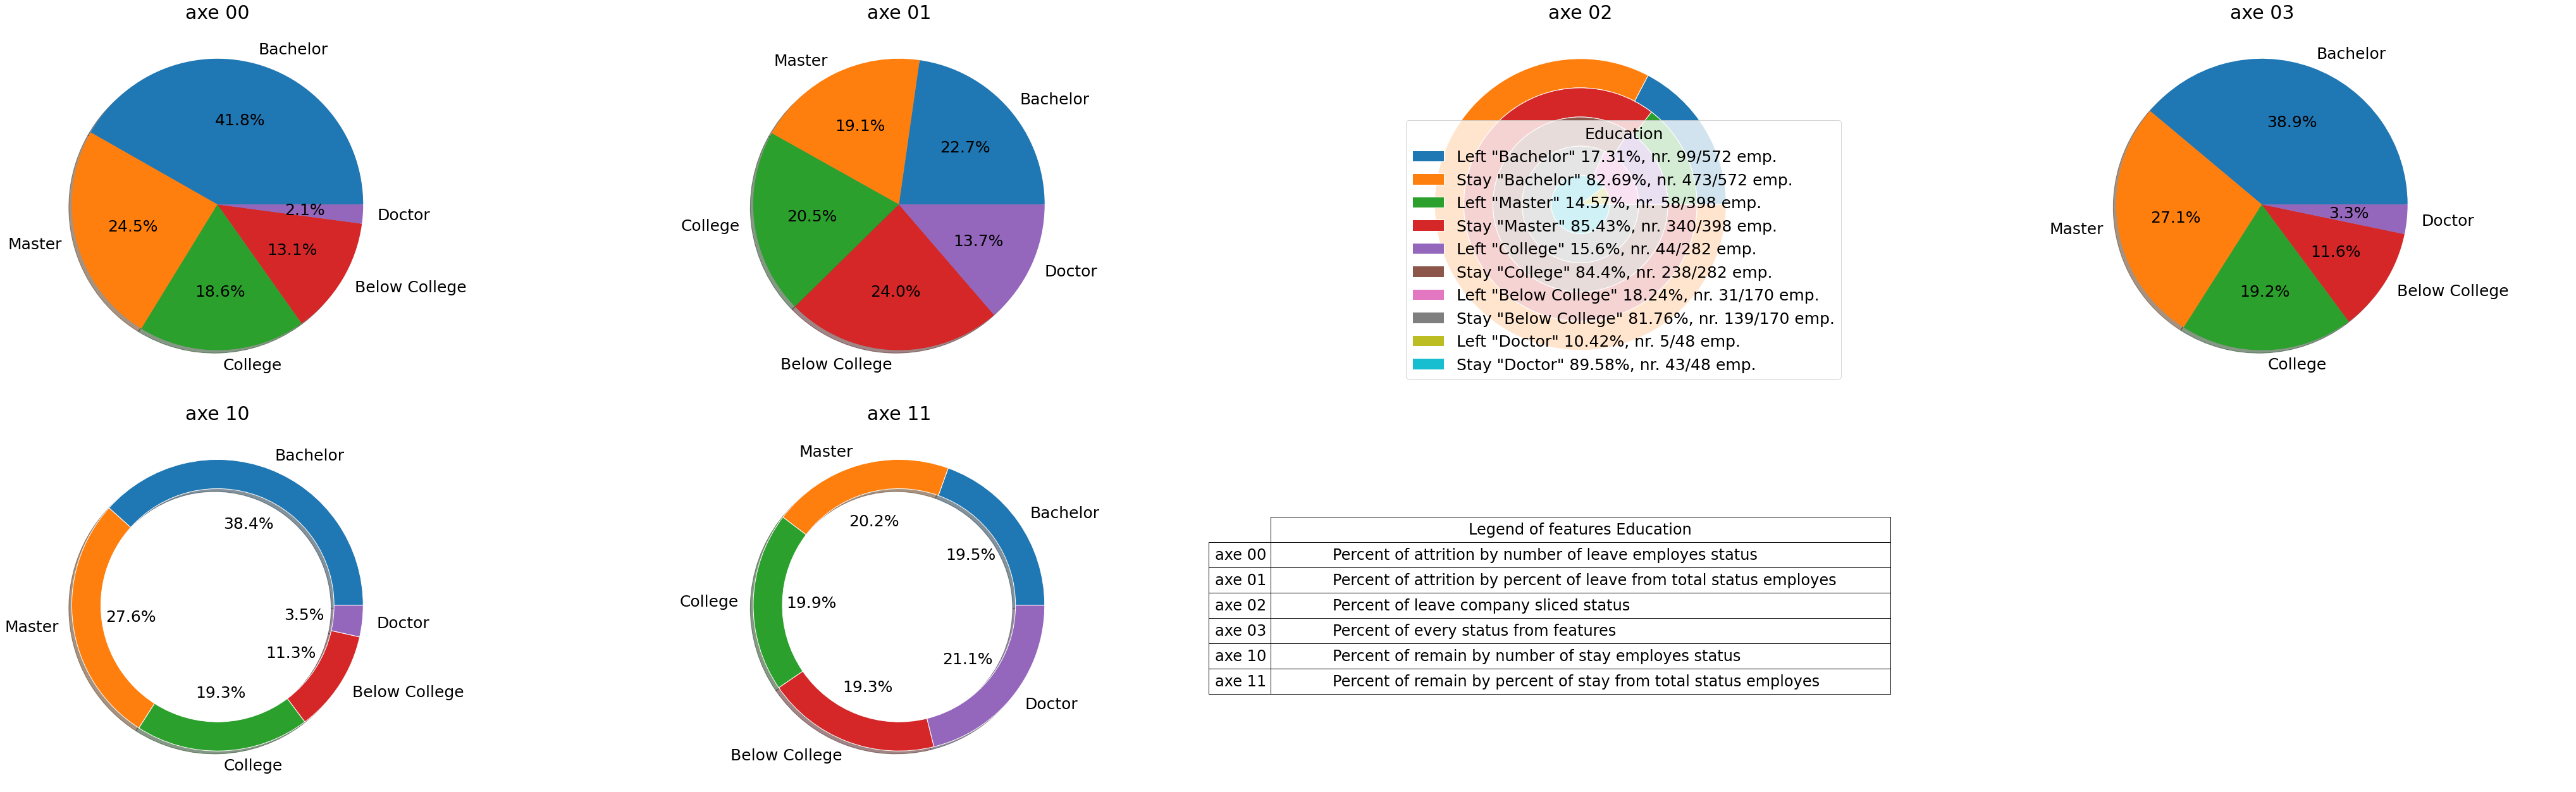

In [ ]:
printPieChartAttritionTest('Education')

###Conclusion:

- Bachelor academic degree have the biggest rate of leaving employees 41.8% by total number of leaving employees.
- Bellow College academic degree have the biggest rate of leaving employees   18.24 % by percent of status.



##Atrition of employees by education field

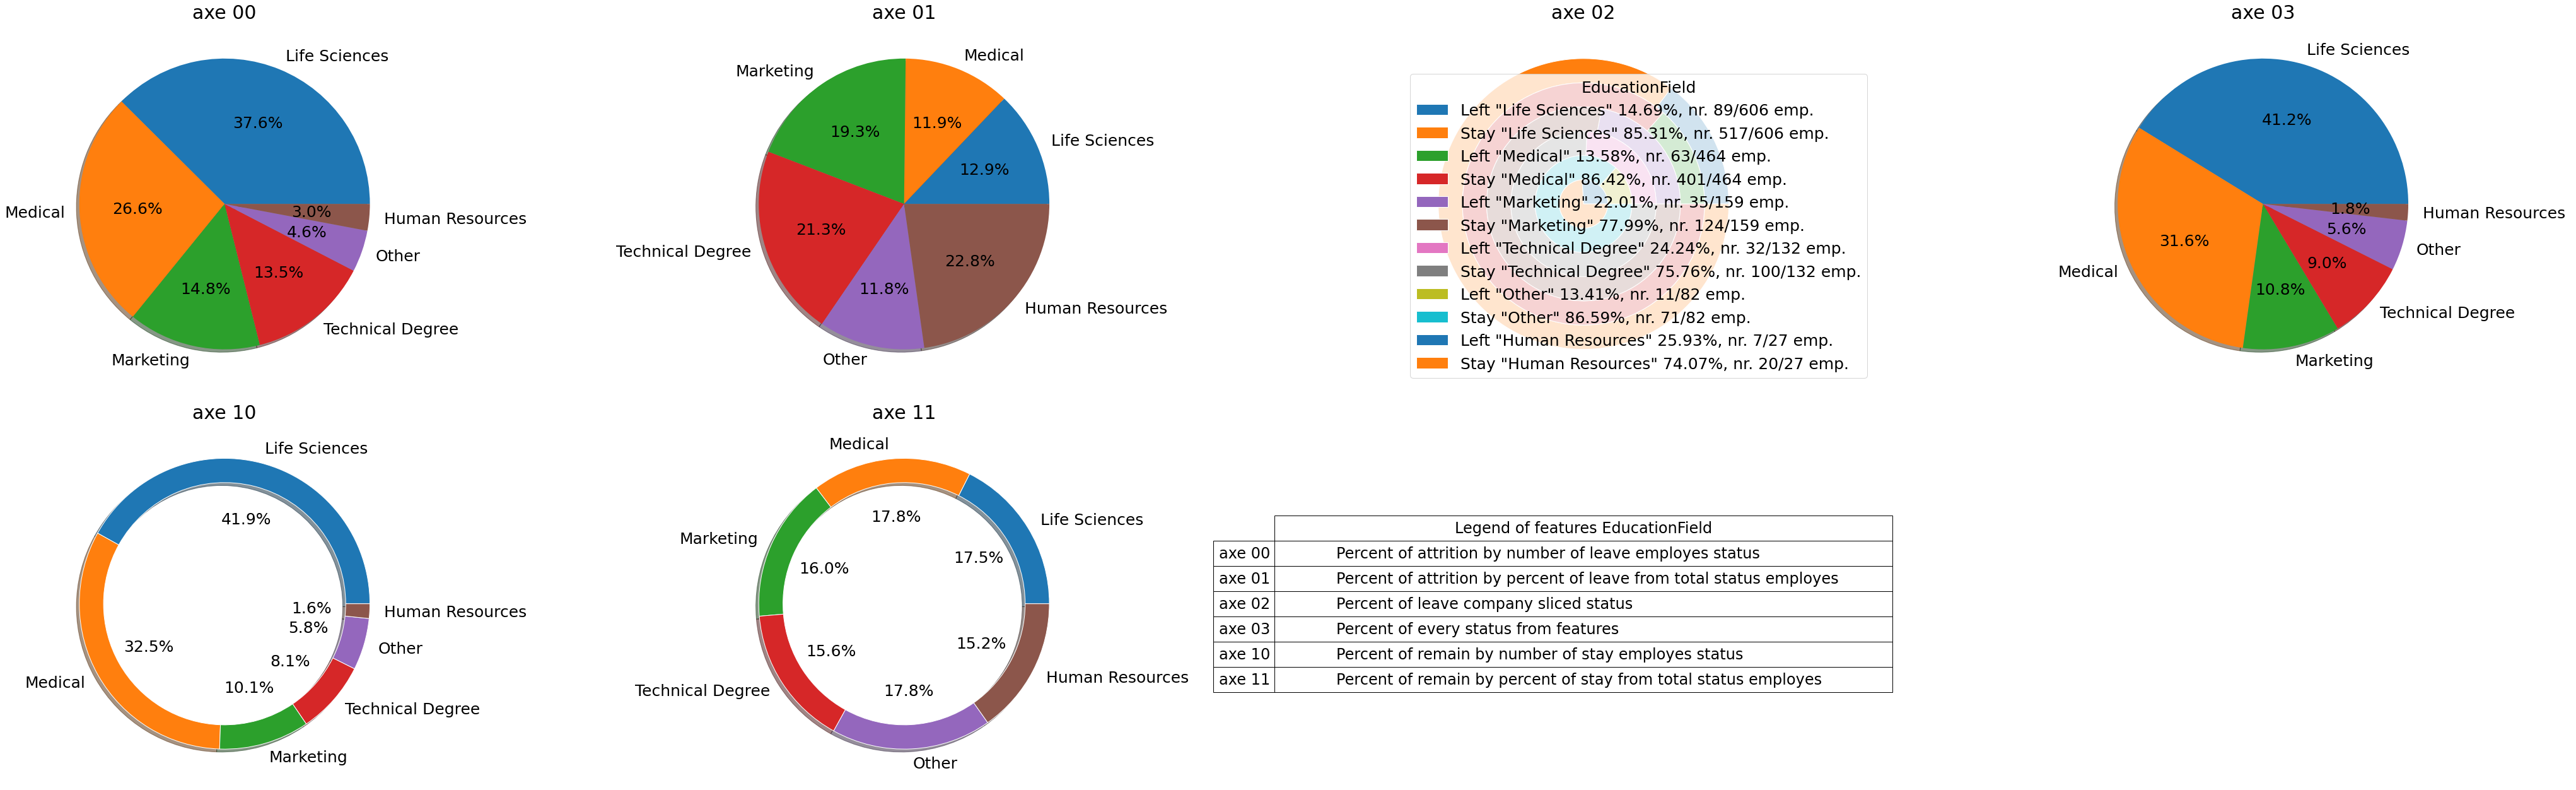

In [ ]:
printPieChartAttritionTest('EducationField')

###Conclusion:

- Life science field have the biggest rate of leaving employees 37.6% by total number of leaving employees.
- Human Resources field have the biggest rate of leaving employees 25.93 % by percent of status.

##Atrition of employees by environment satisfaction

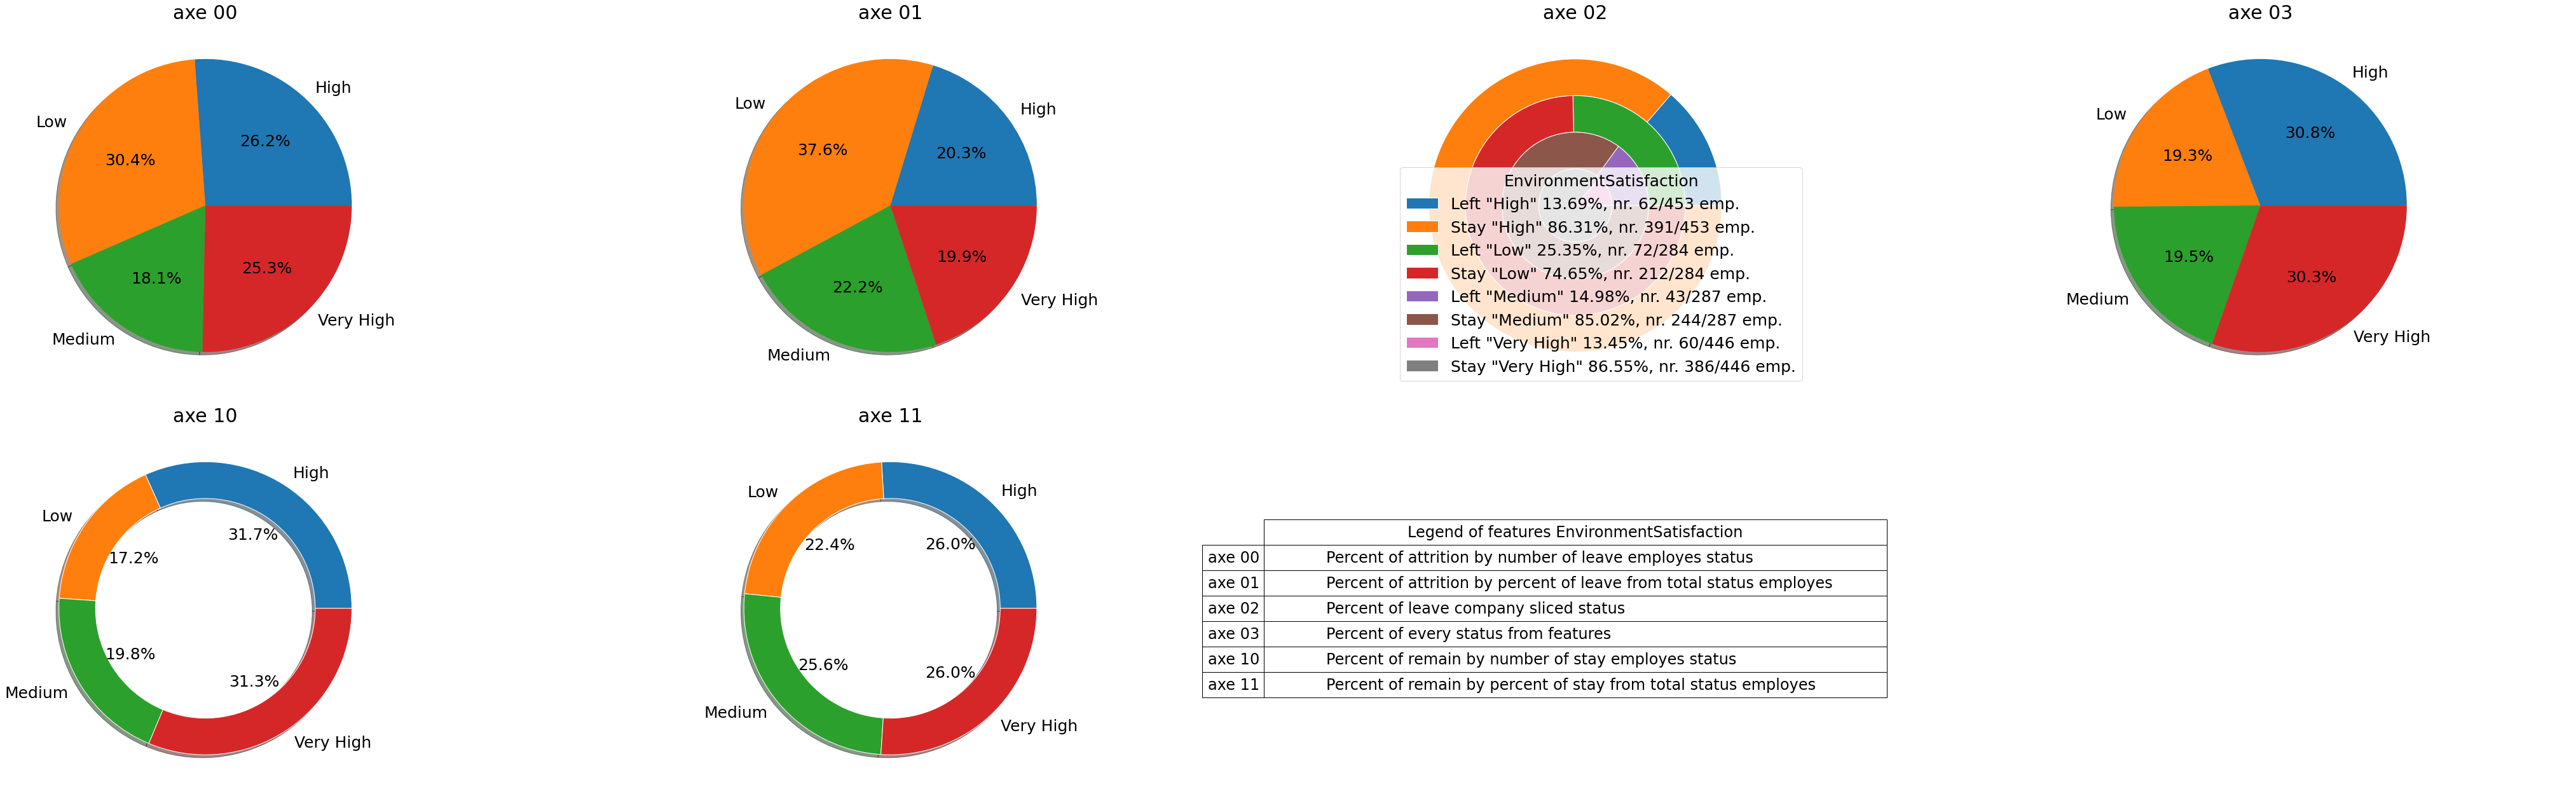

In [ ]:
printPieChartAttritionTest('EnvironmentSatisfaction')

###Conclusion:

- Low satisfaction have the biggest rate of leaving employees 30.4% by total number of leaving employees.
- Low satisfaction have the biggest rate of leaving employees   25.35 % by percent of status.

##Atrition of employees by job satisfaction

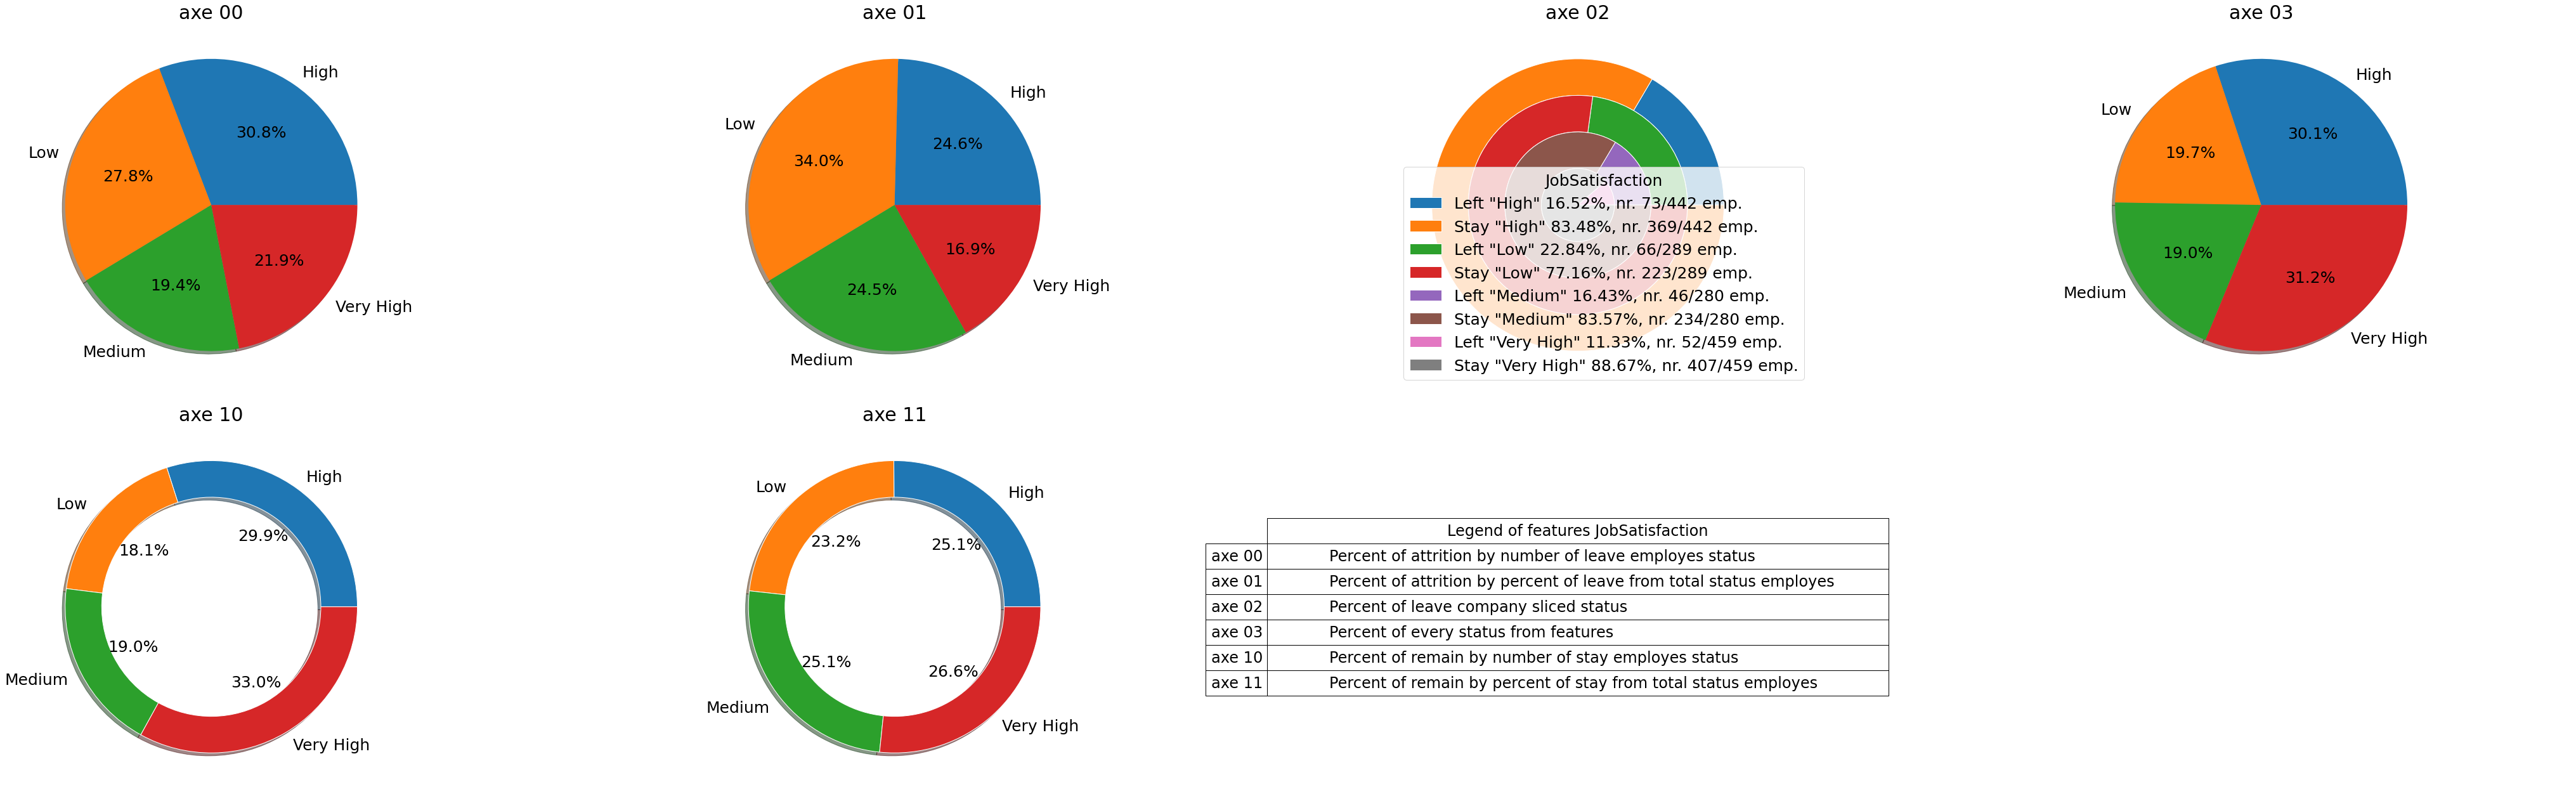

In [ ]:
printPieChartAttritionTest('JobSatisfaction')

###Conclusion:

- High job satisfaction have the biggest rate of leaving employees 30.8% by total number of leaving employees.
- Low satisfaction have the biggest rate of leaving employees   22.84 % by percent of status, see axe 02 .

##Atrition of employees by marital status

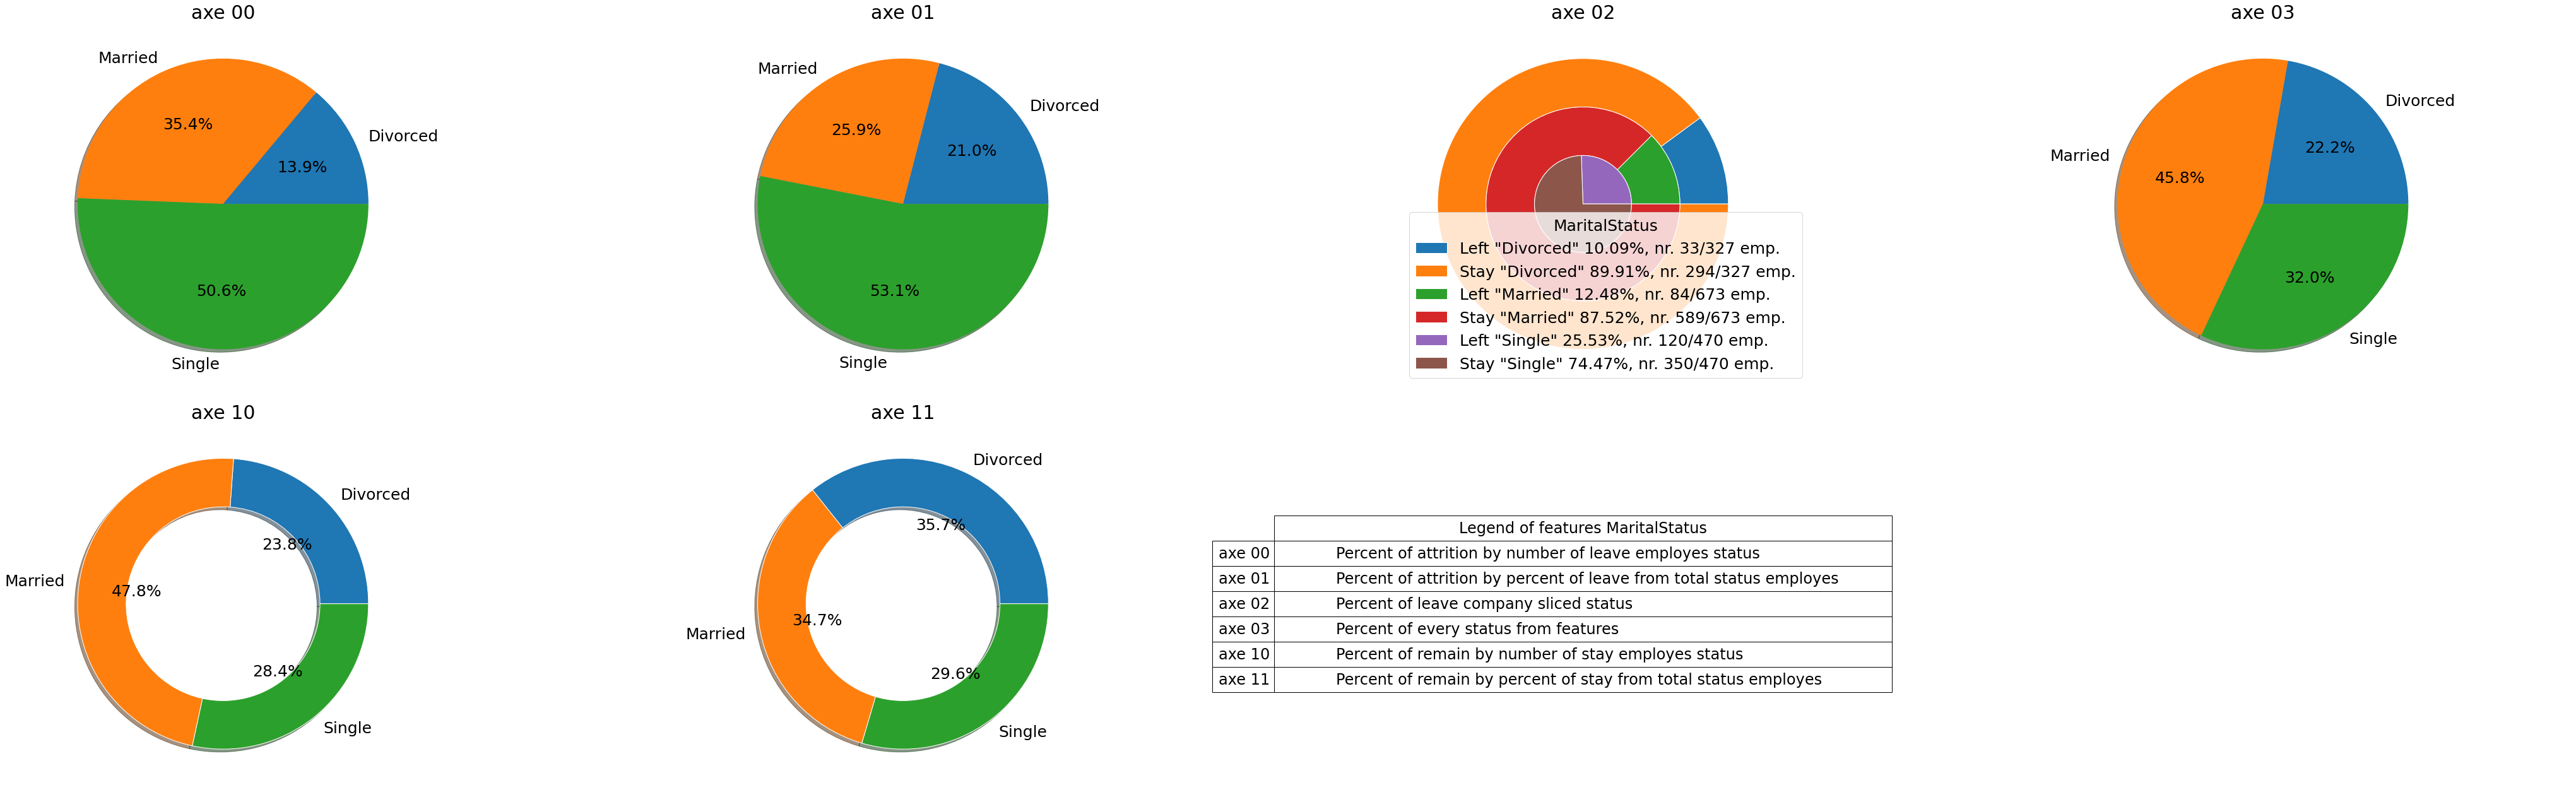

In [ ]:
printPieChartAttritionTest('MaritalStatus')

###Conclusion:

- Single employees have the biggest rate of leaving employees 50.6% by total number of leaving employees.
- Single employees have the biggest rate of leaving employees 25.53 % by percent of status, see axe 02.

##Atrition of employees by work life balance

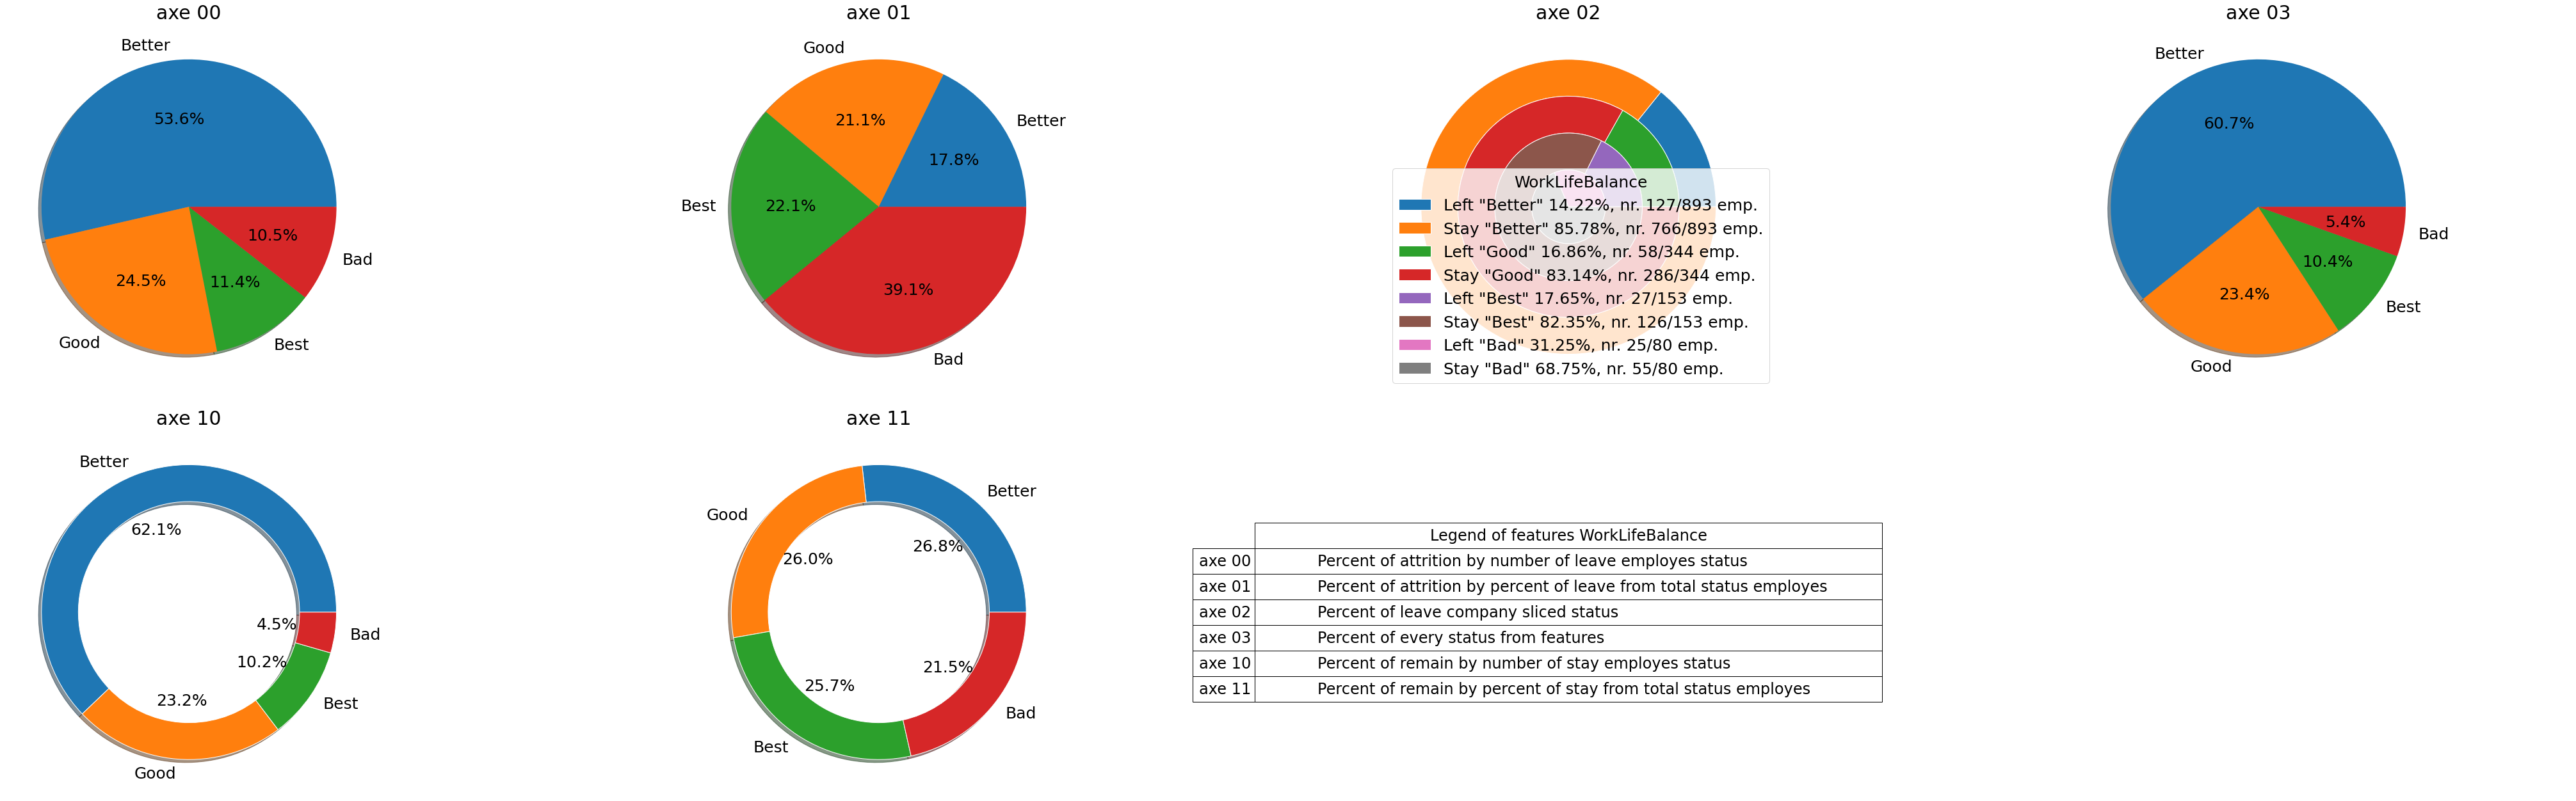

In [ ]:
printPieChartAttritionTest('WorkLifeBalance')

###Conclusion:

- The employees that have the better work life balance have the biggest rate of leaving employees 53.6% by total number of leaving employees.
- The employees that have the Bad work life balance have the biggest rate of leaving employees 31.25 % by percent of status, see axe 02.

##Conclusion:

The percent of leaving employees are 16.1 %.
- Research & Development departement have the biggest rate of leaving employees 56.1% by total number of leaving employees.
- Sales department have the biggest rate of leaving employees 20.63% by percent of status.

- Bachelor academic degree have the biggest rate of leaving employees 41.8% by total number of leaving employees.
- Bellow College academic degree have the biggest rate of leaving employees   18.24 % by percent of status.

- Life science field have the biggest rate of leaving employees 37.6% by total number of leaving employees.
- Human Resources field have the biggest rate of leaving employees 25.93 % by percent of status.

- Low satisfaction have the biggest rate of leaving employees 30.4% by total number of leaving employees.
- Low satisfaction have the biggest rate of leaving employees   25.35 % by percent of status.

- High job satisfaction have the biggest rate of leaving employees 30.8% by total number of leaving employees.
- Low satisfaction have the biggest rate of leaving employees   22.84 % by percent of status, see axe 02.

- Single employees have the biggest rate of leaving employees 50.6% by total number of leaving employees.
- Single employees have the biggest rate of leaving employees 25.53 % by percent of status, see axe 02.

- The employees that have the better work life balance have the biggest rate of leaving employees 53.6% by total number of leaving employees.
- The employees that have the Bad work life balance have the biggest rate of leaving employees 31.25 % by percent of status, see axe 02.

After analysing features: department, education, education field, environment satisfaction,
job satisfaction, marital status and work life balance we can see that the features status that
have the smal percent from all data have the biggest rate of leaving the company.

#Explore data by monthly income

In [ ]:
#Agregation by monthly income
tmp_mode = np.round(pd_df_ibm_attrition_data['MonthlyIncome'].mode().values[0], decimals=-3)
tmp_agg  = list(np.around(pd_df_ibm_attrition_data['MonthlyIncome'].agg(['max', 'min', 'std', 'mean', 'median']).values, decimals=-3).astype('int32'))
tmp_agg.append(tmp_mode)
pd_df_S_ibm_A_data = pd.DataFrame(data=[tmp_agg], columns=['max', 'min', 'std', 'mean', 'median', 'mode'])
pd_df_S_ibm_A_data

max   min   std  mean  median  mode
0  20000  1000  5000  7000    5000  2000

##Data visualisation

In [ ]:
def subplot1X2BarPieChart(bar_data, bar_columns, pie_data, pie_columns, title):
  # Make figure and axes
  fig, (ax0, ax1) = plt.subplots(1, 2)
  plt.rcParams.update({'font.size': 15})
  fig.suptitle(title, fontsize = 20) # title with fontsize 20
  # Plot the percent of attrition by number of leave employes status
  ax0.pie(bar_data, labels=bar_columns, autopct='%2.2f%%', shadow=True, startangle=0)

  ax1.bar(pie_columns, pie_data)
  ax0.set_title("Percent")
  ax1.set_title("Frequency")
  plt.show()


In [ ]:
def subplotNestePieChart(less, greath, more, title):
  # Make figure and axes
  fig, ax = plt.subplots()
  plt.rcParams.update({'font.size': 15})
  fig.suptitle(title, fontsize = 20) # title with fontsize 20
  # Plot the percent of attrition by number of leave employes status
  # calculate size of shank of the ring
  radius_pie_size = 1
  shank_size = radius_pie_size / less.index.shape[0]
  # init number of ring shank
  nbr_ring_slice = 0
  # create slice shank of the ring
  for data, column in zip(zip(less.values, greath.values, more.values), more.index):
    # calculate radius for every slice
    tmp_radius = (radius_pie_size - shank_size * nbr_ring_slice)
    # create a slice
    print(data, column)
    ax.pie(data, radius=tmp_radius, startangle=0, wedgeprops=dict(width=shank_size, edgecolor='w'), textprops=dict(color="w"), autopct='%2.2f%%', shadow=True)
    # increment number of slice
    nbr_ring_slice = nbr_ring_slice + 1

  ax.set_title("Percent")
  ax.set_title("Frequency")
  plt.show()


##Income monthly dispersion

###Income monthly dispersion row data

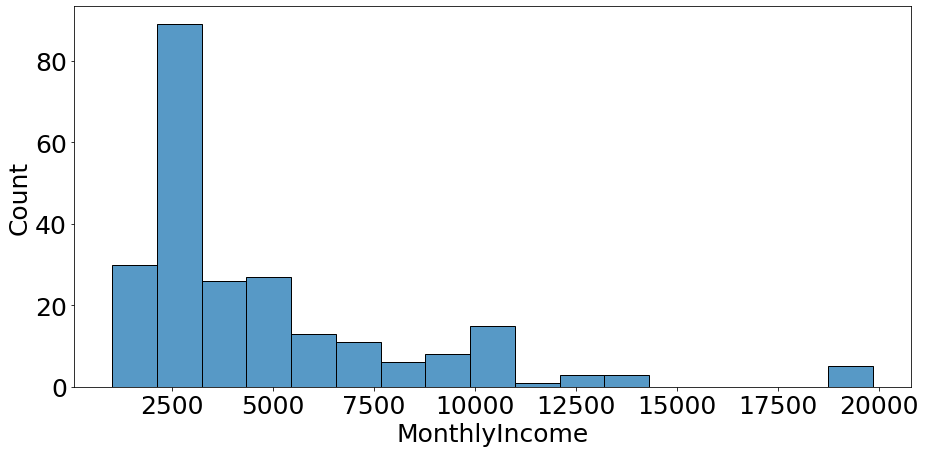

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
sns.histplot(data=pd_df_attrition_yes, x="MonthlyIncome", multiple="dodge")

###Income monthly dispersion round data only leave employees

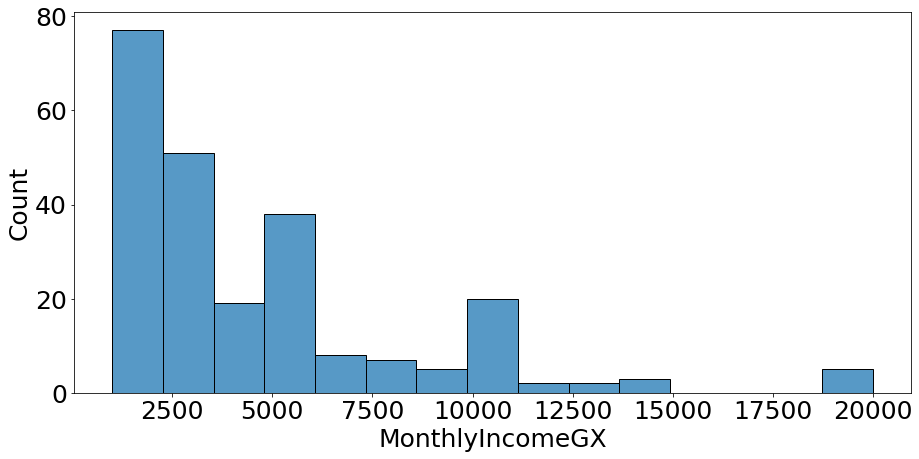

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
sns.histplot(data=pd_df_attrition_yes, x="MonthlyIncomeGX", multiple="dodge")

###Income monthly dispersion round data

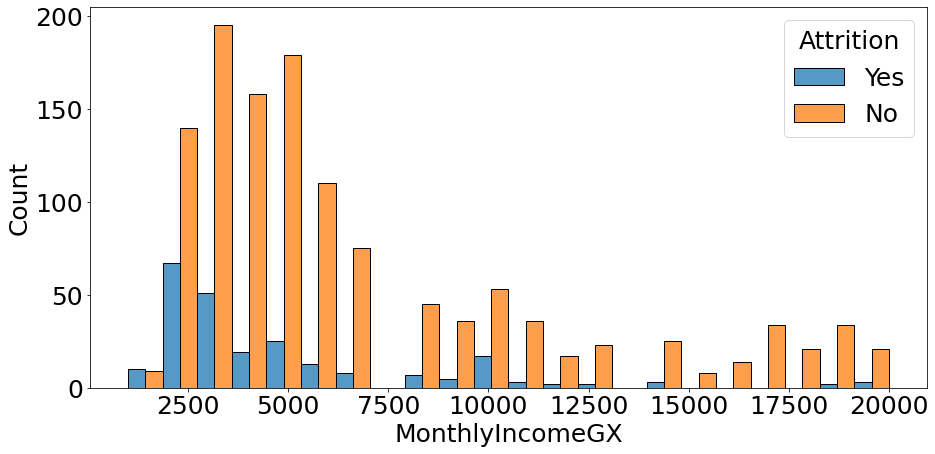

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
sns.histplot(data=pd_df_ibm_attrition_data, x="MonthlyIncomeGX", hue="Attrition", multiple="dodge")

###Conclusion:
The monthly income distribution is positively skewed. Most employees has the salary up to 7500.
The leaving rate is biggest up to 3000.

##Monthly income frequency by Education

###Monthly income frequency by Education from all data

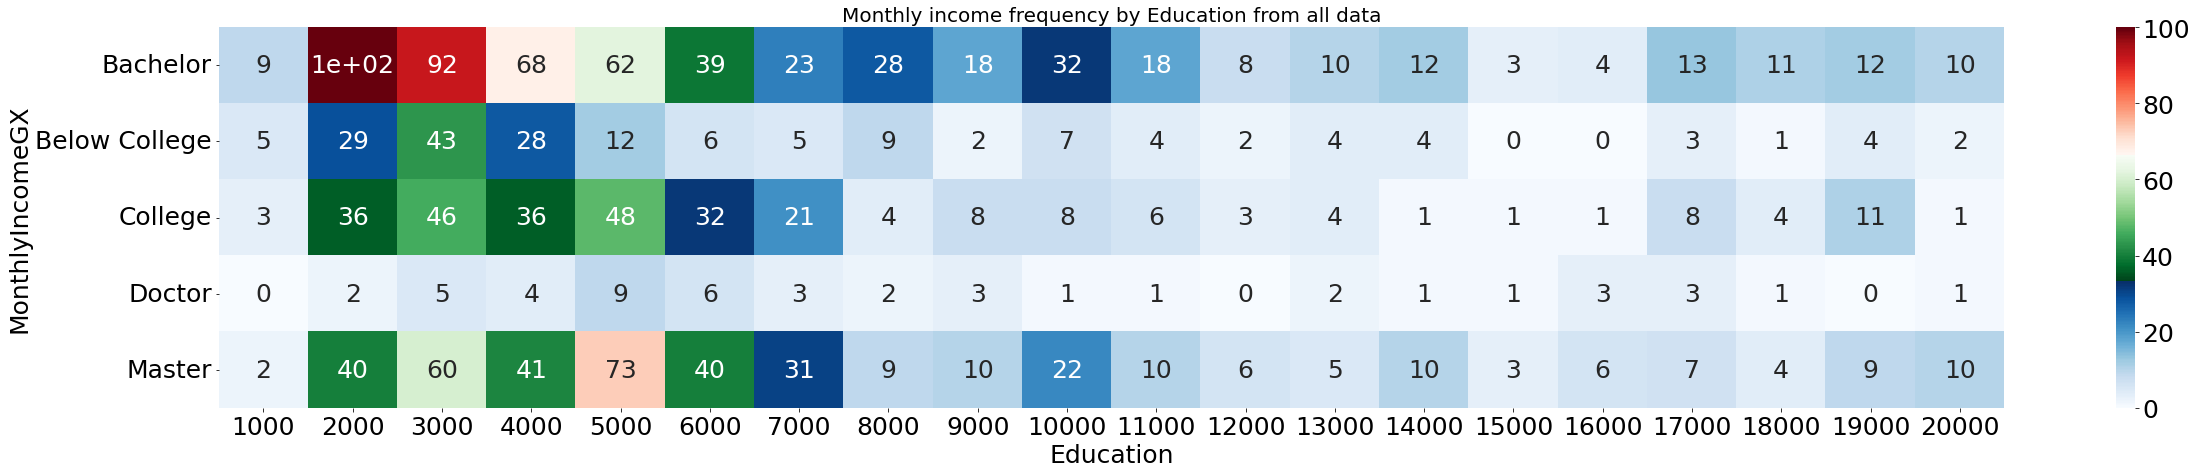

In [ ]:
pd_df_count_pivot_MI_E_total = pd_df_frequencyFeaturePivot_2x(pd_df_ibm_attrition_data, "MonthlyIncomeGX", "Education")
heatmap_RGB_2D(pd_df_count_pivot_MI_E_total, 'Monthly income frequency by Education from all data')

###Monthly income frequency by Education from leaving data

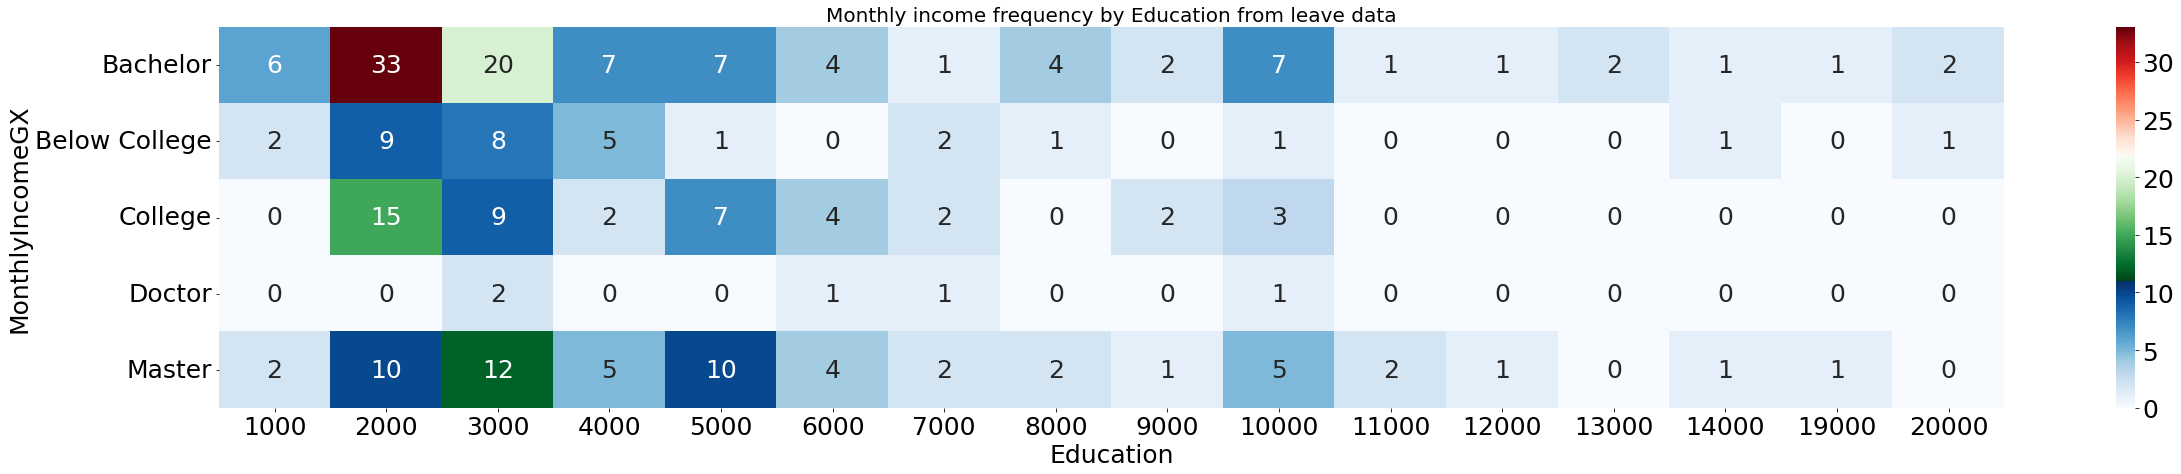

In [ ]:
pd_df_count_pivot_MI_E_leave = pd_df_frequencyFeaturePivot_2x(pd_df_attrition_yes, "MonthlyIncomeGX", "Education")
heatmap_RGB_2D(pd_df_count_pivot_MI_E_leave, 'Monthly income frequency by Education from leave data')

###Monthly income percent by Education from leaving data

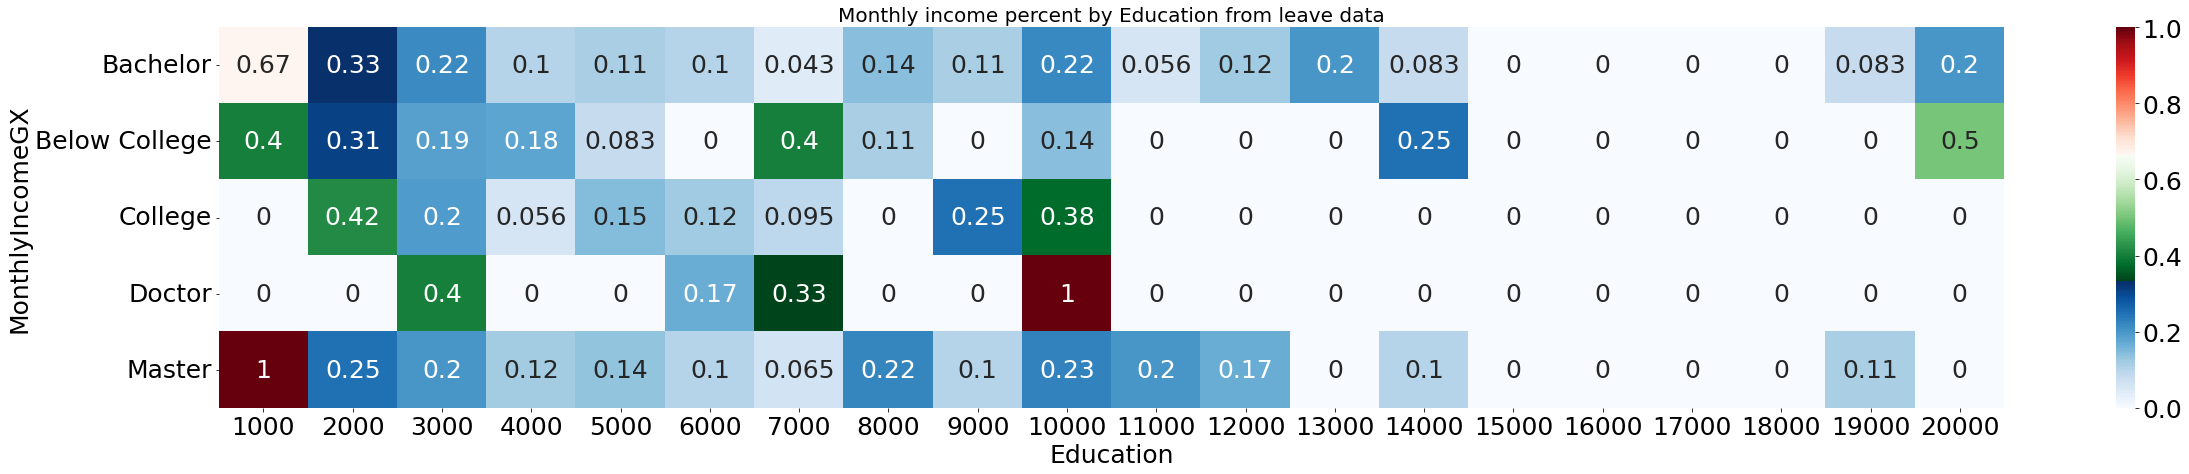

In [ ]:
heatmap_RGB_2D((pd_df_count_pivot_MI_E_leave / pd_df_count_pivot_MI_E_total).fillna(0), 'Monthly income percent by Education from leave data')

####Analise employee that earn 20 000 per month and leave the company

In [ ]:
np_arr_leav = np.array(pd_df_ibm_attrition_data["Attrition"] == 'Yes')
np_arr_MI_e_20000 = np.array(pd_df_ibm_attrition_data["MonthlyIncomeGX"] == 20000)
pd_df_MI_e_20000 = pd_df_ibm_attrition_data.iloc[np_arr_leav & np_arr_MI_e_20000]
pd_df_MI_e_20000

Age Attrition  ... MonthlyIncomeGX  MaritalStatusBin
45    41       Yes  ...           20000           Married
568   55       Yes  ...           20000           Married
749   52       Yes  ...           20000           Married

[3 rows x 15 columns]

####Analise employee that earn less than 4000 per month and leave the company

In [ ]:
np_arr_leav = np.array(pd_df_ibm_attrition_data["Attrition"] == 'Yes')
np_arr_MI_lg_3000 = np.array(pd_df_ibm_attrition_data["MonthlyIncomeGX"] <= 3000)
pd_df_MI_lg_3000 = pd_df_ibm_attrition_data.iloc[np_arr_leav & np_arr_MI_lg_3000]
pd_df_MI_lg_3000.head()

Age Attrition  ... MonthlyIncomeGX  MaritalStatusBin
2    37       Yes  ...            2000         Unmarried
14   28       Yes  ...            2000         Unmarried
21   36       Yes  ...            3000         Unmarried
24   34       Yes  ...            3000         Unmarried
33   39       Yes  ...            2000           Married

[5 rows x 15 columns]

#####Distribution by JobSatisfaction of employee that earn less than 4000 per month and leave the company

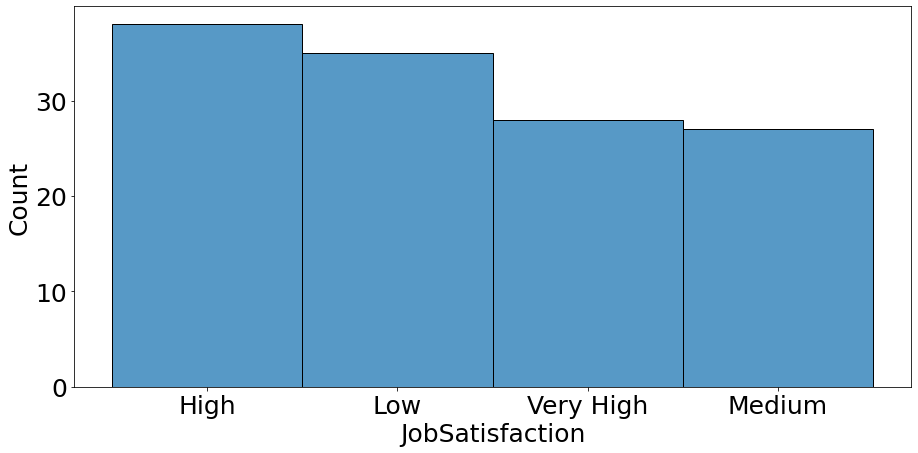

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
width, height = 15, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.histplot(data=pd_df_MI_lg_3000, x="JobSatisfaction", multiple="dodge")

#####Distribution by MaritalStatus of employee that earn less than 4000 per month and leave the company

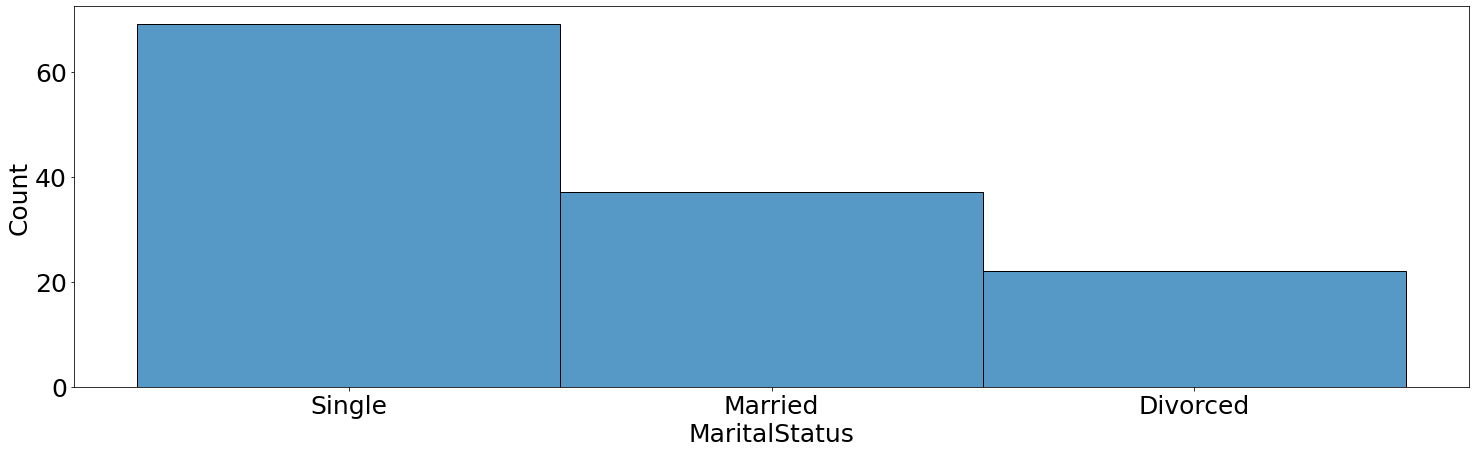

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
width, height = 25, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.histplot(data=pd_df_MI_lg_3000, x="MaritalStatus", multiple="dodge")

#####Distribution by EducationField of employee that earn less than 4000 per month and leave the company

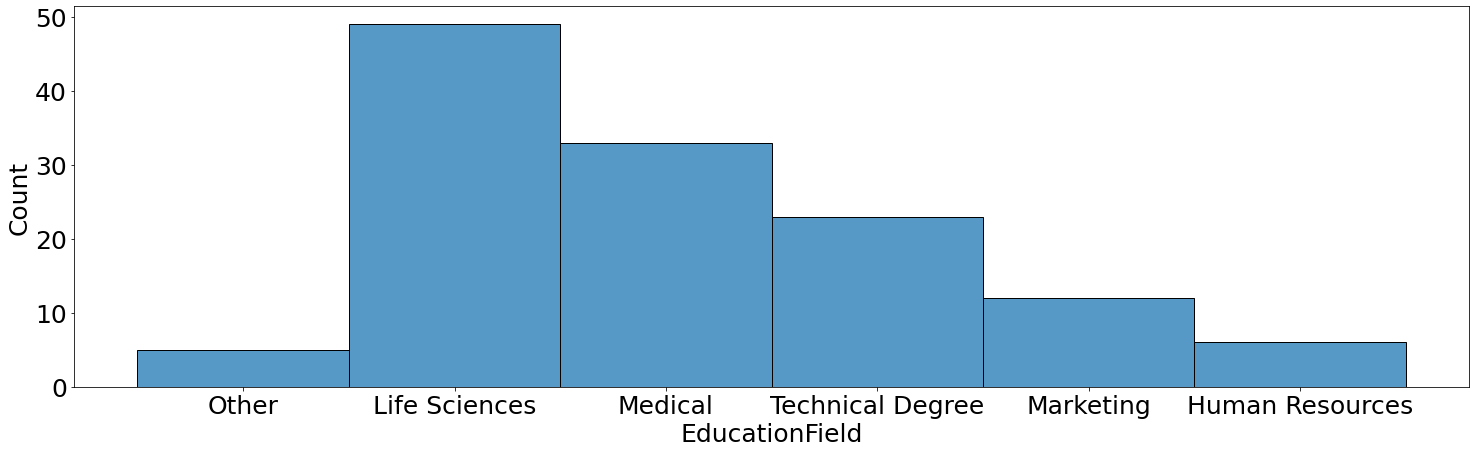

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
width, height = 25, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.histplot(data=pd_df_MI_lg_3000, x="EducationField", multiple="dodge")

#####Distribution by WorkLifeBalance of employee that earn less than 4000 per month and leave the company

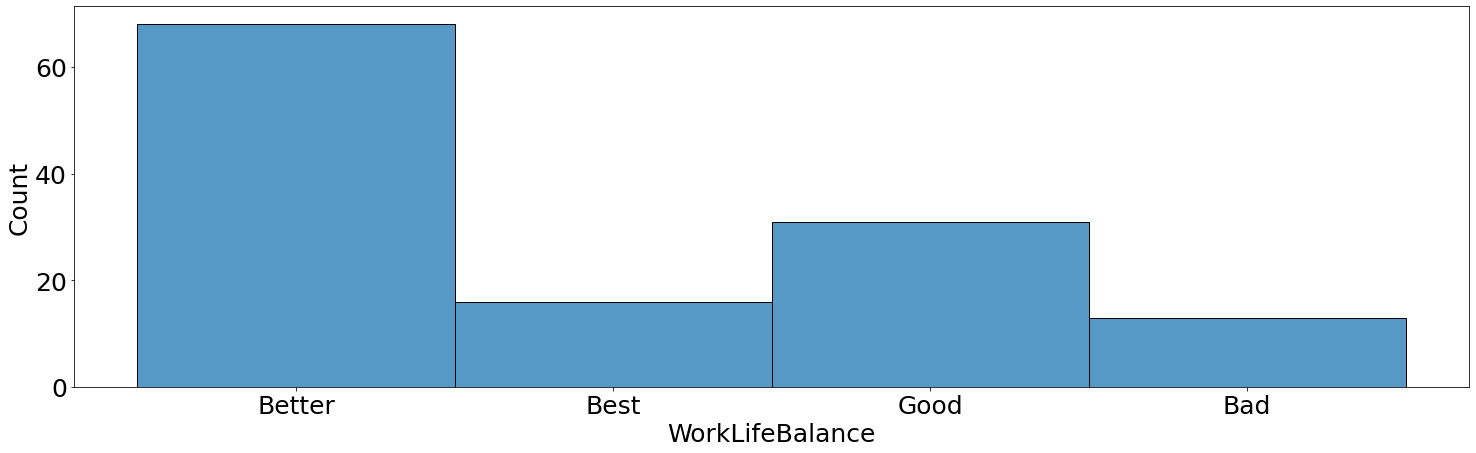

In [ ]:
#When using a hue semantic with discrete data, it can make sense to “dodge” the levels:
width, height = 25, 7
plt.rcParams['figure.figsize'] = [width, height]
sns.histplot(data=pd_df_MI_lg_3000, x="WorkLifeBalance", multiple="dodge")

###Conclusion:
- After analysing the heatmap "Monthly income frequency by Education from all data", we can see that the company has more employee with Bachelor and Master academmic degree.
- The bigest rate of leaving company is for salary up to 4000.
- The employee that leave the company and earn 19 000 - 20 000 have more that 20 years at company or worked for 5 company or job satisfaction is low.
- The employee that leave the company and earn less that 4000, more employees have high job satisfaction, better work life balance and are unmarried.


##Monthly income frequency by Education field

###Monthly income frequency by Education field from all data

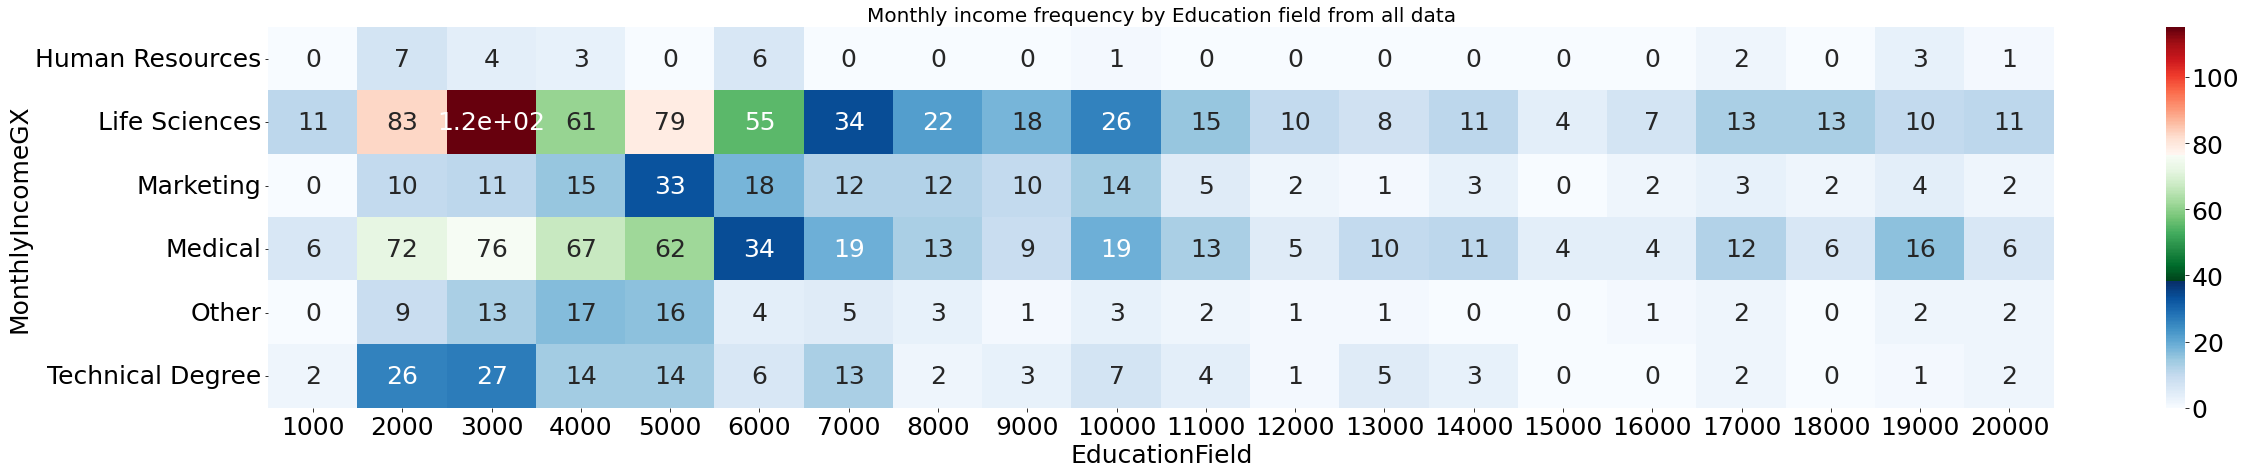

In [ ]:
pd_df_count_pivot_MI_EF_total = pd_df_frequencyFeaturePivot_2x(pd_df_ibm_attrition_data, "MonthlyIncomeGX", "EducationField")
heatmap_RGB_2D(pd_df_count_pivot_MI_EF_total, 'Monthly income frequency by Education field from all data')

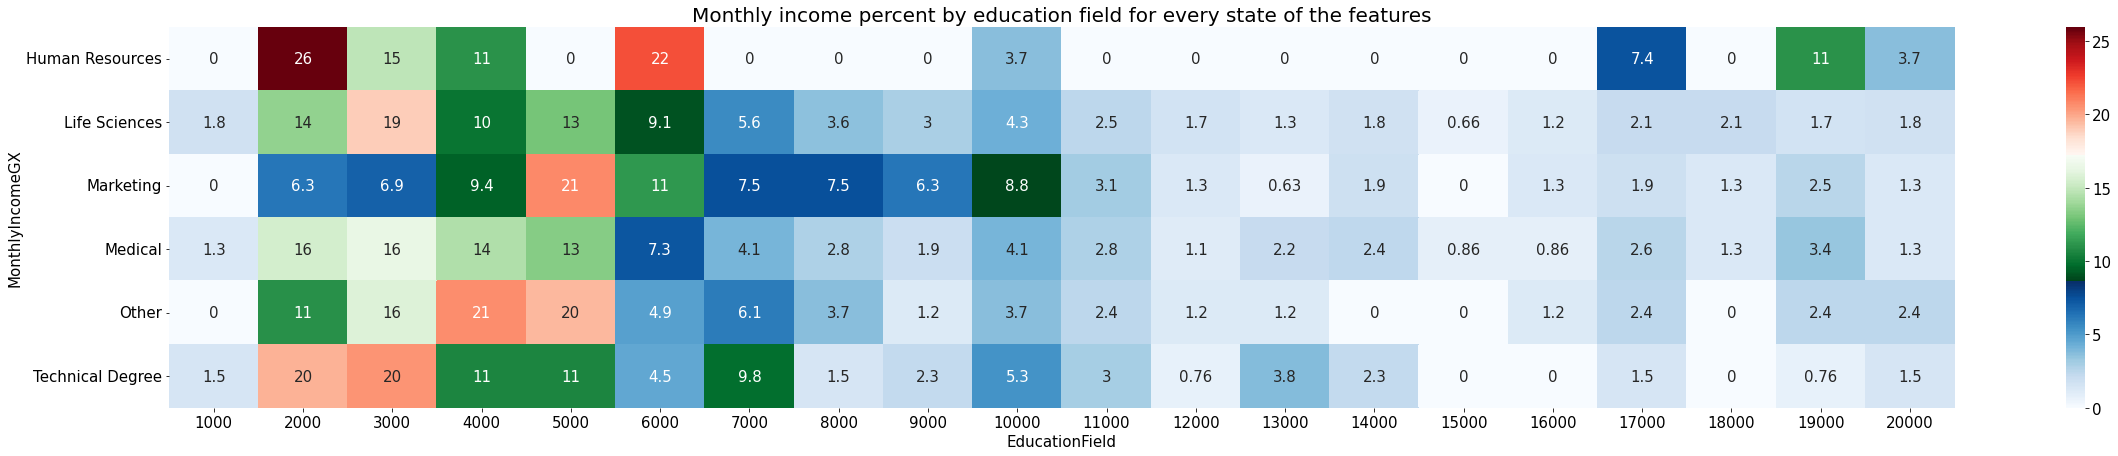

In [ ]:
heatmap_RGB_2D((pd_df_count_pivot_MI_EF_total.T / pd_df_count_pivot_MI_EF_total.T.sum() * 100).T, 'Monthly income percent by education field for every state of the features')

In [ ]:
pd_df_count_pivot_MI_EF_total.T.std()

MonthlyIncomeGX
Human Resources      2.158825
Life Sciences       31.316886
Marketing            8.127115
Medical             24.720756
Other                5.320269
Technical Degree     8.133103
dtype: float64

In [ ]:
pd_df_count_pivot_MI_EF_total.std()

EducationField
1000      4.490731
2000     34.168699
3000     44.609416
4000     27.230498
5000     30.626786
6000     20.354361
7000     11.889772
8000      8.477421
9000      6.853223
10000     9.750214
11000     6.090977
12000     3.763863
13000     4.167333
14000     5.085928
15000     2.065591
16000     2.732520
17000     5.316641
18000     5.205766
19000     5.830952
20000     3.847077
dtype: float64

###Monthly income frequency by Education field from leave data

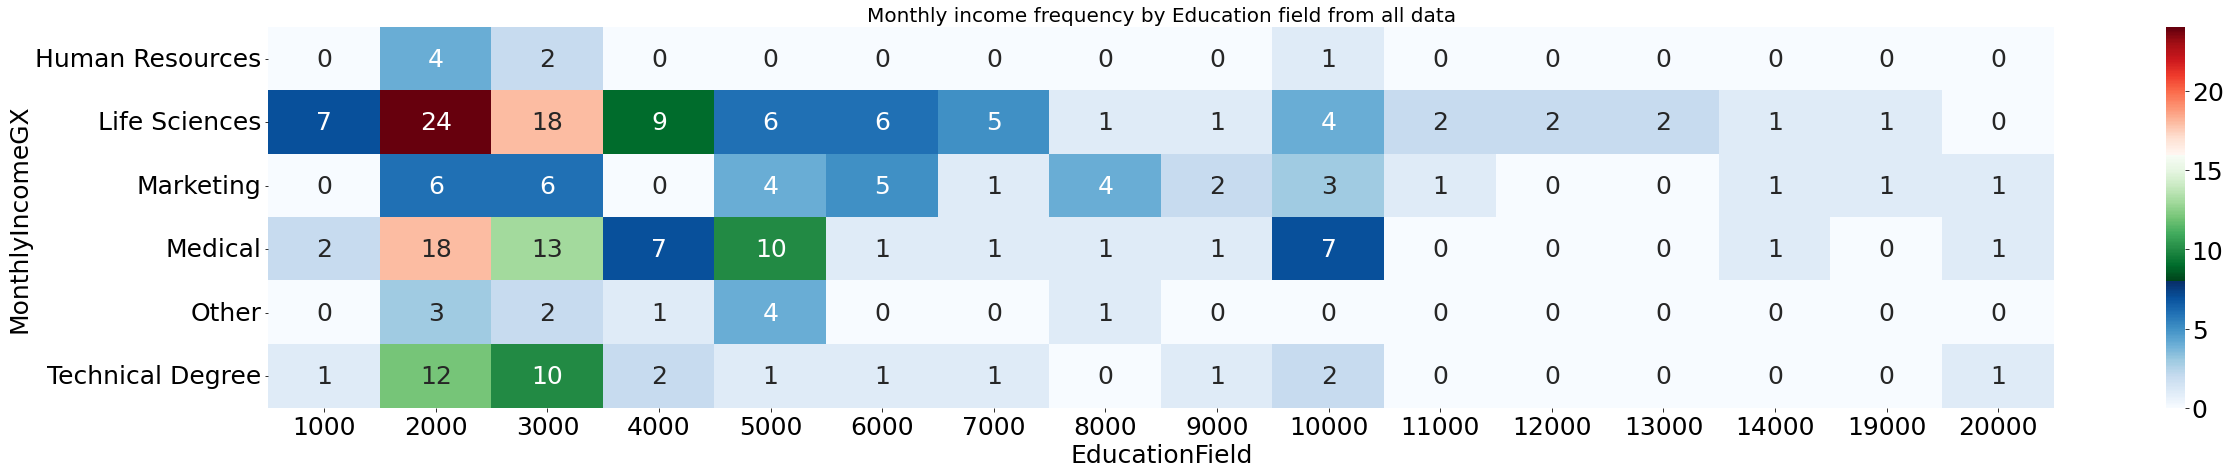

In [ ]:
pd_df_count_pivot_MI_EF_leave = pd_df_frequencyFeaturePivot_2x(pd_df_attrition_yes, "MonthlyIncomeGX", "EducationField")
heatmap_RGB_2D(pd_df_count_pivot_MI_EF_leave, 'Monthly income frequency by Education field from all data')

###Monthly income percent by Education field from leave data

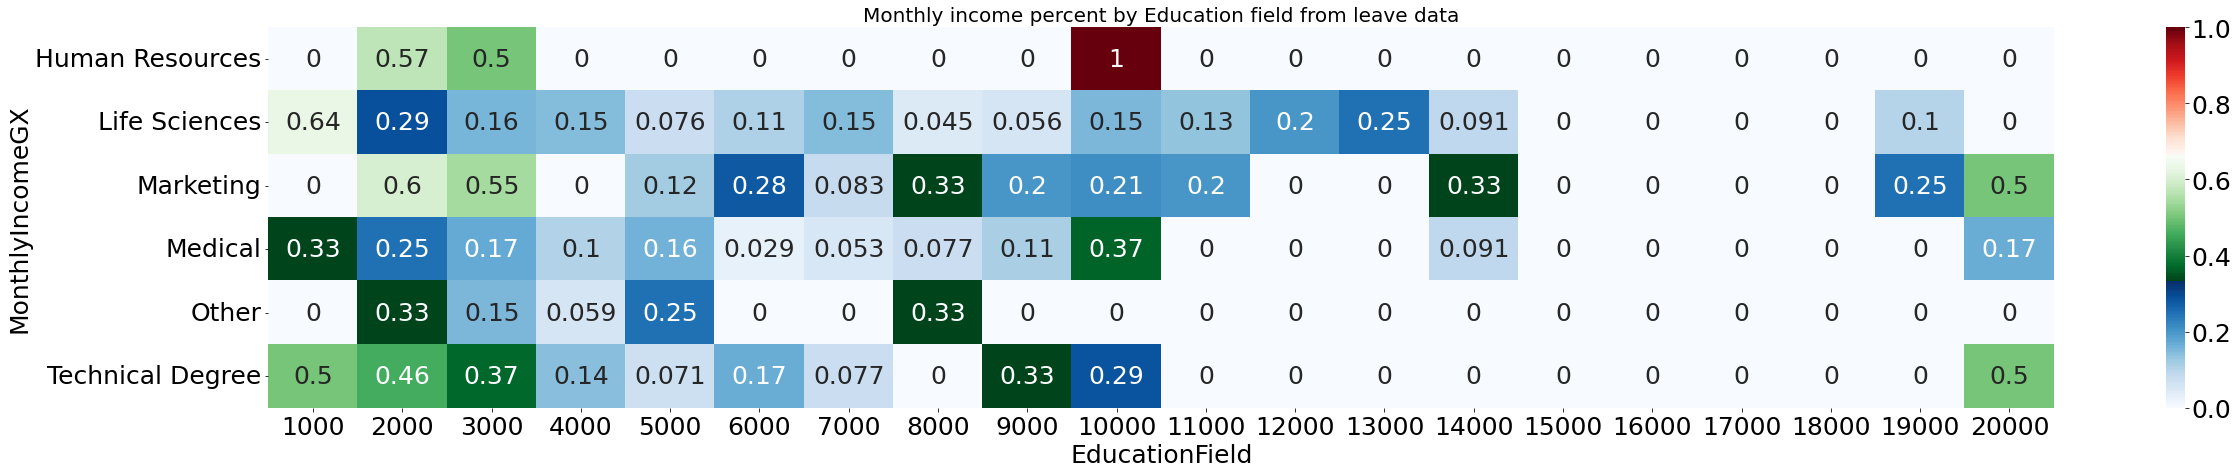

In [ ]:
heatmap_RGB_2D((pd_df_count_pivot_MI_EF_leave / pd_df_count_pivot_MI_EF_total).fillna(0), 'Monthly income percent by Education field from leave data')

###Conclusion:
- Proportion of salary by education field are the same.
- By monthly income standard deviation(std) for salary 3000 is the greath 44.61 and for salary 15000 is the smal.

##Monthly income frequency by Marital Status

###Monthly income frequency by marital status from all data

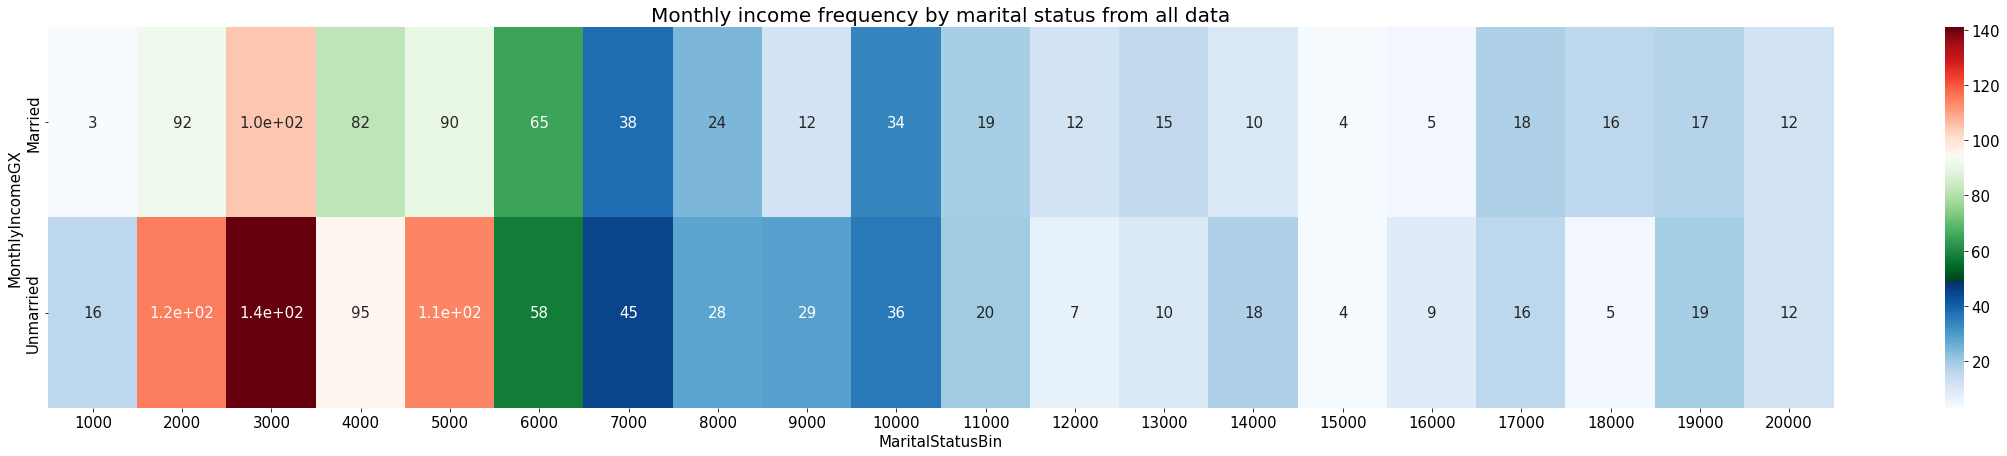

In [ ]:
pd_df_count_pivot_MI_MS_total = pd_df_frequencyFeaturePivot_2x(pd_df_ibm_attrition_data, "MonthlyIncomeGX", "MaritalStatusBin")
heatmap_RGB_2D(pd_df_count_pivot_MI_MS_total, 'Monthly income frequency by marital status from all data')

####Analyse monthly income by marital status median earn

In [ ]:

np_arr_MI_g_median = np.array(pd_df_ibm_attrition_data["MonthlyIncomeGX"] > 5000)
np_arr_MI_l_median = np.array(pd_df_ibm_attrition_data["MonthlyIncomeGX"] <= 5000)

np_arr_MS_un = np.array(pd_df_ibm_attrition_data["MaritalStatusBin"] == 'Unmarried')

nbr_MS_un_MI_g_median = pd_df_ibm_attrition_data.iloc[np_arr_MS_un & np_arr_MI_g_median].shape[0]
nbr_MS_un_MI_l_median = pd_df_ibm_attrition_data.iloc[np_arr_MS_un & np_arr_MI_l_median].shape[0]

print('Number {} of unmarried employee, who earn more that median'.format(nbr_MS_un_MI_g_median))
print('Number {} of unmarried employee, who earn less that median'.format(nbr_MS_un_MI_l_median))

print('Percent {:.2f}% of group unmarried employee, who earn more that median'.format(nbr_MS_un_MI_g_median / np_arr_MS_un.sum() * 100.))
print('Percent {:.2f}% of group unmarried employee, who earn less that median'.format(nbr_MS_un_MI_l_median / np_arr_MS_un.sum() * 100.))

np_arr_MS_m = np.array(pd_df_ibm_attrition_data["MaritalStatusBin"] == 'Married')

nbr_MS_m_MI_g_median = pd_df_ibm_attrition_data.iloc[np_arr_MS_m & np_arr_MI_g_median].shape[0]
nbr_MS_m_MI_l_median = pd_df_ibm_attrition_data.iloc[np_arr_MS_m & np_arr_MI_l_median].shape[0]

print('Number {} of married employee, who earn more that median'.format(nbr_MS_m_MI_g_median))
print('Number {} of married employee, who earn less that median'.format(nbr_MS_m_MI_l_median))

print('Percent {:.2f}% of group married employee, who earn more that median'.format(nbr_MS_m_MI_g_median / np_arr_MS_m.sum() * 100.))
print('Percent {:.2f}% of group married employee, who earn less that median'.format(nbr_MS_m_MI_l_median / np_arr_MS_m.sum() * 100.))

Number 316 of unmarried employee, who earn more that median
Number 481 of unmarried employee, who earn less that median
Percent 39.65% of group unmarried employee, who earn more that median
Percent 60.35% of group unmarried employee, who earn less that median
Number 301 of married employee, who earn more that median
Number 372 of married employee, who earn less that median
Percent 44.73% of group married employee, who earn more that median
Percent 55.27% of group married employee, who earn less that median


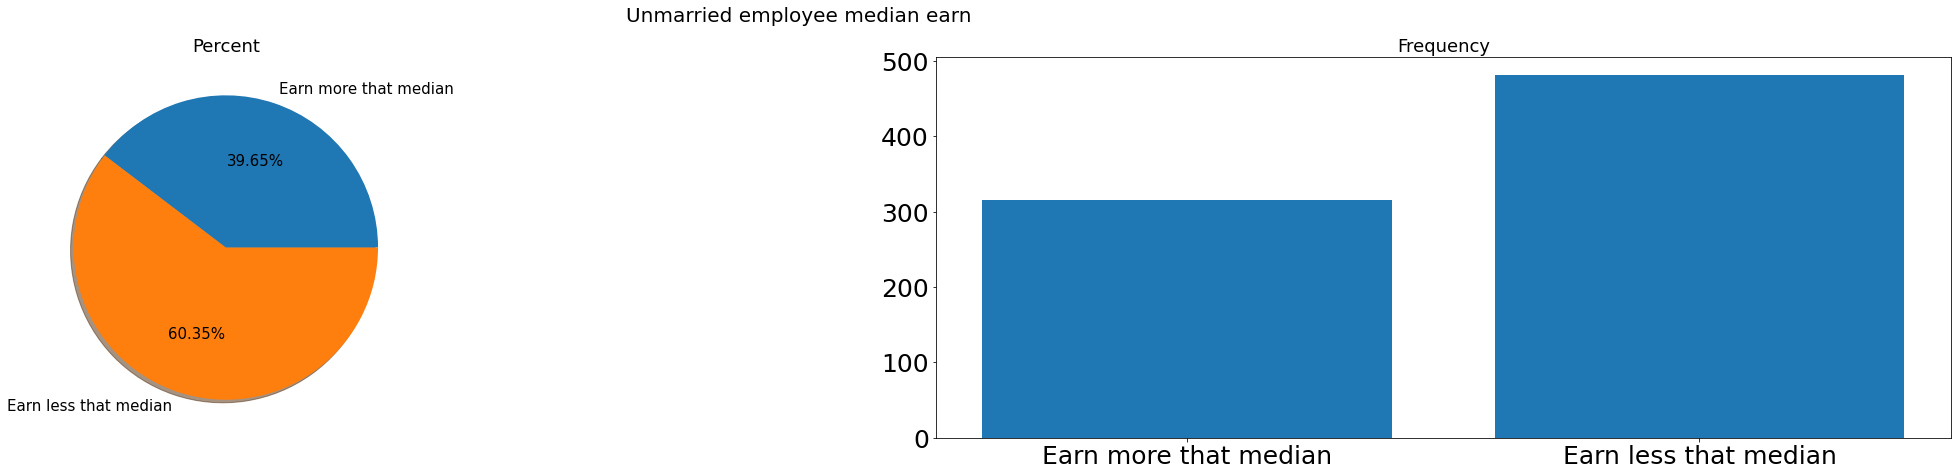

In [ ]:
subplot1X2BarPieChart([nbr_MS_un_MI_g_median, nbr_MS_un_MI_l_median],
                      ['Earn more that median', 'Earn less that median'],
                      [nbr_MS_un_MI_g_median, nbr_MS_un_MI_l_median],
                      ['Earn more that median', 'Earn less that median'],
                      'Unmarried employee median earn')

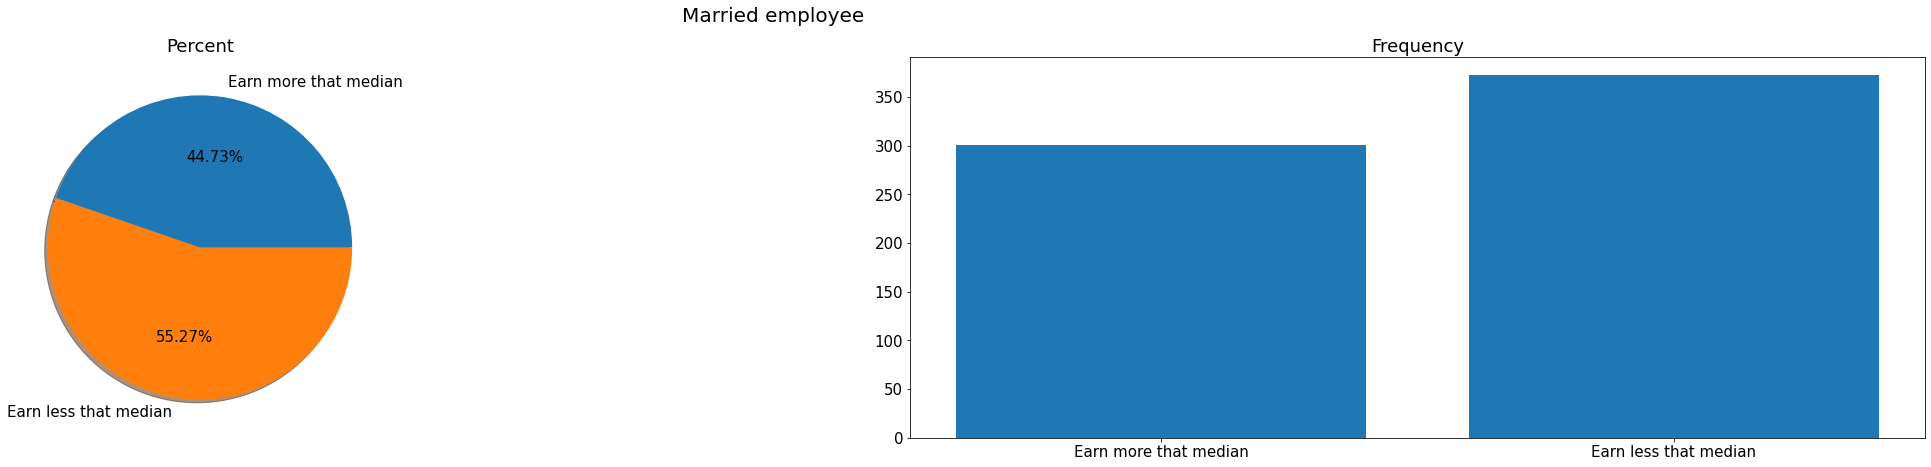

In [ ]:
subplot1X2BarPieChart([nbr_MS_m_MI_g_median, nbr_MS_m_MI_l_median],
                      ['Earn more that median', 'Earn less that median'],
                      [nbr_MS_m_MI_g_median, nbr_MS_m_MI_l_median],
                      ['Earn more that median', 'Earn less that median'],
                      'Married employee')

###Monthly income frequency by marital status from leave data

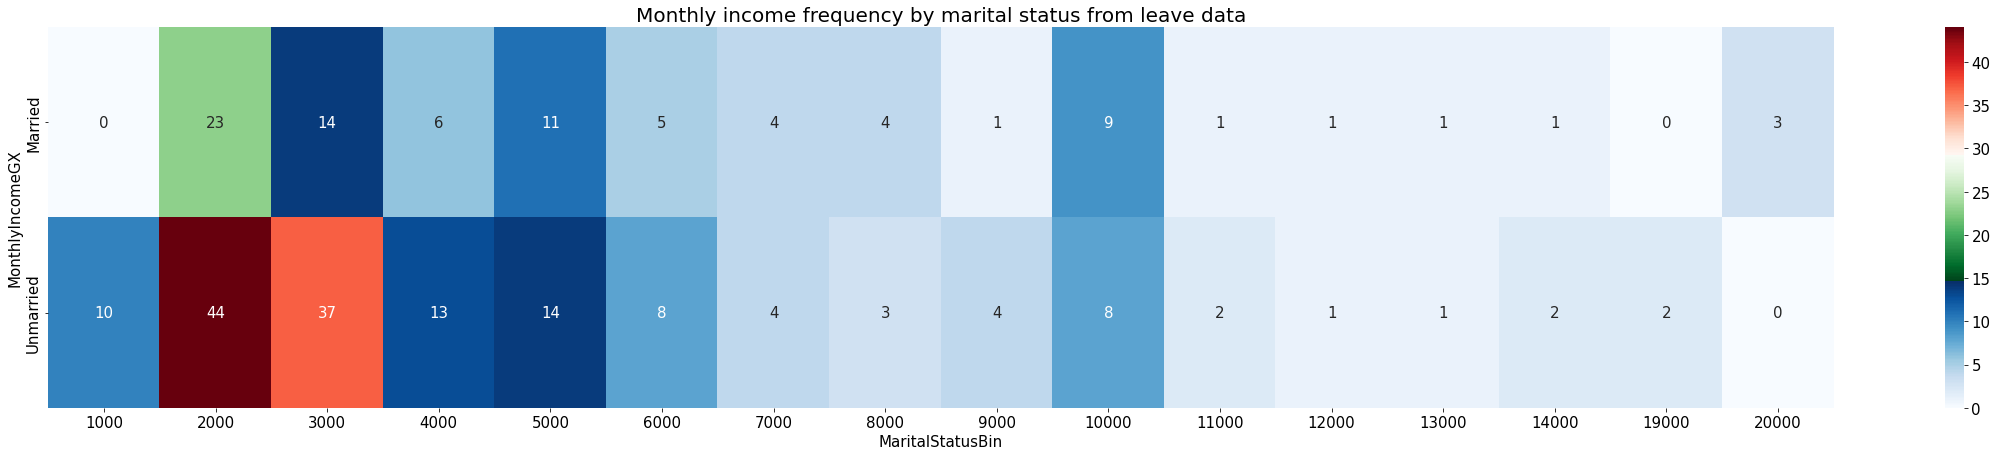

In [ ]:
pd_df_count_pivot_MI_MS_leave = pd_df_frequencyFeaturePivot_2x(pd_df_attrition_yes, "MonthlyIncomeGX", "MaritalStatusBin")
heatmap_RGB_2D(pd_df_count_pivot_MI_MS_leave, 'Monthly income frequency by marital status from leave data')

####Analyse monthly income by marital status median earn leave data

In [ ]:

np_arr_MI_g_median = np.array(pd_df_ibm_attrition_data["MonthlyIncomeGX"] > 5000)
np_arr_MI_l_median = np.array(pd_df_ibm_attrition_data["MonthlyIncomeGX"] <= 5000)
np_arr_A_y = np.array(pd_df_ibm_attrition_data["Attrition"] == 'Yes')

np_arr_MS_un = np.array(pd_df_ibm_attrition_data["MaritalStatusBin"] == 'Unmarried')

nbr_MS_un_MI_g_median_leave = (np_arr_MS_un & np_arr_MI_g_median & np_arr_A_y).sum()
nbr_MS_un_MI_l_median_leave = (np_arr_MS_un & np_arr_MI_l_median & np_arr_A_y).sum()
nbr_MS_un_leave = (np_arr_MS_un & np_arr_A_y).sum()

print('Number {} of unmarried employee, who earn more that median leave the company'.format(nbr_MS_un_MI_g_median_leave))
print('Number {} of unmarried employee, who earn less that median leave the company'.format(nbr_MS_un_MI_l_median_leave))

print('Percent {:.2f}% of group unmarried employee, who earn more that median leave the company'.format(nbr_MS_un_MI_g_median_leave / nbr_MS_un_leave * 100.))
print('Percent {:.2f}% of group unmarried employee, who earn less that median leave the company'.format(nbr_MS_un_MI_l_median_leave / nbr_MS_un_leave * 100.))

np_arr_MS_m = np.array(pd_df_ibm_attrition_data["MaritalStatusBin"] == 'Married')

nbr_MS_m_MI_g_median_leave = (np_arr_MS_m & np_arr_MI_g_median & np_arr_A_y).sum()
nbr_MS_m_MI_l_median_leave = (np_arr_MS_m & np_arr_MI_l_median & np_arr_A_y).sum()
nbr_MS_m_leave = (np_arr_MS_m & np_arr_A_y).sum()

print('Number {} of married employee, who earn more that median leave the company'.format(nbr_MS_m_MI_g_median_leave))
print('Number {} of married employee, who earn less that median leave the company'.format(nbr_MS_m_MI_l_median_leave))

print('Percent {:.2f}% of group married employee, who earn more that median leave the company'.format(nbr_MS_m_MI_g_median_leave / nbr_MS_m_leave * 100.))
print('Percent {:.2f}% of group married employee, who earn less that median leave the company'.format(nbr_MS_m_MI_l_median_leave / nbr_MS_m_leave * 100.))

Number 35 of unmarried employee, who earn more that median leave the company
Number 118 of unmarried employee, who earn less that median leave the company
Percent 22.88% of group unmarried employee, who earn more that median leave the company
Percent 77.12% of group unmarried employee, who earn less that median leave the company
Number 30 of married employee, who earn more that median leave the company
Number 54 of married employee, who earn less that median leave the company
Percent 35.71% of group married employee, who earn more that median leave the company
Percent 64.29% of group married employee, who earn less that median leave the company


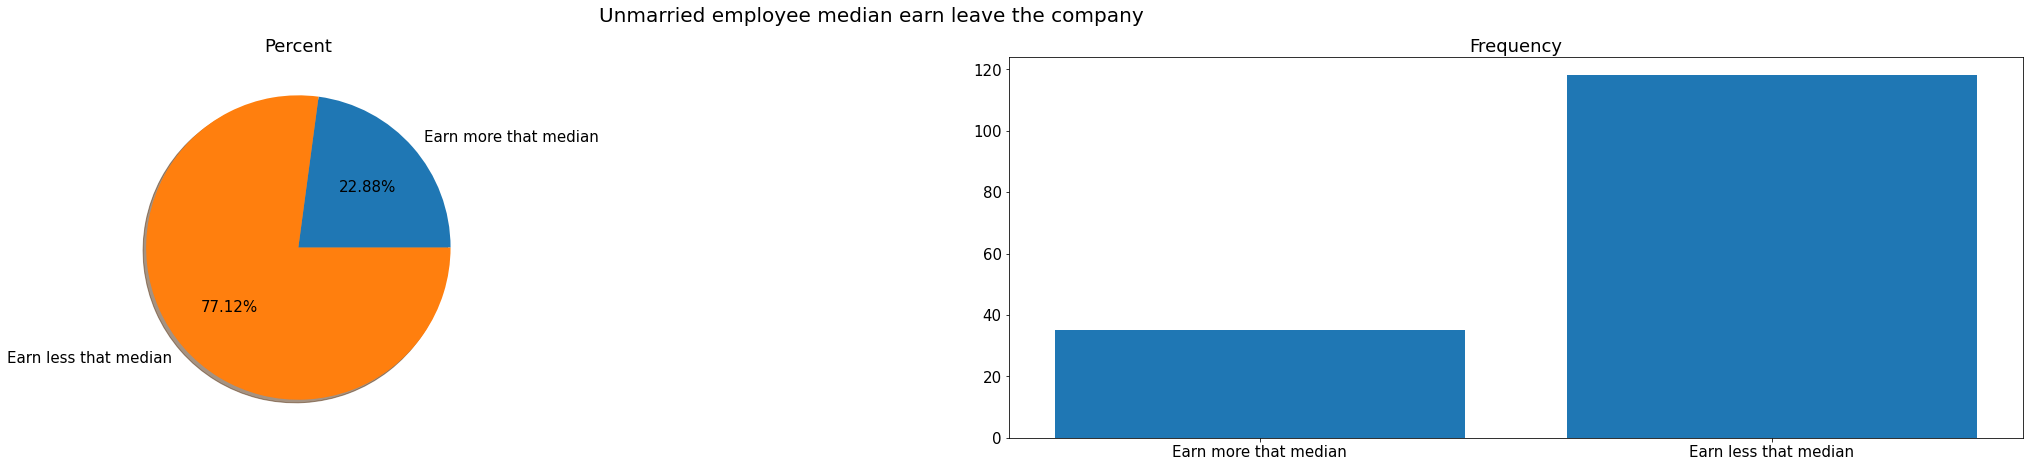

In [ ]:
subplot1X2BarPieChart([nbr_MS_un_MI_g_median_leave, nbr_MS_un_MI_l_median_leave],
                      ['Earn more that median', 'Earn less that median'],
                      [nbr_MS_un_MI_g_median_leave, nbr_MS_un_MI_l_median_leave],
                      ['Earn more that median', 'Earn less that median'],
                      'Unmarried employee median earn leave the company')

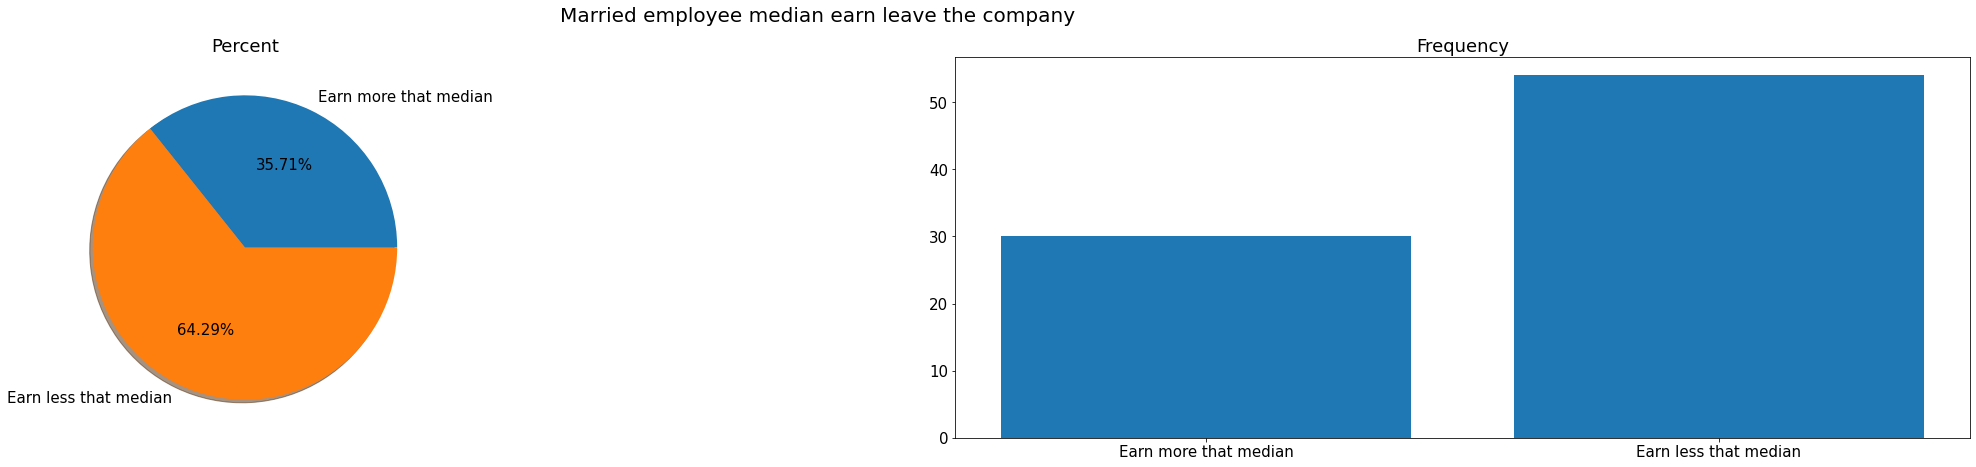

In [ ]:
subplot1X2BarPieChart([nbr_MS_m_MI_g_median_leave, nbr_MS_m_MI_l_median_leave],
                      ['Earn more that median', 'Earn less that median'],
                      [nbr_MS_m_MI_g_median_leave, nbr_MS_m_MI_l_median_leave],
                      ['Earn more that median', 'Earn less that median'],
                      'Married employee median earn leave the company')

###Monthly income percent by marital status from leave data

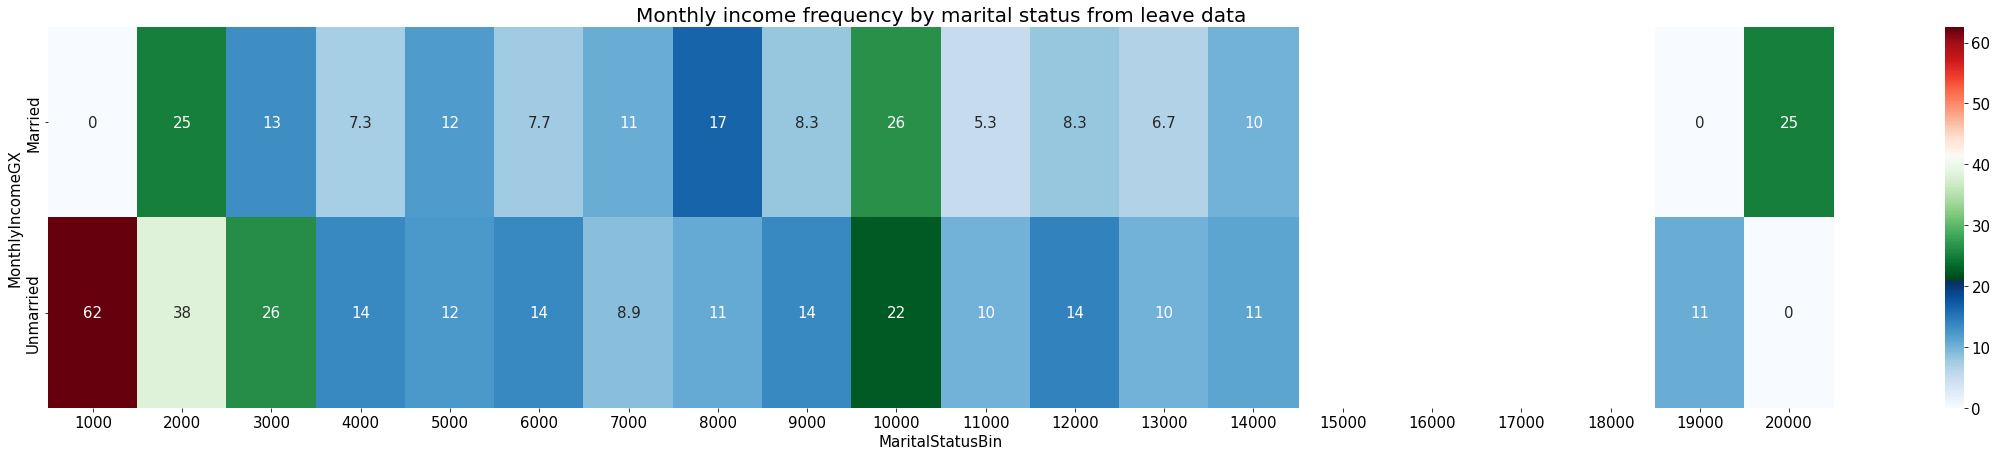

In [ ]:
heatmap_RGB_2D(pd_df_count_pivot_MI_MS_leave / pd_df_count_pivot_MI_MS_total * 100, 'Monthly income frequency by marital status from leave data')

###Conclusion:
- By marital status more unmaried employees leave the company and more unmarried employees earn less that meadian salary.

##Monthly income frequency by WorkLifeBalance

###Monthly income frequency by WorkLifeBalance from all data

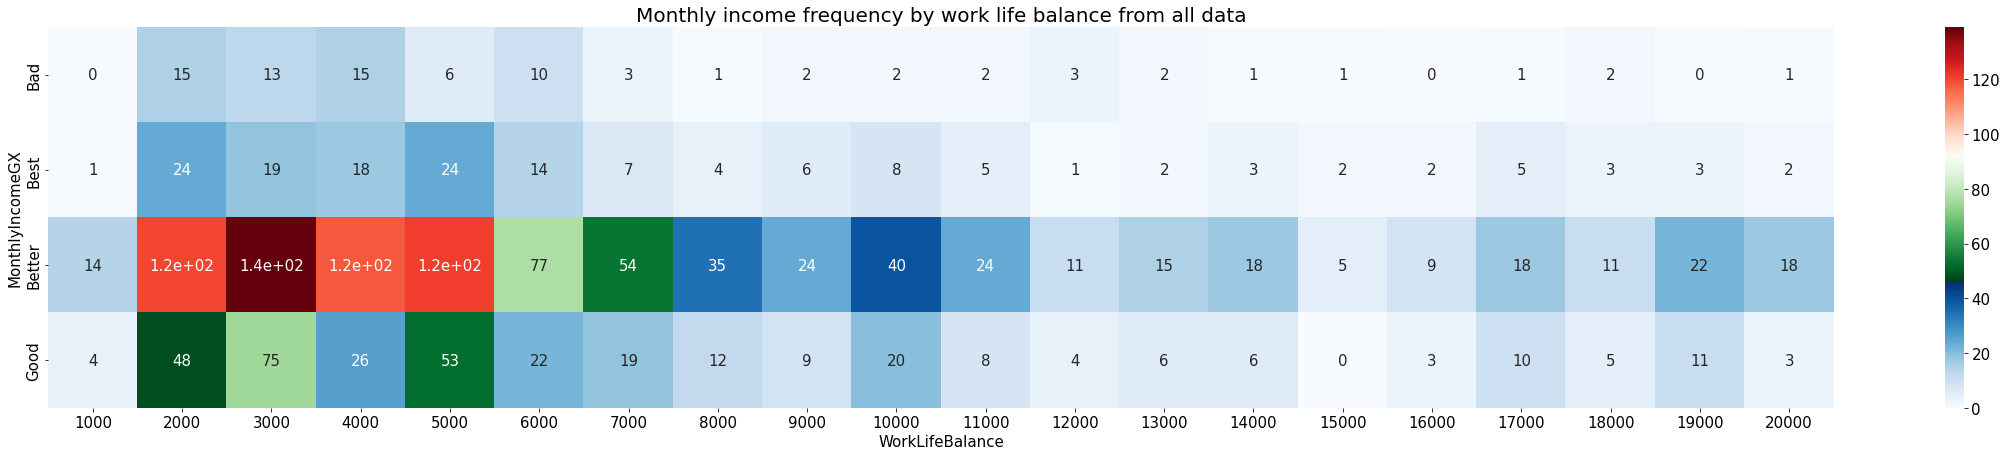

In [ ]:
pd_df_count_pivot_MI_WLB_total = pd_df_frequencyFeaturePivot_2x(pd_df_ibm_attrition_data, "MonthlyIncomeGX", "WorkLifeBalance")
heatmap_RGB_2D(pd_df_count_pivot_MI_WLB_total, 'Monthly income frequency by work life balance from all data')

###Monthly income frequency by WorkLifeBalance from leave

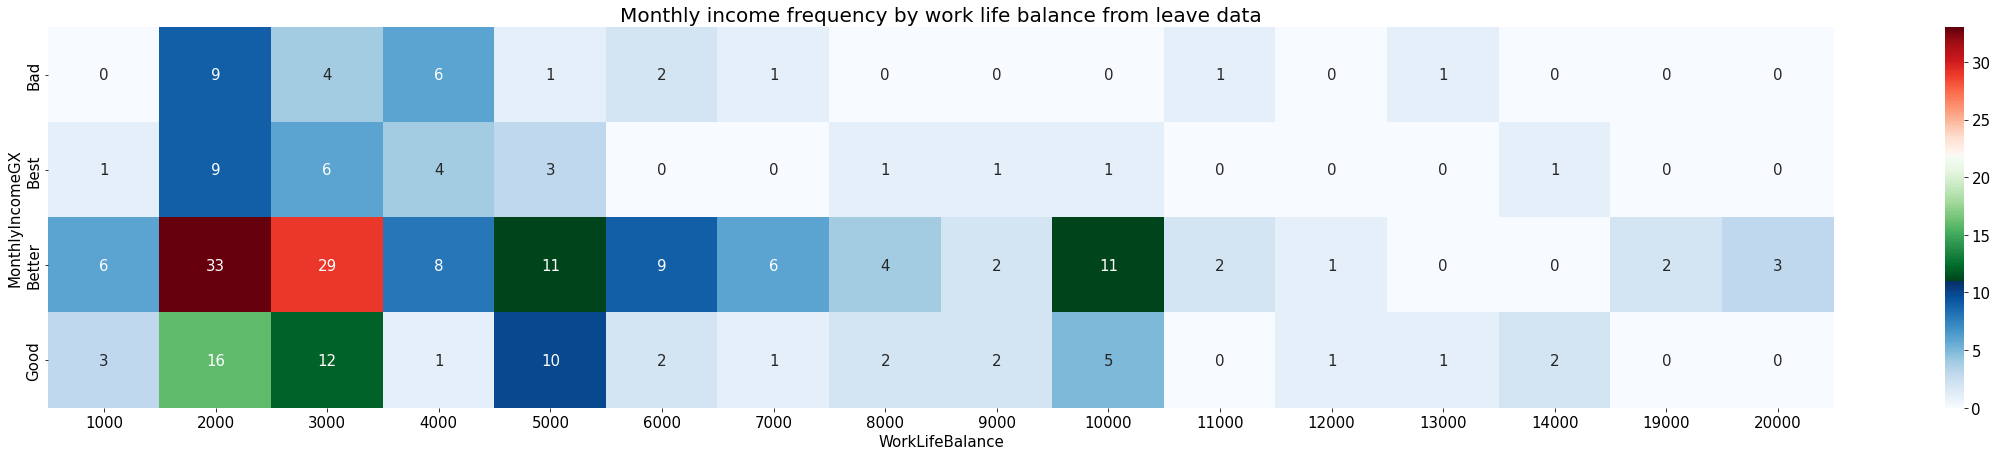

In [ ]:
pd_df_count_pivot_MI_WLB_leave = pd_df_frequencyFeaturePivot_2x(pd_df_attrition_yes, "MonthlyIncomeGX", "WorkLifeBalance")
heatmap_RGB_2D(pd_df_count_pivot_MI_WLB_leave, 'Monthly income frequency by work life balance from leave data')

###Monthly income percent by WorkLifeBalance from leave

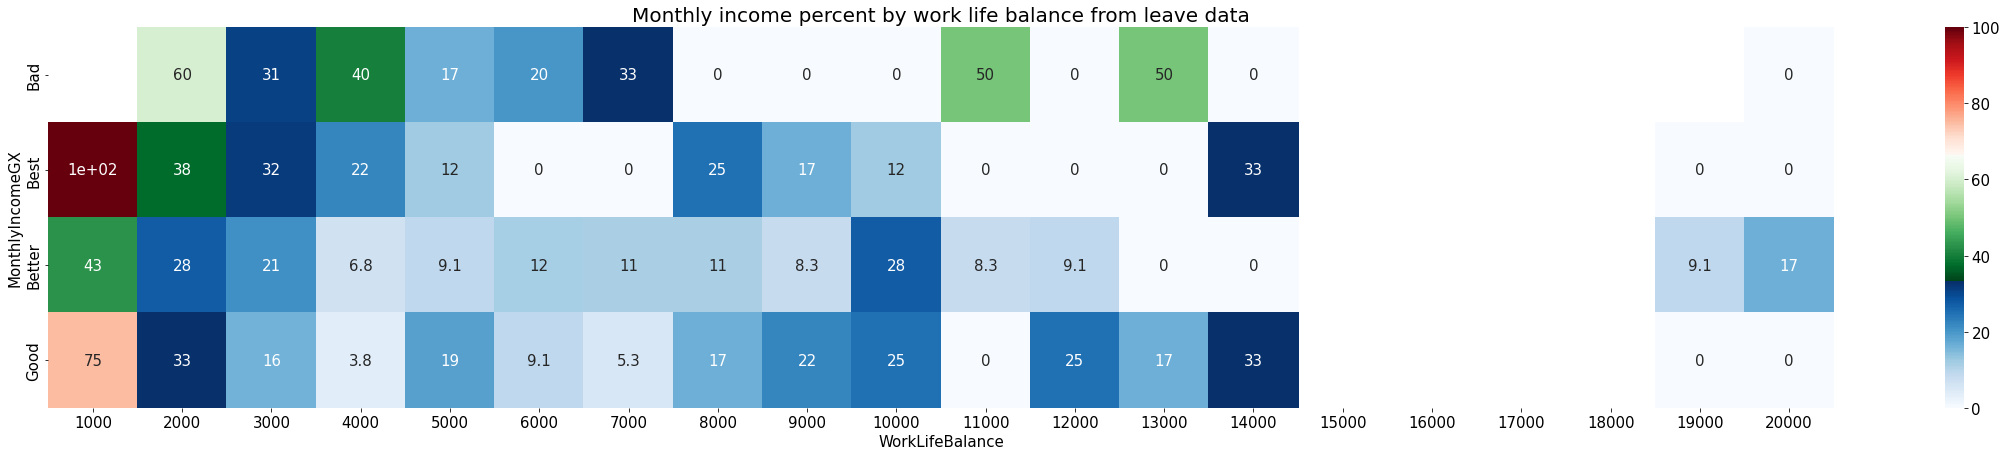

In [ ]:
heatmap_RGB_2D(pd_df_count_pivot_MI_WLB_leave / pd_df_count_pivot_MI_WLB_total * 100, 'Monthly income percent by work life balance from leave data')

###Conclusion:
- By work life balance, on the company work more people that work life balance are better, but by percent of state features the rate of the employees that work life balance are bad is greate.

##Monthly income frequency by JobSatisfaction

###Monthly income frequency by JobSatisfaction from all data

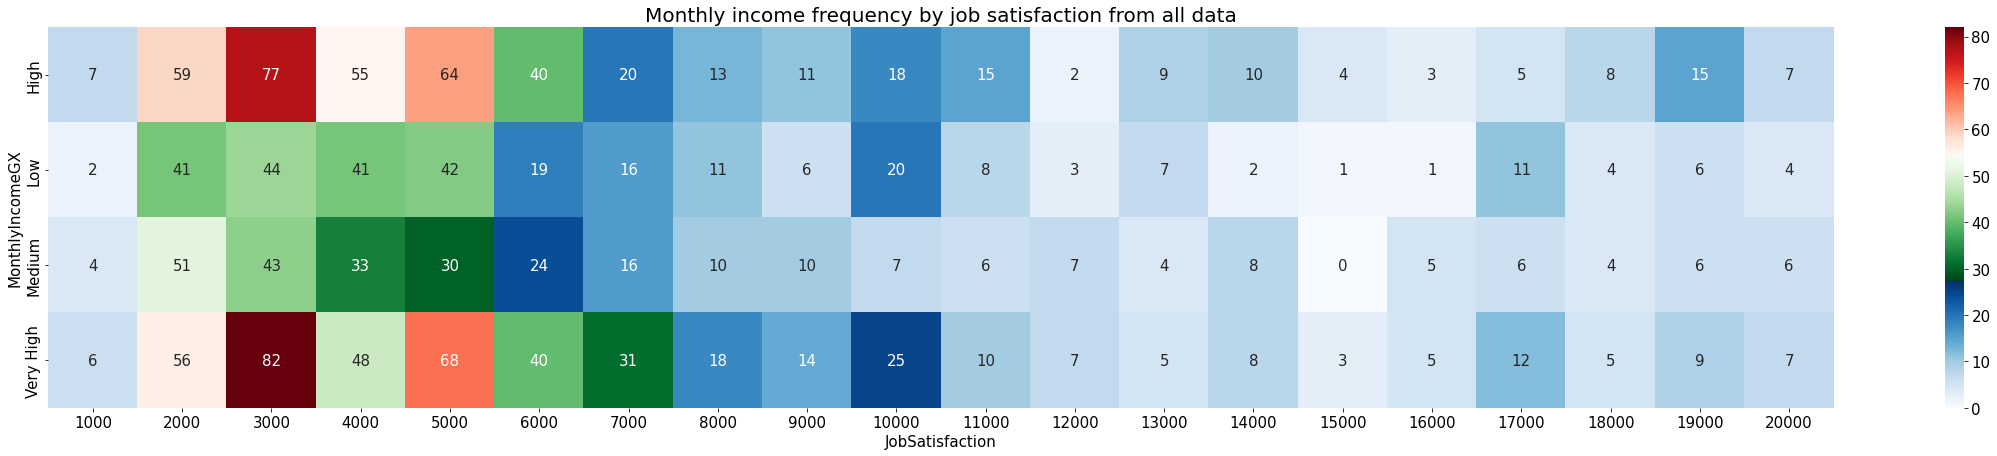

In [ ]:
pd_df_count_pivot_MI_JS_total = pd_df_frequencyFeaturePivot_2x(pd_df_ibm_attrition_data, "MonthlyIncomeGX", "JobSatisfaction")
heatmap_RGB_2D(pd_df_count_pivot_MI_JS_total, 'Monthly income frequency by job satisfaction from all data')

###Monthly income frequency by JobSatisfaction from leave data

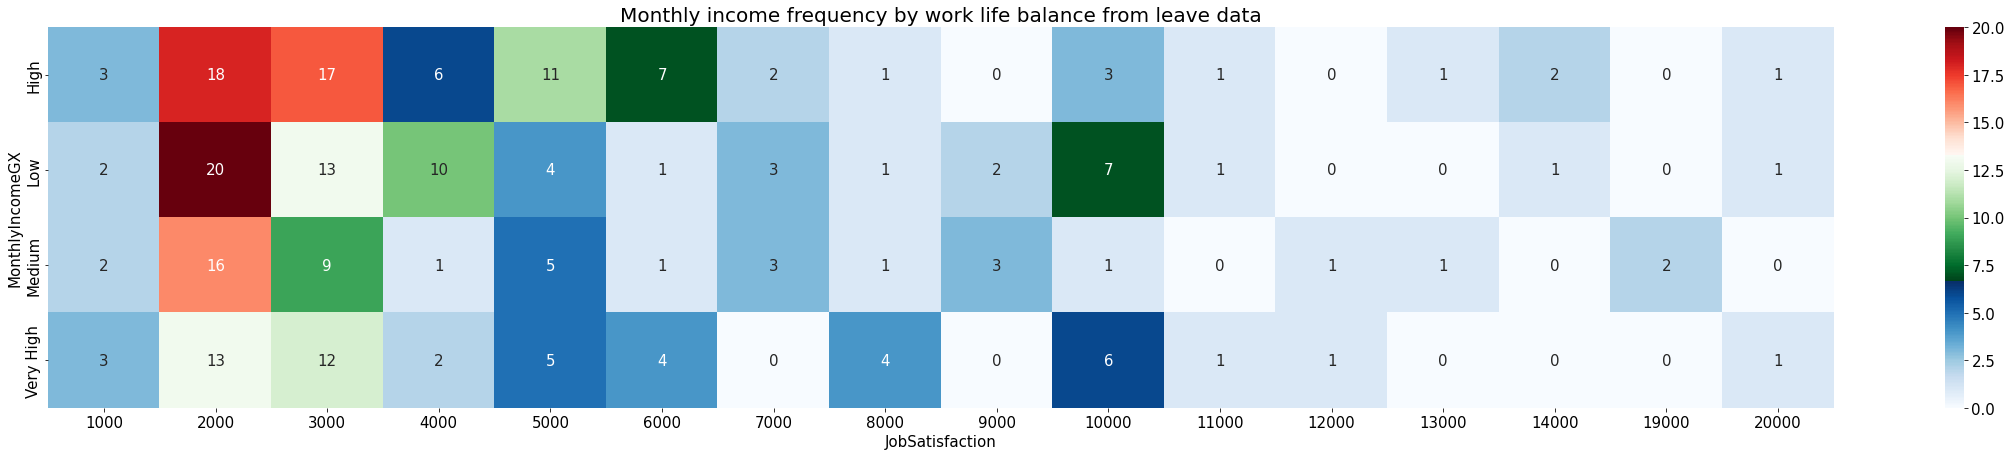

In [ ]:
pd_df_count_pivot_MI_JS_leave = pd_df_frequencyFeaturePivot_2x(pd_df_attrition_yes, "MonthlyIncomeGX", "JobSatisfaction")
heatmap_RGB_2D(pd_df_count_pivot_MI_JS_leave, 'Monthly income frequency by work life balance from leave data')

###Monthly income percent by JobSatisfaction from leave data

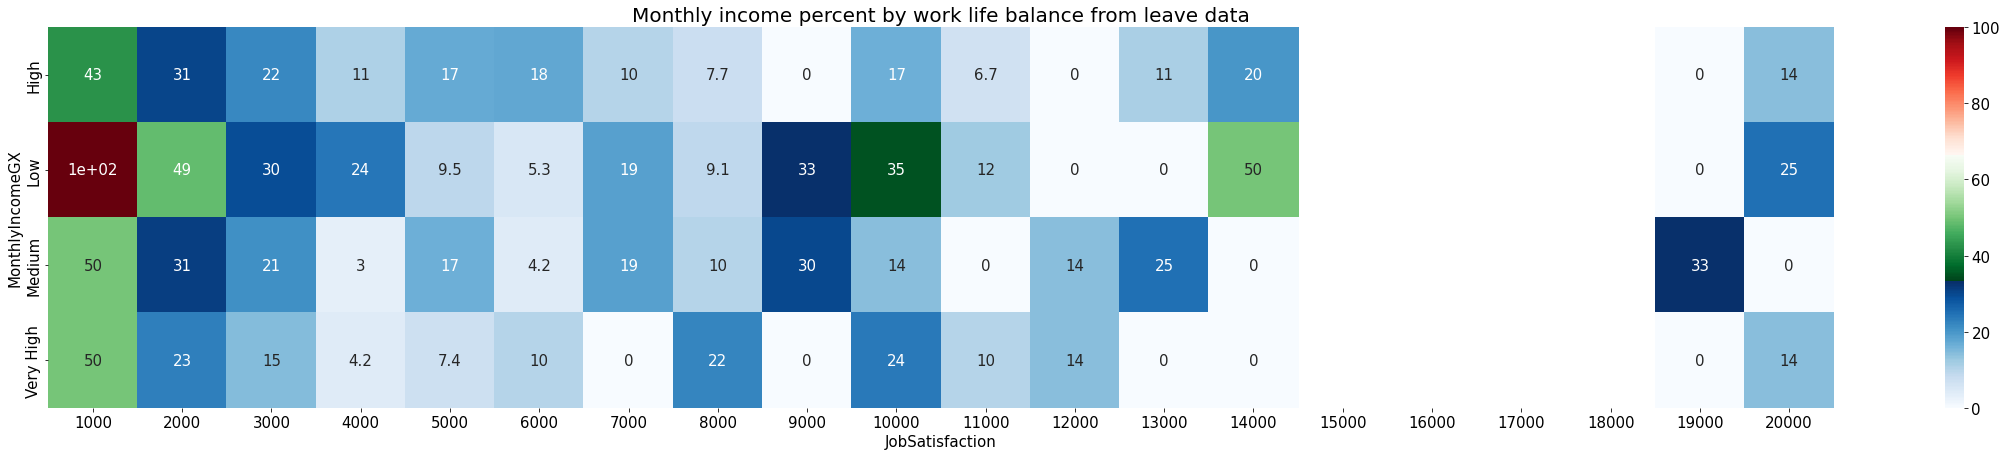

In [ ]:
heatmap_RGB_2D(pd_df_count_pivot_MI_JS_leave / pd_df_count_pivot_MI_JS_total * 100, 'Monthly income percent by work life balance from leave data')

###Conclusion:
- By job satisfaction more employees earn from 2000 up to 6000.

##Monthly income frequency by EnvironmentSatisfaction

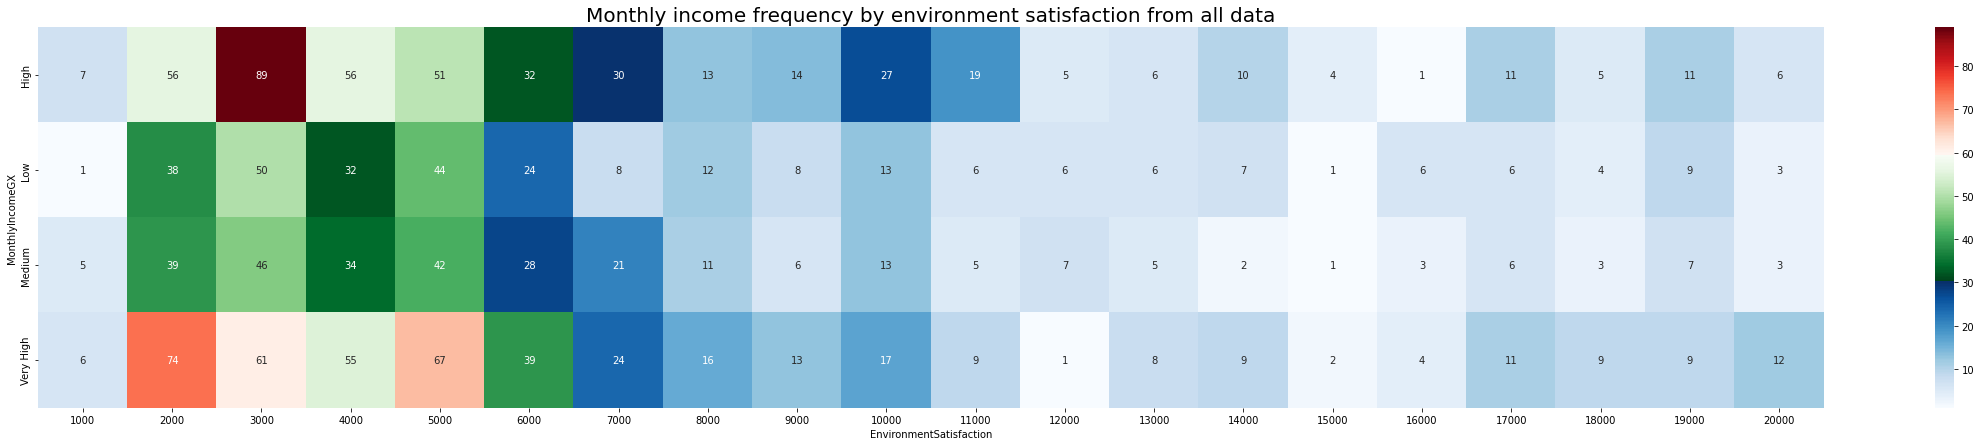

In [ ]:
pd_df_count_pivot_MI_ES_total = pd_df_frequencyFeaturePivot_2x(pd_df_ibm_attrition_data, "MonthlyIncomeGX", "EnvironmentSatisfaction")
heatmap_RGB_2D(pd_df_count_pivot_MI_ES_total, 'Monthly income frequency by environment satisfaction from all data')

###Conclusion:
- By environment satisfaction more employeesare high and very high satisfacted.

##Monthly income frequency by YearsAtCompany

###Monthly income frequency by YearsAtCompany from all data

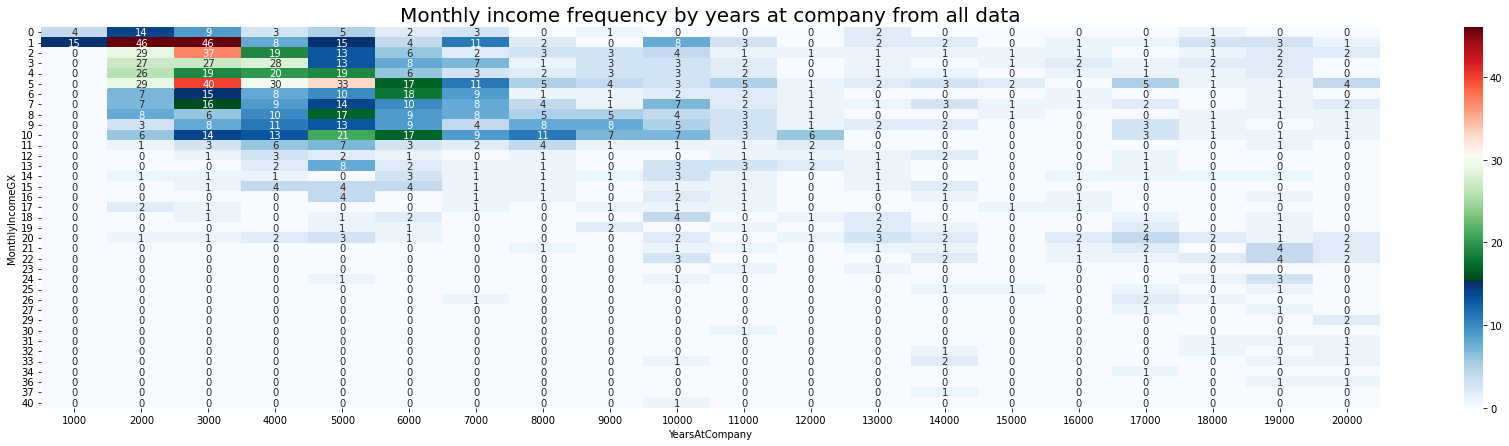

In [ ]:
pd_df_count_pivot_MI_YAC_total = pd_df_frequencyFeaturePivot_2x(pd_df_ibm_attrition_data, "MonthlyIncomeGX", "YearsAtCompany")
heatmap_RGB_2D(pd_df_count_pivot_MI_YAC_total, 'Monthly income frequency by years at company from all data')

###Monthly income frequency by YearsAtCompany from leave data

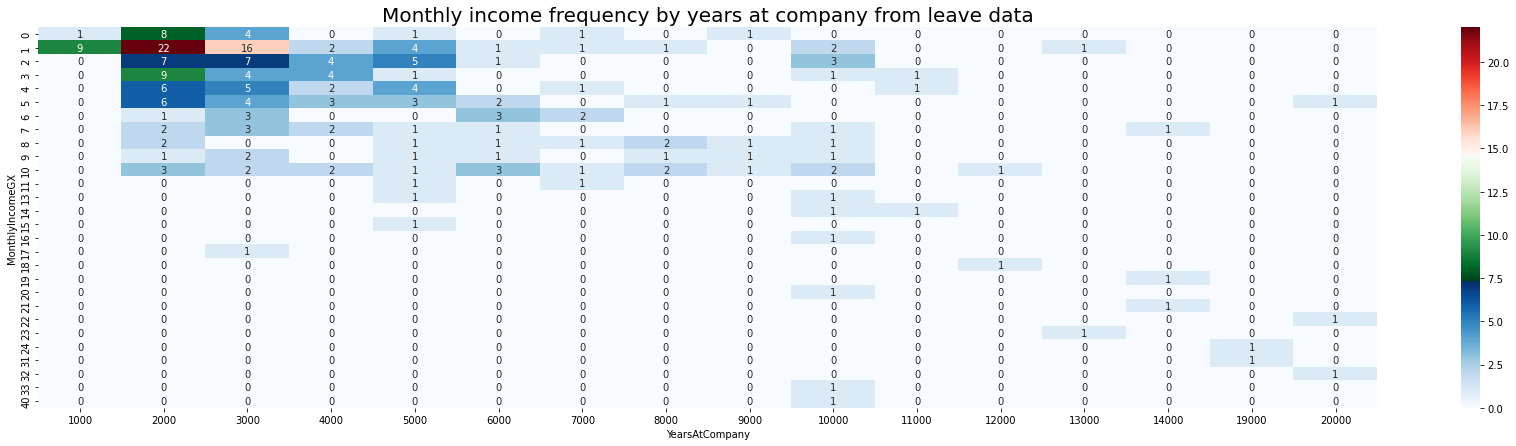

In [ ]:
pd_df_count_pivot_MI_YAC_leave = pd_df_frequencyFeaturePivot_2x(pd_df_attrition_yes, "MonthlyIncomeGX", "YearsAtCompany")
heatmap_RGB_2D(pd_df_count_pivot_MI_YAC_leave, 'Monthly income frequency by years at company from leave data')

###Monthly income percent by YearsAtCompany from leave data

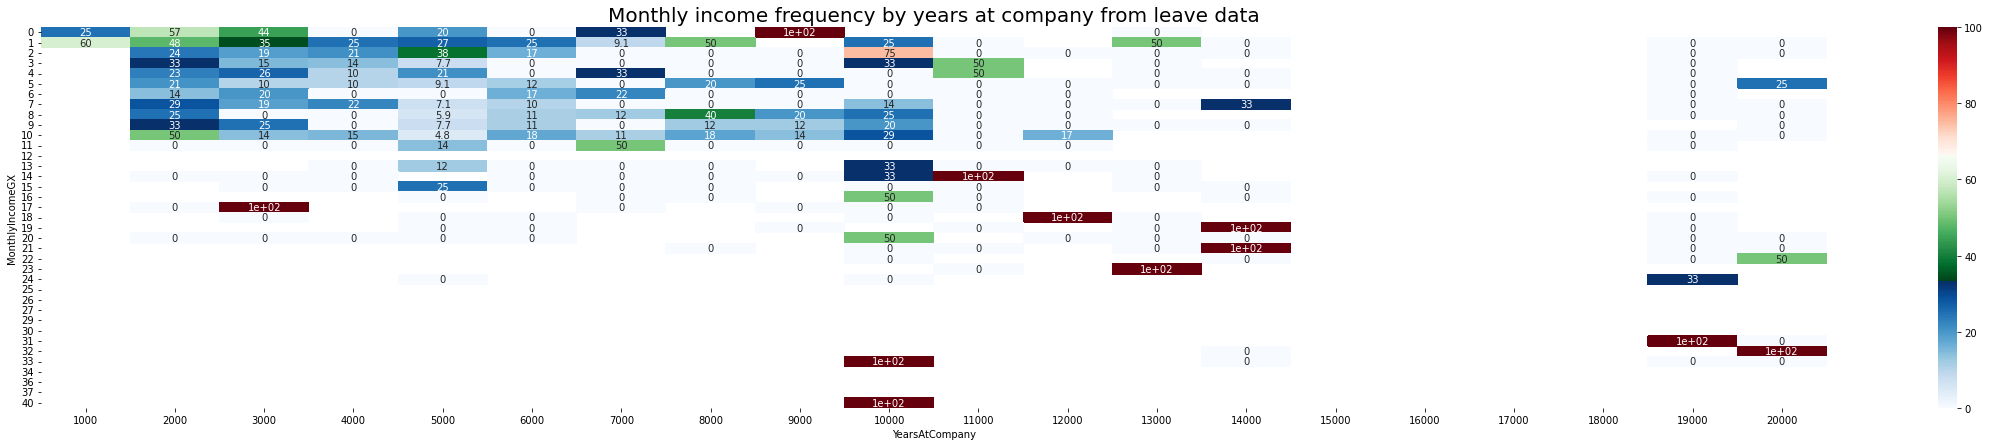

In [ ]:
heatmap_RGB_2D(pd_df_count_pivot_MI_YAC_leave / pd_df_count_pivot_MI_YAC_total * 100, 'Monthly income frequency by years at company from leave data')

###Conclusion:
- By years at company more employe work on company from 0 up to 10 and earn from 2000 up to 5000.
- More employees leave the company who work on company from 0 up to 3 and earn from 2000 up to 3000.

#Conclusion

After analysing we can see that the leave frequency can by greath comparing with other state from features but percent of leaving state small.